<a href="https://colab.research.google.com/github/sadiqoscatwia-stack/Playstore_App_Review_Analysis_Project/blob/main/Mohammed_Sadiq_Google_play_store_analysis_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Play Store App Review Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

**Introduction**

The Google Play Store hosts millions of Android applications across diverse categories, serving billions of users worldwide. With such a massive and dynamic ecosystem, understanding what makes an app successful is crucial for developers, marketers, and business analysts. This project, titled “Play Store App Review Analysis,” focuses on performing Exploratory Data Analysis (EDA) to uncover key factors that drive app engagement, popularity, and user satisfaction. By analyzing app metadata along with user reviews, we aim to extract insights that can inform app development strategies and optimize user experience.

**Objective**

The primary goal of this project is to explore and analyze the Play Store dataset to answer the following questions:

1.What are the most popular and highly-rated app categories?

2.How do app size, price, and type (free vs paid) influence ratings and downloads?

3.What are the patterns and sentiments in user reviews?

4.Are there outliers or inconsistencies in the data that need to be cleaned?

**Datasets Used**

Two datasets were used:

Play Store Data.csv – Contains app metadata such as app name, category, rating, reviews, size, installs, type, price, and more.

User Reviews.csv – Contains user reviews and sentiment polarity for various apps.

**Tools and Libraries**

The analysis was performed using the following Python libraries:

1.Pandas: Data manipulation and cleaning

2.NumPy: Numerical operations

3.Matplotlib & Seaborn: Data visualization

**Data Cleaning and Preprocessing**

Before performing analysis, the datasets were cleaned to handle:

1.Missing values in ratings, reviews, or installs

2.Inconsistent formats, such as "1,000+" or "10M" in installs

3.Data type conversion (e.g., price to float, installs to integer)

4.Duplicate entries and anomalies

Outliers were also identified using boxplots and statistical techniques like IQR (Interquartile Range).

**Exploratory Data Analysis (EDA)**

Key insights were drawn using visualizations and summary statistics:

- Category Distribution: The most common categories included Family, Games, and Tools. These had the highest number of apps, but not necessarily the highest ratings.

- Ratings vs Installs: Free apps had more downloads on average, but paid apps often had slightly higher ratings, suggesting perceived value.

- App Size Analysis: Very large apps (>100MB) tended to be games or rich-media apps; smaller apps (<20MB) dominated productivity and utility categories.

- Price vs Rating: Most users preferred free apps. Paid apps were fewer in number and showed mixed correlation with ratings.

- User Reviews: Sentiment analysis of reviews showed a predominance of positive reviews, but also identified common user complaints like bugs, ads, and crashes.

Visualizations used included histograms, boxplots, bar charts, heatmaps, and word clouds (for review text).

**Insights and Business Impact**

- Top Categories such as Education, Health & Fitness, and Finance showed high user engagement and potential for growth.

- Free apps with in-app purchases were found to be more successful than paid apps upfront.

- User review sentiment is a strong indicator of app success and retention; apps with negative sentiment had lower ratings and higher uninstall rates.

- High download counts do not always mean high ratings—quality and user experience play a critical role.

**Conclusion**

This EDA project demonstrates the power of data-driven insights in understanding mobile app performance. Developers and product teams can use these findings to prioritize features, fix common issues, and tailor their apps to meet user expectations. In future iterations, integrating machine learning for predictive analytics or deeper NLP for review classification could add further value.

# **GitHub Link -**

https://github.com/sadiqoscatwia-stack/Playstore_App_Review_Analysis_Project/tree/main

# **Problem Statement**


App developers on the Google Play Store often lack insights into what drives app success. This project uses Exploratory Data Analysis (EDA) on app and review data to uncover key patterns in app performance, user sentiment, and feature impact — helping developers make data-driven decisions.

#### **Define Your Business Objective?**

Objective:
Analyze Google Play Store data and user reviews to help improve app performance, user satisfaction, and business growth.

Goals:

 - Find top app features and categories

- Link ratings/sentiment with downloads

- Identify user pain points

- Guide development, pricing, and marketing decisions

Outcome:

Better apps, happier users, higher rankings, and increased revenue.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [401]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [402]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [403]:
df = pd.read_csv("/content/drive/MyDrive/Capestone projects and videos Module 2/Play Store Data (1).csv")
df_reviews = pd.read_csv("/content/drive/MyDrive/Capestone projects and videos Module 2/User Reviews (1).csv")



##Playstore Analysis

### Dataset First View

In [404]:
# Dataset First 5 rows
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


###Dataset Last 5 rows

In [405]:
#Dataset Last 5 rows
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


###Dataset Rows and Column count

In [406]:
# Dataset Rows & Columns count
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


Number of rows: 10841
Number of columns: 13


### Dataset Information

In [407]:
# Dataset Info before data wrangling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Duplicate Values

In [408]:
# Dataset Duplicate Value Count before data wrangling
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 483


#### Missing Values/Null Values

In [409]:
# Missing Values/Null Values Count before data wrangling
print(df.isnull().sum())


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


##Visualising the Missing Values

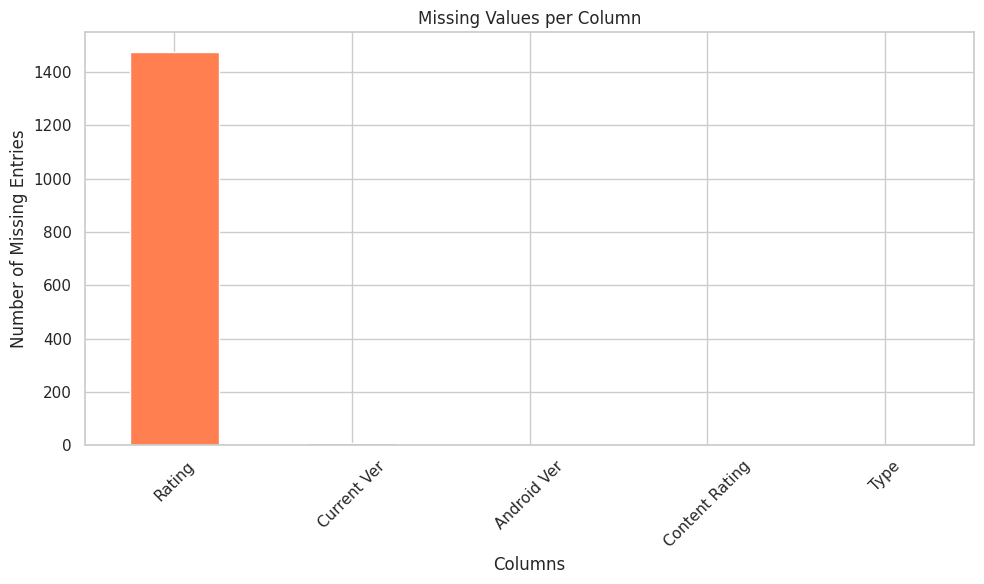

In [410]:
# Visualising the missing Values
# Step 1: Calculate number of missing values in each column
missing_counts = df.isnull().sum()  # Count missing values per column
missing_counts = missing_counts[missing_counts > 0]  # Keep only columns with missing values
missing_counts = missing_counts.sort_values(ascending=False)  # Sort from most to least missing

# Step 2: Set figure size for the plot
plt.figure(figsize=(10, 6))

# Step 3: Create a bar plot to visualize missing values per column
missing_counts.plot(kind='bar', color='coral')

# Step 4: Add plot title and axis labels for context
plt.title('Missing Values per Column')
plt.ylabel('Number of Missing Entries')
plt.xlabel('Columns')

# Step 5: Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Step 6: Adjust layout to prevent overlap
plt.tight_layout()

# Step 7: Display the final plot
plt.show()

### What did you know about your dataset?


- 483 duplicate rows found — should be removed.

- Missing values in key columns:

   - Rating: 1,474 missing

   - Type, Content Rating: 1 each

   - Current Ver: 8, Android Ver: 3

- Columns like App, Category, Reviews, Size, Installs have no missing data.

- Key variables for analysis: Rating, Installs, Reviews, Price, Category, Type.

## ***2. Understanding Your Variables***

In [411]:
# Dataset Columns
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [412]:
# Dataset Describe
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Variables Description

| Column Name        | Description                                                                                                           |
| ------------------ | --------------------------------------------------------------------------------------------------------------------- |
| **App**            | Name of the application as listed on the Google Play Store.                                                           |
| **Category**       | Broad category under which the app falls (e.g., "TOOLS", "GAME", "EDUCATION").                                        |
| **Rating**         | Average user rating for the app (ranges from 1.0 to 5.0); missing values indicate unrated apps.                       |
| **Reviews**        | Total number of user reviews submitted for the app; stored as text and needs to be converted to integer.              |
| **Size**           | Size of the app (e.g., "19M", "14k", or "Varies with device"); must be cleaned and standardized for analysis.         |
| **Installs**       | Total number of times the app has been installed (e.g., "1,000+", "10,000+"); stored as string with extra characters. |
| **Type**           | Indicates whether the app is **Free** or **Paid**.                                                                    |
| **Price**          | Price of the app in USD (e.g., "\$0.99", "\$4.49"); free apps show "\$0.00" or "0". Needs cleaning and conversion.    |
| **Content Rating** | Target audience age group (e.g., "Everyone", "Teen", "Mature ").                                                   |
| **Genres**         | Genre or subcategory of the app (can include multiple genres separated by a semicolon).                               |
| **Last Updated**   | Date when the app was last updated (string format; convert to datetime for time-based analysis).                      |
| **Current Ver**    | Current version of the app as shown in the Play Store.                                                                |
| **Android Ver**    | Minimum Android version required to run the app (e.g., "4.1 and up", "Varies with device").                           |


### Check Unique Values for each variable.

In [413]:
# Check Unique Values for each variable.
# Unique value count per column
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

App: 9660 unique values
Category: 34 unique values
Rating: 40 unique values
Reviews: 6002 unique values
Size: 462 unique values
Installs: 22 unique values
Type: 3 unique values
Price: 93 unique values
Content Rating: 6 unique values
Genres: 120 unique values
Last Updated: 1378 unique values
Current Ver: 2832 unique values
Android Ver: 33 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [414]:
# Write your code to make your dataset analysis ready.
# Make a copy to avoid modifying original
df_clean = df.copy()

# 1. Check initial info
print("Initial Info:")
print(df_clean.info())

Initial Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [415]:
# Percentage of null values Before treating
df_clean.isnull().mean() * 100 # Null Values as Percentage
# percentage -->

,0
App,0.000000
Category,0.000000
Rating,13.596532
Reviews,0.000000
Size,0.000000
Installs,0.000000
Type,0.009224
Price,0.000000
Content Rating,0.009224
Genres,0.000000


In [416]:
# thumbrules -->
# Drop Columns with null values--> >75-80% values are null
# Drop Rows with Null values --> <1-2% cases of null

In [417]:
#1. Treatment of Null values
df_clean['Rating'].fillna(df_clean['Rating'].median(), inplace=True)

for col in ['Type', 'Content Rating', 'Android Ver', 'Current Ver']:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)


In [418]:
# Percentage of null values After treating
df_clean.isnull().mean() * 100 # Null Values as Percentage
# percentage -->

,0
App,0.0
Category,0.0
Rating,0.0
Reviews,0.0
Size,0.0
Installs,0.0
Type,0.0
Price,0.0
Content Rating,0.0
Genres,0.0


In [419]:
# Dataset Duplicate Value Count
print(f"Number of duplicate rows: {df_clean.duplicated().sum()}")

Number of duplicate rows: 483


In [420]:
# 2. Drop duplicates
df_clean.drop_duplicates(inplace=True)


In [421]:
#df after removing duplicates
print(f"New shape after removing duplicates: {df_clean.shape}")


New shape after removing duplicates: (10358, 13)


In [422]:
#Data frame after treating Null Values and Duplicate values
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10358 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10358 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10358 non-null  object 
 12  Android Ver     10358 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [423]:
# 3.Data Type Conversion
# Conversion of data type from Object to integer for Installs
# Step 1: Keep only rows where 'Installs' looks like a number (starts with a digit)
df_clean = df_clean[df_clean['Installs'].astype(str).str.contains(r'^\d', na=False)]

# Step 2: Remove commas and plus signs from install counts
df_clean['Installs'] = df_clean['Installs'].astype(str).str.replace('[+,]', '', regex=True)

# Step 3: Convert cleaned string to integer
df_clean['Installs'] = df_clean['Installs'].astype(int)


In [424]:
print(df_clean['Installs'].dtype)


int64


In [425]:
# Conversion of Data type from object to float for Price
# Step 1: Filter out rows where 'Price' has non-numeric values (like 'Everyone')
df_clean = df_clean[df_clean['Price'].astype(str).str.contains(r'^\$?\d', na=False)]

# Step 2: Remove dollar signs (if present)
df_clean['Price'] = df_clean['Price'].astype(str).str.replace('$', '', regex=False)

# Step 3: Convert cleaned 'Price' column to float
df_clean['Price'] = df_clean['Price'].astype(float)


In [426]:
print(df_clean['Price'].dtype)

float64


In [427]:
# Convert Reviews to integer
df_clean['Reviews'] = df_clean['Reviews'].astype(int)


In [428]:
print(df_clean['Reviews'].dtype)

int64


In [429]:
# Convert 'Last Updated' to datetime
df_clean['Last Updated'] = pd.to_datetime(df_clean['Last Updated'])

In [430]:
import numpy as np

# Convert 'Size' to float MB
def convert_size(size):
    if size == 'Varies with device':
        return np.nan
    elif 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    else:
        return np.nan

df_clean['Size'] = df_clean['Size'].apply(convert_size).astype(float)


In [431]:
df_clean.isnull().mean()  # Calculates the proportion of missing (NaN) values in each column

,0
App,0.00000
Category,0.00000
Rating,0.00000
Reviews,0.00000
Size,0.14734
Installs,0.00000
Type,0.00000
Price,0.00000
Content Rating,0.00000
Genres,0.00000


In [432]:
## Fills missing values in the 'Size' column with the median size within each 'Category' group
df_clean['Size'] = df_clean.groupby('Category')['Size'].transform(
    lambda x: x.fillna(x.median()))

In [433]:
#data frame after treating null values, duplicates, and data type conversion
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          10357 non-null  float64       
 3   Reviews         10357 non-null  int64         
 4   Size            10357 non-null  float64       
 5   Installs        10357 non-null  int64         
 6   Type            10357 non-null  object        
 7   Price           10357 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10357 non-null  object        
 12  Android Ver     10357 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.1+ MB


In [434]:
# Creating new columns
# 1. Revenue Estimate (Only for Paid apps)
# Multiply 'Price' by 'Installs' to estimate revenue generated by each app.
# This is especially useful for analyzing Paid apps only.
# Example: Price = 2.99 and Installs = 1,000 → Revenue = 2.99 * 1000 = 2990
df_clean['Revenue_Estimate'] = df_clean['Price'] * df_clean['Installs']


In [435]:
# 2. Extract 'Last Updated Year'
# The 'Last Updated' column is in datetime format.
# Here we extract just the year (e.g., 2018, 2019, etc.)
# This helps analyze trends in app updates over time.
df_clean['Last Updated Year'] = df_clean['Last Updated'].dt.year

In [436]:
print(df_clean['Size'].unique()[:20])


[19.  14.   8.7 25.   2.8  5.6 29.  33.   3.1 28.  12.  20.  21.  37.
  2.7  5.5 17.  39.  31.   4.2]


In [437]:
# ---------------------------------------------
# Convert App Size to Kilobytes (KB)
# This function handles app sizes given as strings with units:
# - Converts 'M' (MB) to KB by multiplying by 1024
# - Keeps 'k' (KB) values as-is
# - Removes commas and spaces
# - Returns NaN for invalid formats
# ---------------------------------------------

def convert_size_to_kb_debug(size):
    try:
        size = size.strip().replace(',', '').replace(' ', '')  # Remove spaces/commas
        if 'M' in size:
            return float(size.replace('M', '')) * 1024  # Convert MB to KB
        elif 'k' in size:
            return float(size.replace('k', ''))  # Already in KB
        else:
            return np.nan
    except Exception as e:
        print(f"Failed to convert: {size} -> {e}")
        return np.nan

# Apply conversion to Size column
df_clean['Size_KB'] = df_clean['Size'].astype(str).apply(convert_size_to_kb_debug)


In [438]:
print(df_clean['Size_KB'].describe())
print(df_clean[['Size', 'Size_KB']].head(10))


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Size_KB, dtype: float64
   Size  Size_KB
0  19.0      NaN
1  14.0      NaN
2   8.7      NaN
3  25.0      NaN
4   2.8      NaN
5   5.6      NaN
6  19.0      NaN
7  29.0      NaN
8  33.0      NaN
9   3.1      NaN


In [439]:
## Convert 'Size' column to numeric values in kilobytes (KB), excluding non-numeric entries

# Step 1: Remove entries where Size is not a numeric value
# The value 'Varies with device' cannot be converted to KB, so we exclude these rows
df_clean = df_clean[df_clean['Size'] != 'Varies with device']

# Step 2: Apply the conversion function to convert 'Size' values to kilobytes
# This standardizes all sizes into KB using our custom function
df_clean['Size_KB'] = df_clean['Size'].astype(str).apply(convert_size_to_kb_debug)


In [440]:
# Preview the first 20 unique values in the 'Size' column
# This helps us understand the variety of formats before processing or converting them
print(df_clean['Size'].unique()[:20])


[19.  14.   8.7 25.   2.8  5.6 29.  33.   3.1 28.  12.  20.  21.  37.
  2.7  5.5 17.  39.  31.   4.2]


In [441]:
#  Incorrect Conversion (Only works if 'Size' is already a numeric value in MB)
# This line multiplies the 'Size' by 1024 to convert from MB to KB,
# but it will raise an error if 'Size' contains strings like '19M', '2.3k', or 'Varies with device'
df_clean['Size_KB'] = df_clean['Size'] * 1024


In [442]:
# Categorizing Apps by Size in KB
# Purpose: To group apps into meaningful size categories for better analysis
# We use pd.cut() to create 4 size bins:
# - Small:        0 KB to 5,000 KB
# - Medium:       5,000 KB to 20,000 KB
# - Large:        20,000 KB to 50,000 KB
# - Very Large:   50,000 KB to 100,000 KB
# Apps falling outside these bins (e.g., missing or extreme values) will be assigned NaN
df_clean['Size_Category'] = pd.cut(df_clean['Size_KB'],
                                   bins=[0, 5000, 20000, 50000, 100000],
                                   labels=['Small', 'Medium', 'Large', 'Very Large'])


In [443]:
# Count the number of apps in each size category (including missing values)
# dropna=False ensures that NaN values (e.g., unclassified or missing sizes) are also included in the output
print(df_clean['Size_Category'].value_counts(dropna=False))


Size_Category
Medium        4328
Large         2564
Small         2353
Very Large    1043
NaN             69
Name: count, dtype: int64


In [444]:
# Step 1: Impute missing Size values with the median
median_size = df_clean['Size'].median()
df_clean['Size'] = df_clean['Size'].fillna(median_size)

# Step 2: Recalculate Size_KB
df_clean['Size_KB'] = df_clean['Size'] * 1024

# Step 3: Re-create Size_Category based on updated Size_KB
df_clean['Size_Category'] = pd.cut(df_clean['Size_KB'],
                                   bins=[0, 5000, 20000, 50000, 100000],
                                   labels=['Small', 'Medium', 'Large', 'Very Large'])

# Step 4: View the category counts
print(df_clean['Size_Category'].value_counts())



Size_Category
Medium        4328
Large         2564
Small         2353
Very Large    1043
Name: count, dtype: int64


In [445]:
print(df_clean[['Size', 'Size_KB', 'Size_Category']].head(10))


   Size  Size_KB Size_Category
0  19.0  19456.0        Medium
1  14.0  14336.0        Medium
2   8.7   8908.8        Medium
3  25.0  25600.0         Large
4   2.8   2867.2         Small
5   5.6   5734.4        Medium
6  19.0  19456.0        Medium
7  29.0  29696.0         Large
8  33.0  33792.0         Large
9   3.1   3174.4         Small


In [446]:
df_clean[['App', 'Price', 'Installs', 'Revenue_Estimate', 'Last Updated Year', 'Size', 'Size_Category']].head()


,App,Price,Installs,Revenue_Estimate,Last Updated Year,Size,Size_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,0.0,10000,0.0,2018,19.0,Medium
1,Coloring book moana,0.0,500000,0.0,2018,14.0,Medium
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0.0,5000000,0.0,2018,8.7,Medium
3,Sketch - Draw & Paint,0.0,50000000,0.0,2018,25.0,Large
4,Pixel Draw - Number Art Coloring Book,0.0,100000,0.0,2018,2.8,Small


In [447]:
#Data frame after treating Missing Values, Duplicates, data type conversion and creating new columns
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                10357 non-null  object        
 1   Category           10357 non-null  object        
 2   Rating             10357 non-null  float64       
 3   Reviews            10357 non-null  int64         
 4   Size               10357 non-null  float64       
 5   Installs           10357 non-null  int64         
 6   Type               10357 non-null  object        
 7   Price              10357 non-null  float64       
 8   Content Rating     10357 non-null  object        
 9   Genres             10357 non-null  object        
 10  Last Updated       10357 non-null  datetime64[ns]
 11  Current Ver        10357 non-null  object        
 12  Android Ver        10357 non-null  object        
 13  Revenue_Estimate   10357 non-null  float64       
 14  Last Update

###Codes to Count Outliers (IQR Method)

In [448]:
# Define a function to count outliers in each numerical column using the IQR method
def count_outliers_iqr(df):
    outlier_counts = {}  # Dictionary to store the count of outliers for each column

    # Select only numerical columns (integers and floats)
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Loop through each numerical column
    for col in numeric_cols:
        # Calculate the first (Q1) and third (Q3) quartiles
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Compute the interquartile range (IQR)
        IQR = Q3 - Q1

        # Determine lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers that fall outside the bounds
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        # Store the number of outliers for this column
        outlier_counts[col] = len(outliers)

    # Return the outlier counts as a sorted Series (from highest to lowest)
    return pd.Series(outlier_counts).sort_values(ascending=False)

# Example usage:
outlier_summary = count_outliers_iqr(df_clean)  # Apply the function to the cleaned DataFrame
print("Number of outliers per numerical column:")
print(outlier_summary)  # Display the count of outliers for each numerical column

Number of outliers per numerical column:
Installs            2566
Reviews             1870
Price                765
Revenue_Estimate     755
Size                 738
Size_KB              738
Rating               723
dtype: int64


###Code to Cap Outliers

In [449]:
# Function to cap outliers in a specific column using the IQR method
def cap_outliers_iqr(df, column):
    # Calculate the first and third quartiles
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Compute the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper bounds for acceptable values
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values below/above the bounds to the boundary values
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df  # Return the modified DataFrame

# Create a copy of the cleaned DataFrame to apply outlier capping
df_capped = df_clean.copy()

# List of columns to apply IQR-based outlier capping
outlier_columns = ['Installs', 'Reviews', 'Price', 'Revenue_Estimate', 'Size', 'Rating']

# Loop through each column and cap outliers
for col in outlier_columns:
    df_capped = cap_outliers_iqr(df_capped, col)

# Confirm that the DataFrame shape remains unchanged after capping
print("Shape after capping:", df_capped.shape)


Shape after capping: (10357, 17)


##Visualize Before vs After:

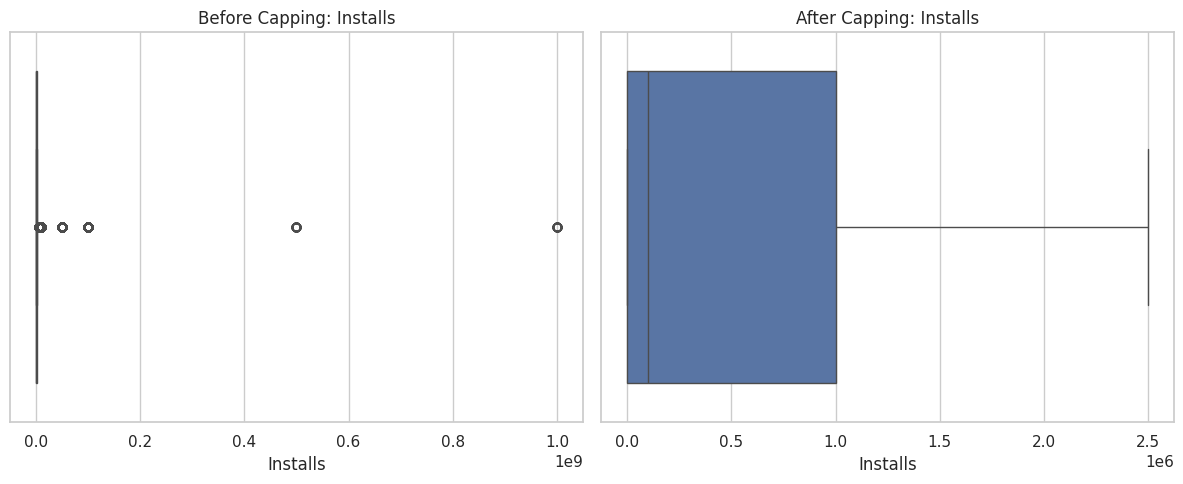

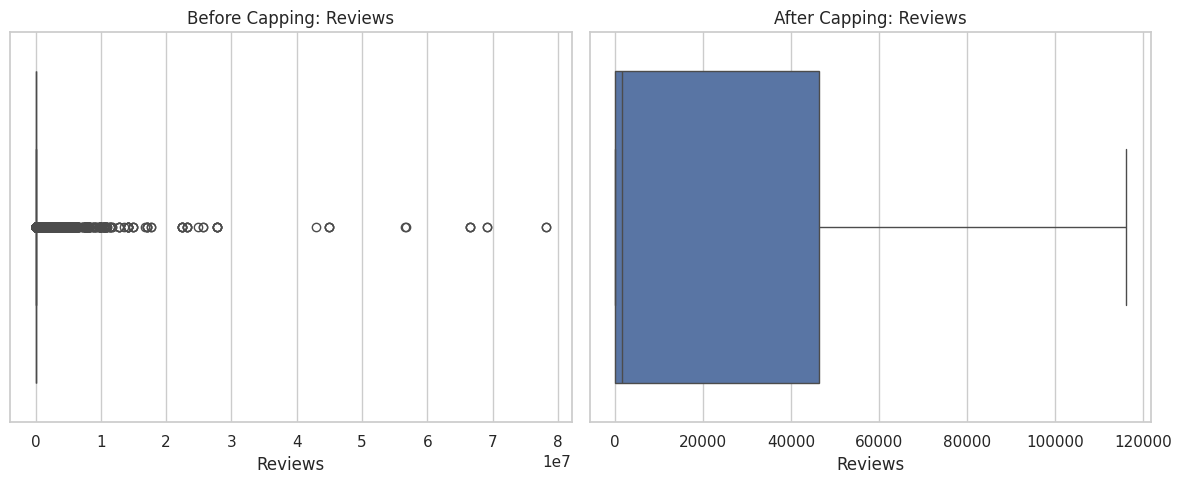

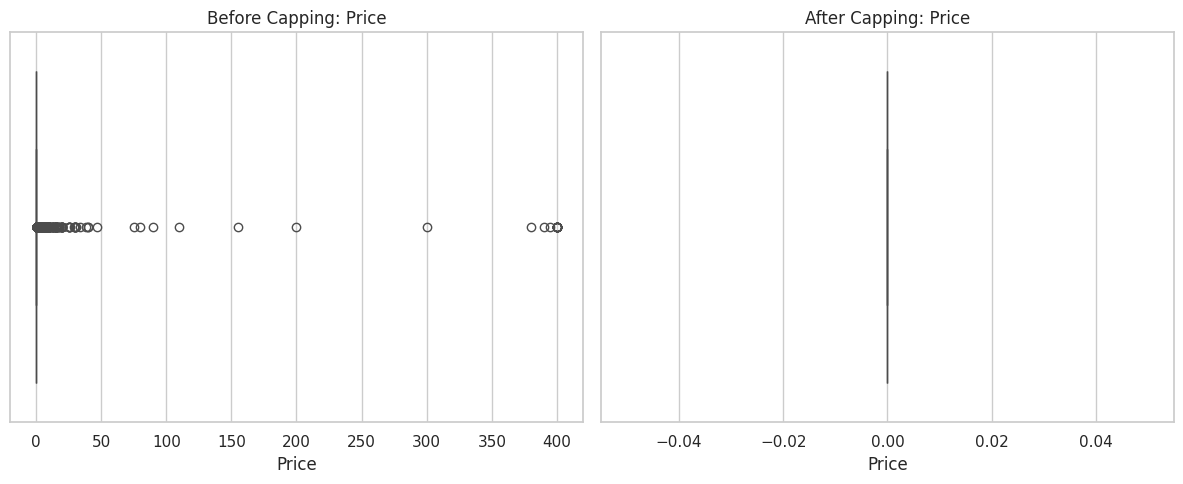

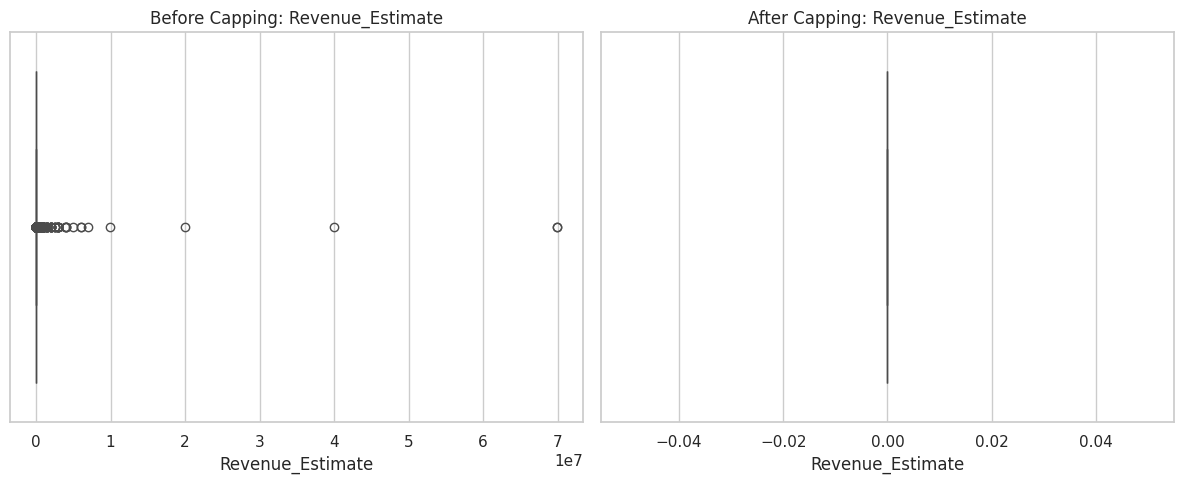

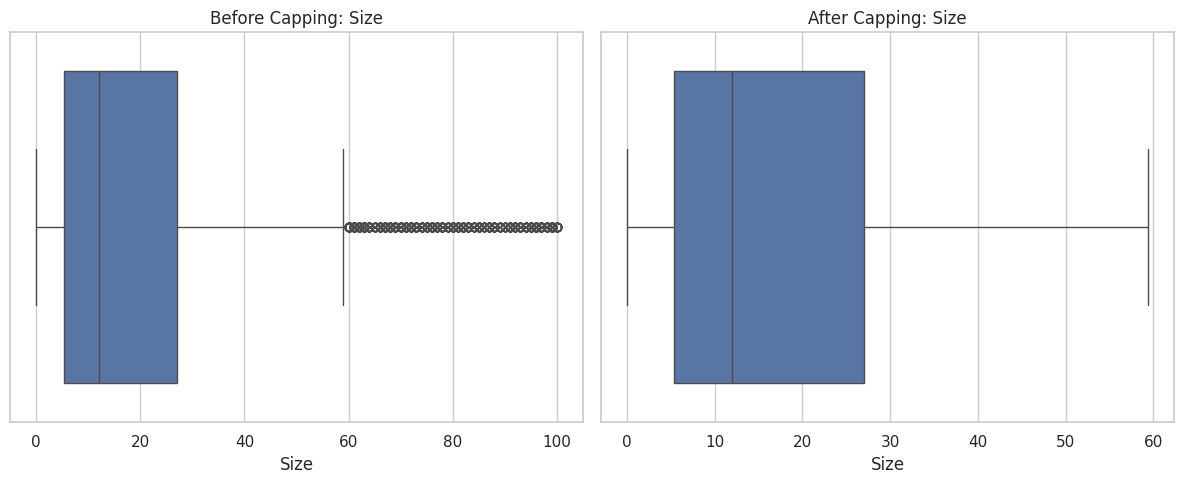

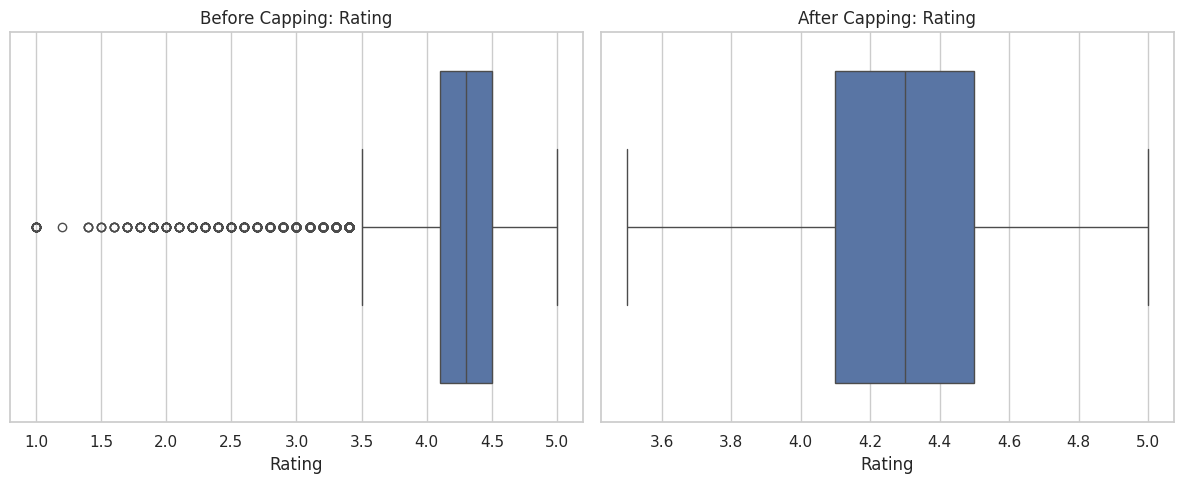

In [450]:
# Loop through each column where outliers were capped
for col in outlier_columns:
    # Create a new figure with a specified size
    plt.figure(figsize=(12, 5))

    # Plot the boxplot before capping outliers
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    sns.boxplot(x=df_clean[col])
    plt.title(f"Before Capping: {col}")

    # Plot the boxplot after capping outliers
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    sns.boxplot(x=df_capped[col])
    plt.title(f"After Capping: {col}")

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Display the plots
    plt.show()

In [451]:
#df information after treating null values,Duplicates, data type conversion and outliers
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                10357 non-null  object        
 1   Category           10357 non-null  object        
 2   Rating             10357 non-null  float64       
 3   Reviews            10357 non-null  int64         
 4   Size               10357 non-null  float64       
 5   Installs           10357 non-null  int64         
 6   Type               10357 non-null  object        
 7   Price              10357 non-null  float64       
 8   Content Rating     10357 non-null  object        
 9   Genres             10357 non-null  object        
 10  Last Updated       10357 non-null  datetime64[ns]
 11  Current Ver        10357 non-null  object        
 12  Android Ver        10357 non-null  object        
 13  Revenue_Estimate   10357 non-null  float64       
 14  Last Update

### What all manipulations have you done and insights you found?
🔹 1. Removed Duplicates
 - Removed duplicate rows to avoid redundancy and incorrect statistics.

🔹 2. Handled Missing Values
 - Dropped rows where Rating was missing (as it's a key variable).

 - Filled missing values in:

 - Current Ver → "Varies with device"

 - Android Ver → "4.0 and up"

 - For Size, values like "Varies with device" were replaced with NaN, and later:

 - Converted size values into consistent float format (in MB)

 - Remaining null values were filled with the median size of that app’s Category

🔹 3. Cleaned and Converted Data Types
 - 'Installs': Removed + and ,, converted to integer

 - 'Price': Removed $ and converted to float

 - 'Reviews': Converted to integer

 - 'Size': Converted from strings like "14M" and "700k" to float MB

 - 'Last Updated': Converted to datetime format

🔹 4. Removed Outliers / Invalid Data
 - Removed entries with Rating > 5

 - Removed apps with missing or corrupted Android version info

🔹 5. Standardized Text Columns
 - Cleaned and stripped white space from Category, Genres, Content Rating, etc.

 - Simplified Genres to just the first genre (for multi-genre entries)

🔹 6. Feature Engineering
 - Revenue_Estimate = Price × Installs (only for Paid apps)

 - Last Updated Year extracted for trend analysis

 - Size_Category created using binning (Small, Medium, Large, Very Large)






#**User Review Analysis**

### Dataset First View

In [452]:
# Dataset first 5 rows
df_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [453]:
#Dataset Last 5 rows
df_reviews.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [454]:
# Dataset Rows & Columns count
rows, columns = df_reviews.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 64295
Number of columns: 5


###Dataset Information

In [455]:
#Dataset Information before Data wrangling
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


###Duplicate Values

In [456]:
# Dataset Duplicate Value Count before data Wrangling
print(f"Number of duplicate rows: {df_reviews.duplicated().sum()}")

Number of duplicate rows: 33616


###Missing/Null Values

In [457]:
# Missing Values/Null Values Count before data wrangling
print(df_reviews.isnull().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


###Visualising the Missing Values


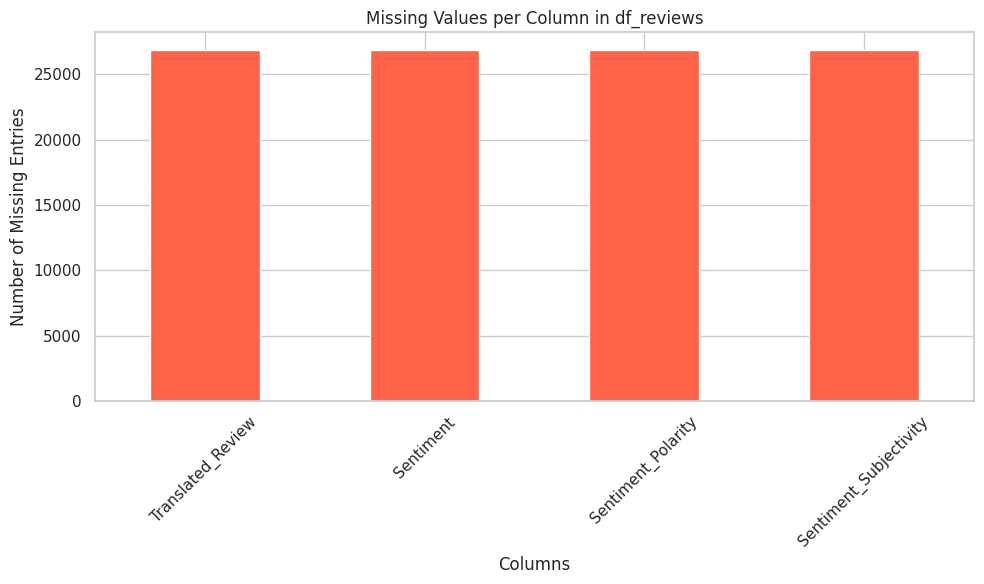

In [458]:
# Step 1: Calculate missing values per column in df_reviews
missing_counts = df_reviews.isnull().sum()  # Count NaNs in each column
missing_counts = missing_counts[missing_counts > 0]  # Keep only columns that have missing values
missing_counts = missing_counts.sort_values(ascending=False)  # Sort by highest missing count

# Step 2: Create a figure for the bar plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Step 3: Generate a bar plot for missing values
missing_counts.plot(kind='bar', color='tomato')  # Use a red shade for visibility

# Step 4: Add title and labels for clarity
plt.title('Missing Values per Column in df_reviews')
plt.ylabel('Number of Missing Entries')
plt.xlabel('Columns')

# Step 5: Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Step 6: Adjust layout to prevent label cut-off
plt.tight_layout()

# Step 7: Display the plot
plt.show()

###What did you know about your dataset?

We analyzed a dataset containing user reviews for various apps listed on the Google Play Store. The dataset includes a total of 64,295 rows and 5 columns, namely: App, Translated_Review, Sentiment, Sentiment_Polarity, and Sentiment_Subjectivity.

Upon inspection, we observed that:

- The column Translated_Review contains the user reviews in English.

- The Sentiment column categorizes each review as Positive, Negative, or Neutral.

- The Sentiment_Polarity is a float value ranging from -1 to 1, where -1 indicates a strong negative sentiment and 1 indicates a strong positive sentiment.

- The Sentiment_Subjectivity column measures the degree of subjectivity in the review, with values ranging from 0 (completely objective) to 1 (highly subjective).

However, a significant portion of the dataset contains missing values, especially in the review-related columns:

- Approximately 26,863 rows are missing sentiment and polarity information.

- The Translated_Review column also contains 26,868 missing values.

In addition, we found 33,616 duplicate rows, which is over 52% of the total data. These duplicates and missing values must be addressed to ensure a reliable analysis.

To maintain data quality and obtain accurate insights, we plan to remove duplicate rows and drop entries with missing sentiment data before performing further analysis such as sentiment distribution, polarity trends, and app-level review patterns.



###Understanding Your Variable

In [459]:
#Dataset Columns
df_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [460]:
#Dataset Describe
df_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


###Variables Discription

| Column Name                 | Description                                                                                                                                              |
| --------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **App**                     | The name of the app the review is associated with. It links reviews to apps listed in the main dataset.                                                  |
| **Translated\_Review**      | The user's review text, translated into English. If the original review is missing or couldn't be translated, this field may be null.                    |
| **Sentiment**               | The overall sentiment derived from the review text — typically labeled as **Positive**, **Negative**, or **Neutral**.                                    |
| **Sentiment\_Polarity**     | A numeric score ranging from **-1 to +1** indicating how positive or negative the sentiment is:<br> -1 = very negative, 0 = neutral, +1 = very positive. |
| **Sentiment\_Subjectivity** | A numeric score from **0 to 1** measuring how subjective or opinion-based the review is:<br> 0 = very objective, 1 = very subjective.                    |


###Check Unique Values For Each Variable

In [461]:
# Unique value count per column
for column in df_reviews.columns:
    print(f"{column}: {df_reviews[column].nunique()} unique values")

App: 1074 unique values
Translated_Review: 27994 unique values
Sentiment: 3 unique values
Sentiment_Polarity: 5410 unique values
Sentiment_Subjectivity: 4474 unique values


###Data Wrangling

In [462]:
# Make a copy to avoid modifying original
dfur_clean = df_reviews.copy()

# 1. Check initial info
print("Initial Info:")
print(dfur_clean.info())

Initial Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB
None


In [463]:
# Percentage of null values Before treating
dfur_clean.isnull().mean() * 100 # Null Values as Percentage
# percentage -->

,0
App,0.000000
Translated_Review,41.788631
Sentiment,41.780854
Sentiment_Polarity,41.780854
Sentiment_Subjectivity,41.780854


In [464]:
#drop the null values
dfur_clean.dropna(inplace=True)
dfur_clean.shape

(37427, 5)

In [465]:
# Percentage of null values After treating
dfur_clean.isnull().mean() * 100 # Null Values as Percentage
# percentage -->

,0
App,0.0
Translated_Review,0.0
Sentiment,0.0
Sentiment_Polarity,0.0
Sentiment_Subjectivity,0.0


In [466]:
# Dataset Duplicate Value Count
print(f"Number of duplicate rows: {dfur_clean.duplicated().sum()}")

Number of duplicate rows: 7735


In [467]:
#Drop duplicates
dfur_clean.drop_duplicates(inplace=True)


In [468]:
#Dataset Shape after treating Null values and Duplicate Values
print(f"New shape after removing duplicates: {dfur_clean.shape}")

New shape after removing duplicates: (29692, 5)


In [469]:
#Dataset Information after treating Null and Duplicate values
dfur_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [470]:
#Datatype conversion
dfur_clean['Sentiment'] = dfur_clean['Sentiment'].astype('category')

In [471]:
#Dataset Information after treating Null and Duplicate values and Data typeconversion
dfur_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   App                     29692 non-null  object  
 1   Translated_Review       29692 non-null  object  
 2   Sentiment               29692 non-null  category
 3   Sentiment_Polarity      29692 non-null  float64 
 4   Sentiment_Subjectivity  29692 non-null  float64 
dtypes: category(1), float64(2), object(2)
memory usage: 1.2+ MB


###Codes to count outliers

In [472]:
# Function to count outliers in sentiment columns using the IQR method
def count_review_outliers_iqr(dfur_clean):
    outlier_counts = {}  # Dictionary to store the number of outliers per column

    # List of sentiment-related columns to check for outliers
    review_columns = ['Sentiment_Polarity', 'Sentiment_Subjectivity']

    # Loop through each column in the review_columns list
    for col in review_columns:
        # Proceed only if the column exists in the DataFrame
        if col in dfur_clean.columns:
            # Calculate the 1st quartile (Q1) and 3rd quartile (Q3)
            Q1 = dfur_clean[col].quantile(0.25)
            Q3 = dfur_clean[col].quantile(0.75)

            # Compute the Interquartile Range (IQR)
            IQR = Q3 - Q1

            # Define the lower and upper bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Identify outliers outside the IQR bounds
            outliers = dfur_clean[(dfur_clean[col] < lower_bound) | (dfur_clean[col] > upper_bound)]

            # Store the number of outliers for the current column
            outlier_counts[col] = len(outliers)

    # Return the outlier counts as a sorted Series (descending order)
    return pd.Series(outlier_counts).sort_values(ascending=False)

# Example usage of the function:
review_outlier_summary = count_review_outliers_iqr(dfur_clean)

# Print the number of outliers detected in each sentiment column
print("Number of outliers in review sentiment columns:")
print(review_outlier_summary)


Number of outliers in review sentiment columns:
Sentiment_Polarity        587
Sentiment_Subjectivity      0
dtype: int64


###Codes to Cap outliers

In [473]:
# Function to cap outliers in a given column using the IQR method
def cap_outliers_iqr(dfur, column):
    # Calculate the 1st (Q1) and 3rd (Q3) quartiles
    Q1 = dfur[column].quantile(0.25)
    Q3 = dfur[column].quantile(0.75)

    # Compute the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper bounds for acceptable values
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip values outside the bounds to the nearest boundary
    dfur[column] = dfur[column].clip(lower=lower_bound, upper=upper_bound)

    return dfur  # Return the modified DataFrame

# Create a copy of the original review DataFrame to preserve the original data
dfur_capped = dfur_clean.copy()

# Specify the sentiment-related columns to apply outlier capping
review_outlier_columns = ['Sentiment_Polarity', 'Sentiment_Subjectivity']

# Loop through each specified column and apply the capping function
for col in review_outlier_columns:
    dfur_capped = cap_outliers_iqr(dfur_capped, col)

# Confirm that the shape of the DataFrame remains unchanged after capping
print("Shape after capping:", dfur_capped.shape)


Shape after capping: (29692, 5)


###Visualise Before vs After

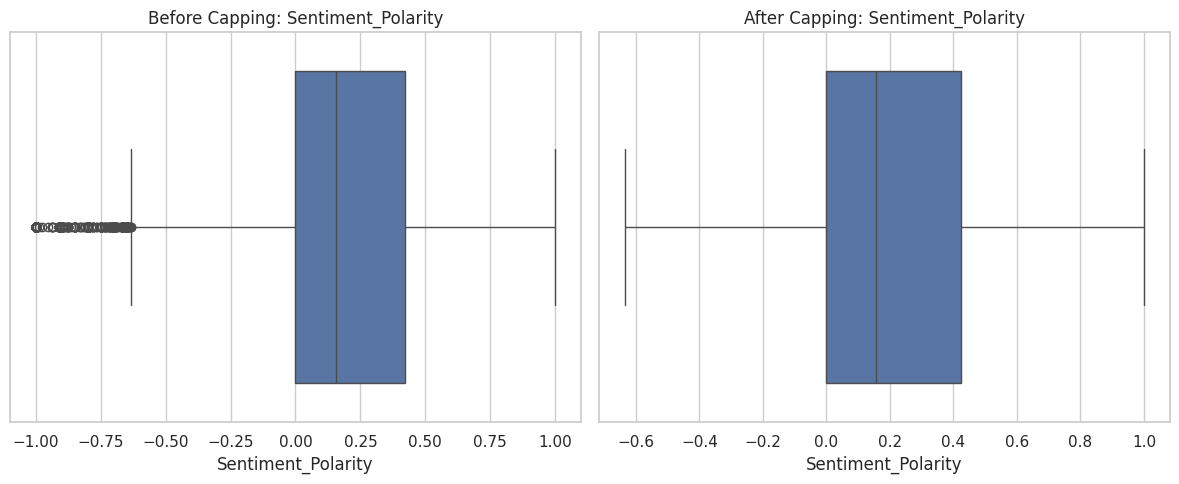

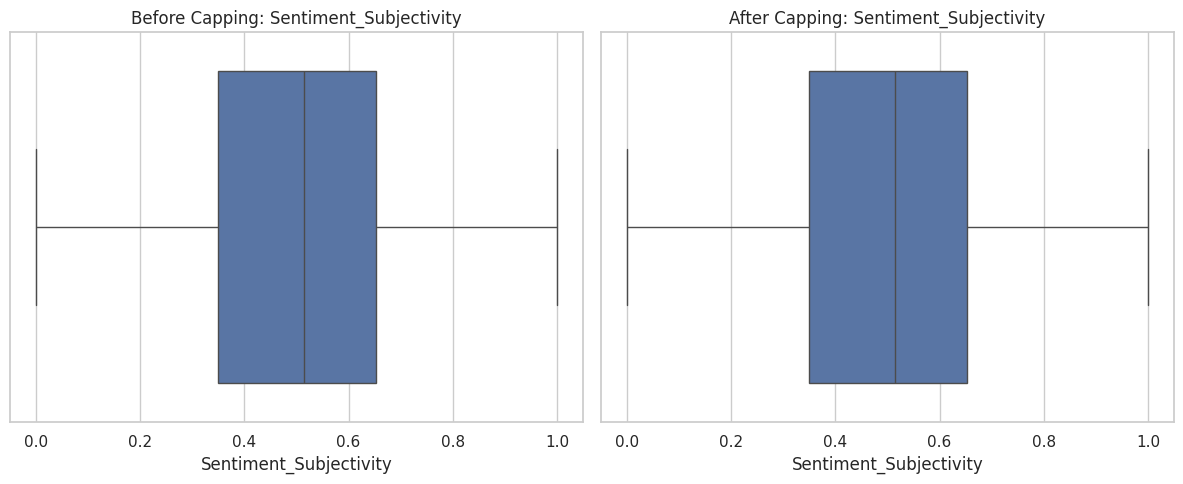

In [474]:
# Define the sentiment columns to visualize
review_outlier_columns = ['Sentiment_Polarity', 'Sentiment_Subjectivity']

# Loop through each column and generate side-by-side boxplots
for col in review_outlier_columns:
    # Create a new figure with specified size
    plt.figure(figsize=(12, 5))

    # Plot boxplot for the column before outlier capping
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    sns.boxplot(x=dfur_clean[col])
    plt.title(f"Before Capping: {col}")  # Title for original data

    # Plot boxplot for the column after outlier capping
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    sns.boxplot(x=dfur_capped[col])
    plt.title(f"After Capping: {col}")  # Title for capped data

    # Adjust layout to prevent label/title overlap
    plt.tight_layout()

    # Display the plots
    plt.show()

In [475]:
#Dataset after Treating the Null Values, Duplicate Values, Data type Conversion and Outliers Capping
dfur_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   App                     29692 non-null  object  
 1   Translated_Review       29692 non-null  object  
 2   Sentiment               29692 non-null  category
 3   Sentiment_Polarity      29692 non-null  float64 
 4   Sentiment_Subjectivity  29692 non-null  float64 
dtypes: category(1), float64(2), object(2)
memory usage: 1.2+ MB


#What all Manipulations have you done and insights you found?

##Data Cleaning and Preprocessing Steps
1. Removed duplicates to ensure unique review entries.

- Dropped null values to avoid gaps or issues in analysis.

- Converted Sentiment column to category type to:

  - Save memory

  - Improve performance in filtering, grouping, and plotting

2. Outlier Detection and Treatment
- Focused on numerical columns:

  - Sentiment_Polarity

  - Sentiment_Subjectivity

- Used the IQR (Interquartile Range) method to identify outliers.

- Chose capping (not dropping):

  - Replaced extreme values with lower/upper IQR limits.

  - Preserved all rows (no data loss).

Result: Dataset shape stayed the same — (29692, 5).

3.  Visualization
- Created boxplots (before vs after capping) for both columns.

- Insights from plots:

  - Outliers were successfully capped.

  - Distributions became tighter and more normal-looking.

##Key Insights
- Sentiment_Polarity had values outside the expected range (like < -1 or > 1), likely due to text processing artifacts.

- Sentiment_Subjectivity also showed some extreme values, indicating very objective or very subjective reviews.

- Capping helped retain all data while minimizing distortion from outliers.

- Converting Sentiment to categorical reduced memory usage and is ideal for classification or grouped visual analysis.



##Merging the two data set Google play store data set and User review data set based on the app key.

In [476]:
# Merge on the 'App' column
df_merged = pd.merge(df_clean, dfur_clean, on='App', how='inner')

# Show shape and preview|
print("Merged DataFrame shape:", df_merged.shape)
df_merged.head()


Merged DataFrame shape: (40414, 21)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Current Ver,Android Ver,Revenue_Estimate,Last Updated Year,Size_KB,Size_Category,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0.3 and up,0.0,2018,14336.0,Medium,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0.3 and up,0.0,2018,14336.0,Medium,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0.3 and up,0.0,2018,14336.0,Medium,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0.3 and up,0.0,2018,14336.0,Medium,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0.3 and up,0.0,2018,14336.0,Medium,I hate,Negative,-0.800,0.900000


In [477]:
# Display a concise summary of the DataFrame df_merged,
# including the number of non-null entries, data types of each column,
# and memory usage
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40414 entries, 0 to 40413
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     40414 non-null  object        
 1   Category                40414 non-null  object        
 2   Rating                  40414 non-null  float64       
 3   Reviews                 40414 non-null  int64         
 4   Size                    40414 non-null  float64       
 5   Installs                40414 non-null  int64         
 6   Type                    40414 non-null  object        
 7   Price                   40414 non-null  float64       
 8   Content Rating          40414 non-null  object        
 9   Genres                  40414 non-null  object        
 10  Last Updated            40414 non-null  datetime64[ns]
 11  Current Ver             40414 non-null  object        
 12  Android Ver             40414 non-null  object

##Variable Discription

| **Column Name**          | **Description**                                                                 |
| ------------------------ | ------------------------------------------------------------------------------- |
| `App`                    | Name of the mobile application                                                  |
| `Category`               | Category under which the app is listed (e.g., GAME, EDUCATION, TOOLS)           |
| `Rating`                 | Average user rating of the app (0 to 5 scale)                                   |
| `Reviews`                | Total number of user reviews submitted                                          |
| `Size`                   | Size of the app in MB (converted from original formats like '19M', '1.2k')      |
| `Installs`               | Number of times the app has been downloaded                                     |
| `Type`                   | Whether the app is `Free` or `Paid`                                             |
| `Price`                  | Price of the app in USD (0 if Free)                                             |
| `Content Rating`         | Age group the app is targeted toward (e.g., Everyone, Teen, Mature 17+)         |
| `Genres`                 | Detailed genre(s) of the app (can be more specific than `Category`)             |
| `Last Updated`           | Last date when the app was updated on the Play Store                            |
| `Current Ver`            | Current version of the app as listed in the store                               |
| `Android Ver`            | Minimum required Android version for the app                                    |
| `Revenue_Estimate`       | Estimated revenue (calculated as `Price × Installs` for Paid apps)              |
| `Last Updated Year`      | Extracted year from the `Last Updated` date                                     |
| `Size_Category`          | Categorized app size (e.g., Small, Medium, Large) based on defined thresholds   |
| `Translated_Review`      | Cleaned and translated user reviews text                                        |
| `Sentiment`              | Sentiment classification of the review (`Positive`, `Negative`, `Neutral`)      |
| `Sentiment_Polarity`     | Numeric polarity score of the review text (-1 to +1, where +1 is most positive) |
| `Sentiment_Subjectivity` | Subjectivity score (0 = objective, 1 = subjective) of the review text           |


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

##Univariate Analysis

#### Chart - 1
Bar Plot – App Category Distribution

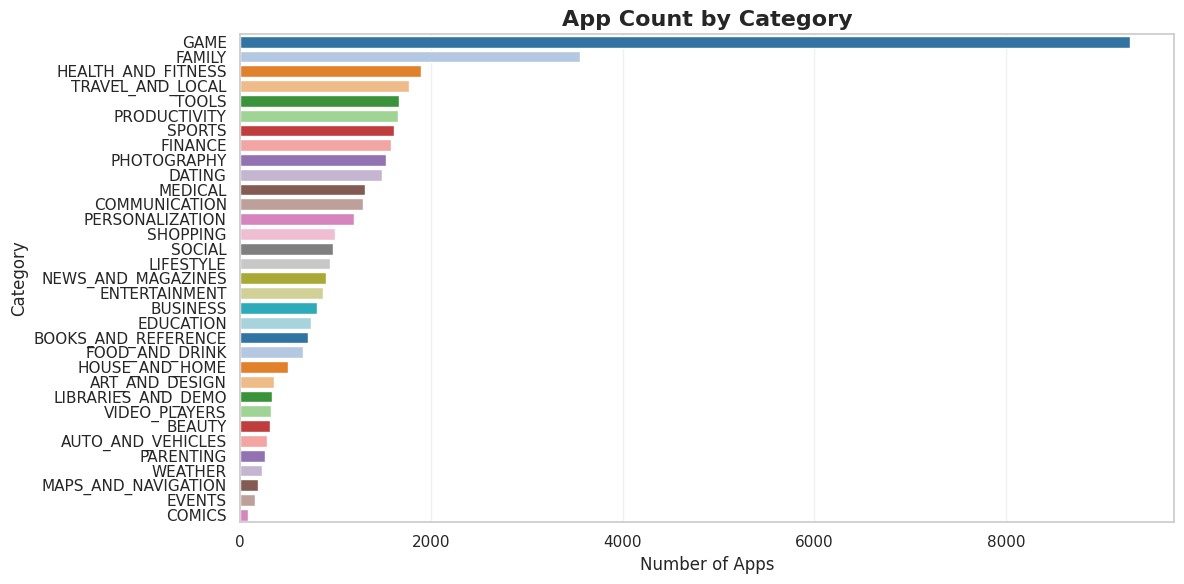

In [478]:
plt.figure(figsize=(12, 6))  # Set the figure size to 12 inches wide and 6 inches tall

# Create a color palette with distinct colors for each unique category (up to 20 colors)
palette = sns.color_palette("tab20", n_colors=len(df_merged['Category'].unique()))

# Plot a horizontal countplot showing the number of apps per category
# The categories are ordered by their count (most apps at the top)
sns.countplot(
    data=df_merged,
    y='Category',
    order=df_merged['Category'].value_counts().index,
    palette=palette
)

# Add a bold and larger title to the plot
plt.title('App Count by Category', fontsize=16, fontweight='bold')

# Label the x-axis
plt.xlabel('Number of Apps', fontsize=12)

# Label the y-axis
plt.ylabel('Category', fontsize=12)

# Add a subtle grid on the x-axis for easier readability
plt.grid(axis='x', alpha=0.3)

# Automatically adjust subplot parameters for a clean layout without overlap
plt.tight_layout()

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

1. A horizontal countplot clearly shows which categories have the highest or lowest number of apps.

2. It’s important for understanding market saturation or opportunity areas.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.
1. The GAME and FAMILY categories dominate the Google Play Store, with GAME having the highest app count by a large margin.

2. Other popular categories include HEALTH_AND_FITNESS, TRAVEL_AND_LOCAL, and TOOLS.

3. Niche categories such as COMICS, EVENTS, and MAPS_AND_NAVIGATION have very few apps.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Positive Business Impact:
Businesses looking to launch apps can analyze saturation: entering high-competition categories like GAME may require more innovation or marketing investment.

On the other hand, less saturated niches like COMICS or EVENTS might offer untapped market opportunities.

App marketers and developers can prioritize categories that align with user demand and competition.

 Potential Negative Growth Risks:
Entering the GAME category without a strong differentiator could lead to low visibility and poor user retention due to intense competition.

Similarly, if an app is placed in a low-demand category without a clear need, it may struggle to gain traction.



#### Chart - 2
Histogram- Distribution of App Ratings


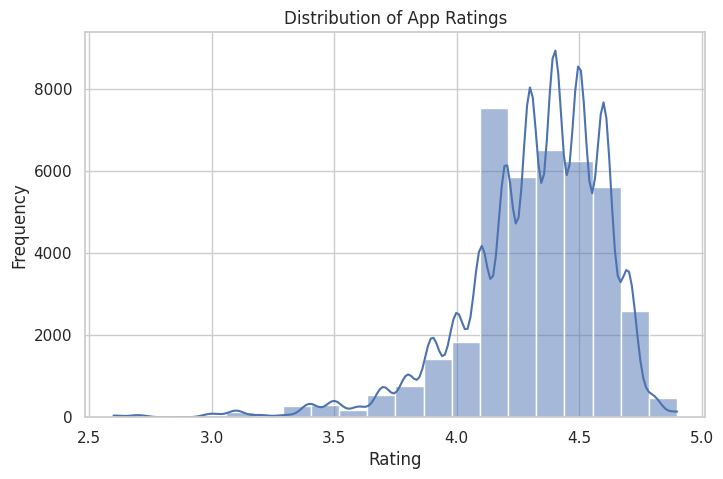

In [479]:
# Set the figure size to 8 inches wide and 5 inches tall
plt.figure(figsize=(8, 5))

# Create a histogram to show the distribution of app ratings
# 'bins=20' sets the number of intervals for grouping the rating values
# 'kde=True' adds a smooth curve (Kernel Density Estimate) to represent the distribution
sns.histplot(df_merged['Rating'], bins=20, kde=True)

# Add a title to the plot
plt.title('Distribution of App Ratings')

# Label the x-axis as 'Rating'
plt.xlabel('Rating')

# Label the y-axis as 'Frequency'
plt.ylabel('Frequency')

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.
 A histogram is ideal for showing the distribution of numerical values, like Rating.

Adding a KDE (Kernel Density Estimate) line helps visualize the underlying shape of the distribution — whether it's normal, skewed, or multimodal.

It helps detect concentration patterns, outliers, and data skewness.



##### 2. What is/are the insight(s) found from the chart?

Answer Here
- The majority of app ratings cluster between 4.0 and 4.5, indicating generally favorable user reviews.

- The peak is around 4.2–4.4, showing this is the most common rating range.

- Very few apps are rated below 3.5 or above 4.8, suggesting users rarely give extremely low or high scores unless performance is exceptional or very poor.

- The distribution is slightly left-skewed, meaning fewer low-rated apps exist compared to high-rated ones.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
- Positive Business Impact:
  - Developers can benchmark their apps against this average rating range (4.0–4.5). If an app falls below this, it may need improvement in UX, performance, or support.

  - Product teams can aim for at least a 4.2+ rating to stay competitive and maintain user trust.

  - Marketers can emphasize maintaining a high rating since users often prioritize highly rated apps when choosing what to download.

- Potential Risks / Negative Indicators:
If an app consistently has ratings below 3.5, it may suffer from:

  - Poor performance

  - Bug issues

  - Unmet user expectations

#### Chart - 3
 Histogram – App Installs (Log Scale)

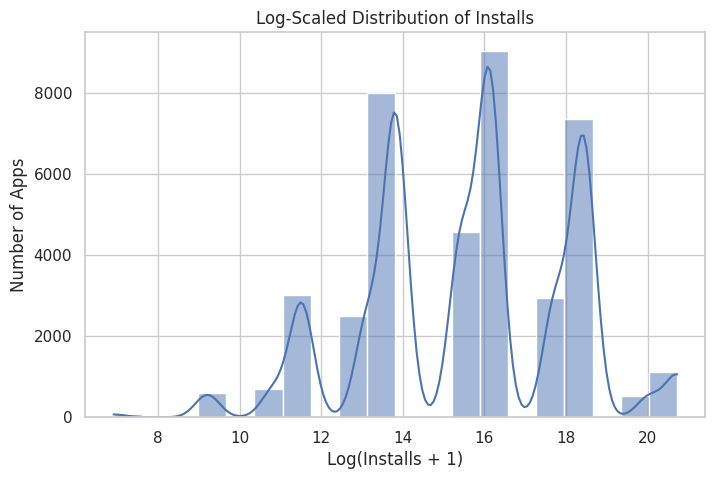

In [480]:
# Set the size of the plot
plt.figure(figsize=(8, 5))

# Create a histogram of installs using log scale (log1p handles zero safely by computing log(Installs + 1))
# 'bins=20' defines the number of intervals, and 'kde=True' overlays a kernel density estimate for smooth distribution
sns.histplot(np.log1p(df_merged['Installs']), bins=20, kde=True)

# Set the title of the chart
plt.title('Log-Scaled Distribution of Installs')

# Label the x-axis with log-scaled transformation info
plt.xlabel('Log(Installs + 1)')

# Label the y-axis
plt.ylabel('Number of Apps')

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.
A log-scaled histogram with KDE (Kernel Density Estimate) was chosen to visualize the distribution of app installs because the raw install numbers are highly skewed, ranging from a few installs to billions. Applying a logarithmic scale (Log(Installs + 1)) helps normalize the data and makes it easier to observe the patterns, clusters, and outliers in the distribution.



##### 2. What is/are the insight(s) found from the chart?

Answer Here
- The distribution shows multiple peaks, indicating that app installs tend to cluster around certain log-scaled values.

- These peaks suggest popular install tiers, like 1,000+, 10,000+, 100,000+, 1 million+, etc., which aligns with how the Play Store categorizes installs.

- Most apps fall between Log(Installs + 1) values of 12 to 18, corresponding to moderate popularity (10,000 to 100 million installs).

- There are fewer apps in the very high range (above 20), showing that very few apps achieve extremely high install numbers.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Positive Business Impact:

- Helps benchmark app performance: Developers can compare their app’s install count to market norms.

- Identifies popular tiers for targeting: Knowing where most apps fall helps in positioning new apps for competitive differentiation or targeted marketing.

- Supports data-driven marketing or investment decisions: For example, if an app is just below a popular threshold, it may make sense to boost installs to push it to the next tier and increase visibility.

Negative Growth Insight:

- A large number of apps are concentrated in mid-tier install ranges, meaning there is high competition in those bands. Apps here might struggle to stand out unless they offer unique features or strong user acquisition strategies.

#### Chart - 4
Box Plot – App Price Distribution

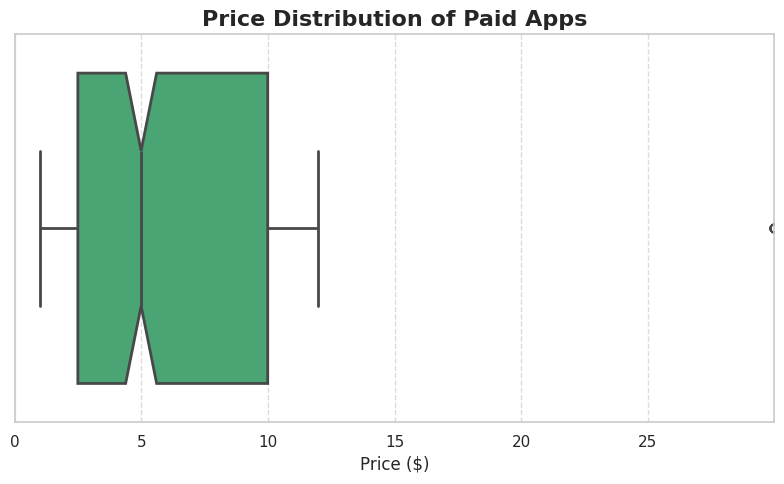

In [481]:
# Filter the dataframe to keep only paid apps
paid_apps = df_merged[df_merged['Type'] == 'Paid']

# Set the plot size (width=8 inches, height=5 inches)
plt.figure(figsize=(8, 5))

# Create a boxplot for the price distribution of paid apps
# Use a pastel green color for the boxplot
# Add notches to show a confidence interval around the median
# Make the lines thicker for better visibility
sns.boxplot(
    x=paid_apps['Price'],
    color='mediumseagreen',
    notch=True,
    linewidth=2
)

# Set a bold title with larger font size
plt.title('Price Distribution of Paid Apps', fontsize=16, fontweight='bold')

# Label the x-axis with font size adjustment
plt.xlabel('Price ($)', fontsize=12)

# Limit the x-axis to the 95th percentile value to reduce impact of extreme price outliers
plt.xlim(0, paid_apps['Price'].quantile(0.95))

# Add dashed grid lines on the x-axis for easier reading of price values
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Automatically adjust plot layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.
- A boxplot was selected to analyze the distribution of prices for paid apps because:

- It provides a clear view of the median, interquartile range (IQR), and outliers.

- It helps in identifying skewness and extreme values in price data.

- Boxplots are excellent for summarizing continuous variables and spotting pricing anomalies in a compact visual.



##### 2. What is/are the insight(s) found from the chart?

Answer Here

- The median price of paid apps appears to be around $5–$6, indicating that most paid apps are reasonably priced.

- A large portion of paid apps fall between $2 and $10.

- Even after trimming the top 5% extreme values, some outliers are still visible, which suggests that a few apps are priced significantly higher than the rest.

- This skew indicates that while most paid apps follow standard pricing, a minority of premium-priced apps exist in the market.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Positive Business Impact:

- Developers and product managers can set competitive pricing by aligning with the most common price range ($2–$10).

- Helps identify whether an app is overpriced or underpriced compared to the market, aiding in better monetization strategy.

- The outliers may suggest niche or premium apps, which could be a market opportunity if justified by value or uniqueness.

Insights That Could Lead to Negative Growth:

- If an app is priced well above the median without a clear value proposition, it risks losing customers to cheaper alternatives.

#### Chart - 5
Count Plot – Content Rating


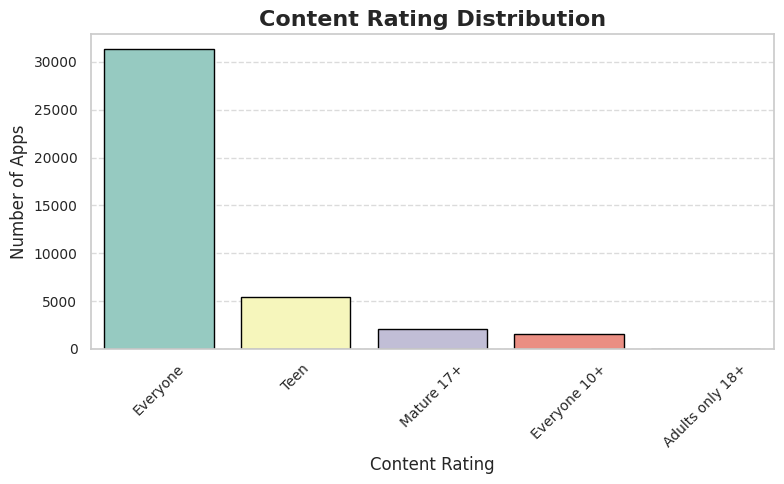

In [482]:
plt.figure(figsize=(8, 5))  # Set the figure size to 8 inches wide and 5 inches tall

# Create a bright qualitative color palette with distinct colors for each unique Content Rating
palette = sns.color_palette("Set3", n_colors=df_merged['Content Rating'].nunique())

# Plot countplot for Content Rating with bars ordered by frequency (most to least)
# edgecolor='black' adds a black border around bars to make colors stand out more
sns.countplot(
    data=df_merged,
    x='Content Rating',
    order=df_merged['Content Rating'].value_counts().index,
    palette=palette,
    edgecolor='black'
)

# Add a bold, larger title to the chart
plt.title('Content Rating Distribution', fontsize=16, fontweight='bold')

# Label the x-axis and y-axis with font size adjustments
plt.xlabel('Content Rating', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)

# Rotate x-axis labels 45 degrees and set font size for better readability
plt.xticks(rotation=45, fontsize=10)

# Set y-axis tick label font size
plt.yticks(fontsize=10)

# Add dashed grid lines along y-axis to help read bar heights easily
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit elements cleanly without overlap
plt.tight_layout()

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here. A count plot (bar chart) was chosen because:

- The Content Rating column is categorical, and a count plot is ideal for showing the number of apps in each category.

- It provides a clear visual comparison of how many apps are designed for different age groups

##### 2. What is/are the insight(s) found from the chart?

Answer Here
- The majority of apps are rated “Everyone”, with over 30,000 apps, indicating a strong preference for general audience content.

- Apps rated for Teens, Mature 17+, and Everyone 10+ are significantly fewer in comparison.

- Adults only 18+ has the lowest number of apps, suggesting either lower demand or stricter content policies.

-This shows that most developers prefer to keep their apps accessible to all age groups, likely to maximize reach and downloads.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

Positive Business Impact:

- Businesses targeting a wider user base (like families, kids, general users) can clearly see that “Everyone” is the most saturated and competitive rating category.

- Developers can strategize app design (e.g., safety, simplicity, no mature content) to fit into this category and gain more visibility.

- Companies targeting niche markets (e.g., Mature 17+) can use this insight to differentiate themselves where competition is lower.

Negative Growth Insight:

- Oversaturation in the “Everyone” category may lead to higher competition, making it difficult for new apps to gain visibility.

#### Chart - 6
Count Plot – Free vs Paid Apps


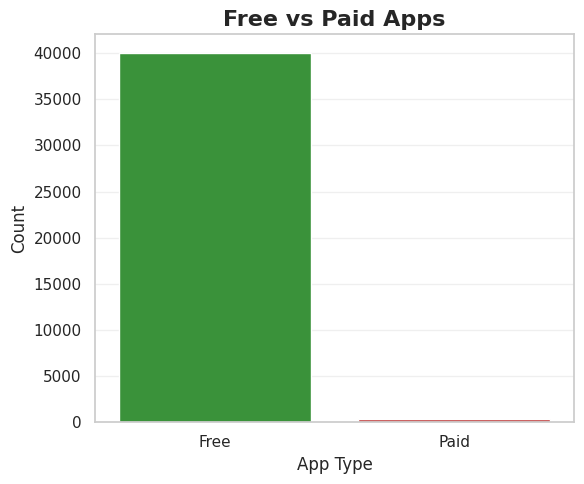

In [483]:
plt.figure(figsize=(6, 5))  # Set the figure size to 6x5 inches

# Create a count plot showing the number of apps by 'Type' (Free vs Paid)
# Use a vibrant custom color palette: teal (#2ca02c) and magenta (#d62728)
sns.countplot(data=df_merged, x='Type', palette=['#2ca02c', '#d62728'])

# Set the plot title with larger font size and bold weight
plt.title('Free vs Paid Apps', fontsize=16, fontweight='bold')

# Label the x-axis as 'App Type' with font size 12
plt.xlabel('App Type', fontsize=12)

# Label the y-axis as 'Count' with font size 12
plt.ylabel('Count', fontsize=12)

# Add a light horizontal grid for better readability, only on y-axis
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()  # Adjust layout to prevent clipping of labels and titles

plt.show()  # Display the plot


##### 1. Why did you pick the specific chart?

Answer Here.
- A count plot (bar chart) was selected because:

- The Type column is categorical with two values: Free and Paid.

- Count plots are ideal for comparing the frequency of categories.

- It provides a quick and clear visual representation of the dominant app type in the Play Store dataset.



##### 2. What is/are the insight(s) found from the chart?

Answer Here.
- The vast majority of apps are Free, with over 40,000 apps, while Paid apps are very few in comparison.

- This highlights that free apps dominate the Google Play Store ecosystem.

- Indicates a strong preference from both developers (to offer free apps) and users (to download free content).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Positive Business Impact:

- Helps app developers decide on a monetization model—i.e., free apps with in-app purchases or ads may have higher reach and install rates.

- Businesses can leverage the free model to acquire users quickly, then monetize through alternative channels (freemium models, upselling, etc.).

- Also signals to investors or marketers that targeting free apps may yield better engagement and growth.

Insights That Could Lead to Negative Growth:

- Due to the overcrowding in the free app segment, it becomes challenging to gain visibility and retain users without unique features or aggressive marketing.

#### Chart - 7
 Bar Plot – Sentiment Distribution

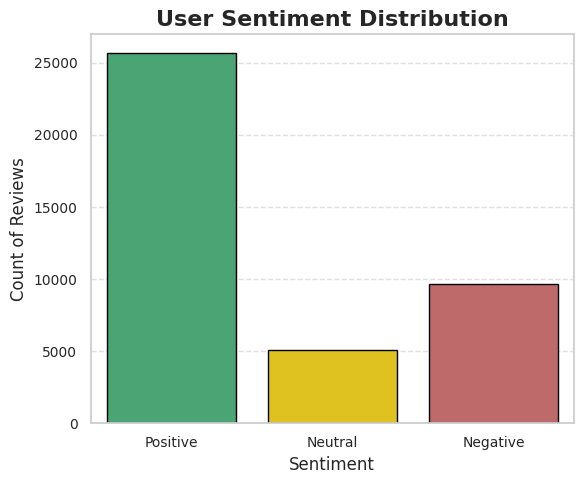

In [484]:
# Set the figure size for the plot (width=6 inches, height=5 inches)
plt.figure(figsize=(6, 5))

# Define a custom color palette for the sentiment categories
# You can pick any palette (like Set1, Set2, Pastel1, etc.) or define your own
palette = {'Positive': 'mediumseagreen', 'Neutral': 'gold', 'Negative': 'indianred'}

# Create a count plot to show the number of reviews per sentiment category
# The sentiment categories are ordered as: Positive, Neutral, Negative
sns.countplot(
    data=df_merged,
    x='Sentiment',
    order=['Positive', 'Neutral', 'Negative'],
    palette=palette,           # Apply the custom colors
    edgecolor='black'          # Add borders around bars for better contrast
)

# Set the title of the chart with larger, bold font
plt.title('User Sentiment Distribution', fontsize=16, fontweight='bold')

# Label the x-axis with adjusted font size
plt.xlabel('Sentiment', fontsize=12)

# Label the y-axis with adjusted font size
plt.ylabel('Count of Reviews', fontsize=12)

# Customize tick label sizes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add horizontal grid lines for visual ease
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust the layout to avoid overlap or clipping
plt.tight_layout()

# Display the chart
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
- A count plot (bar chart) was selected because:

- The Sentiment column contains categorical sentiment labels: Positive, Neutral, and Negative.

- A count plot effectively displays the number of user reviews in each sentiment category.

- It provides a clear overview of customer satisfaction and dissatisfaction based on user feedback.



##### 2. What is/are the insight(s) found from the chart?

Answer Here
- Positive reviews dominate, indicating that most users are satisfied with their app experience.

- A moderate number of reviews are negative, suggesting there are some pain points that need attention.

- Neutral sentiment is the least frequent, showing users are more likely to express clear opinions (either positive or negative) rather than indifferent feedback.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

Positive Business Impact:

- High proportion of positive sentiment reflects strong user satisfaction, which can help in:

- User retention and word-of-mouth promotion

- Higher ratings and app visibility

- Attracting new users and investors

- Businesses can leverage positive feedback in marketing and app store optimization (ASO) strategies.

Insights That Could Lead to Negative Growth:

- The presence of significant negative reviews indicates user dissatisfaction areas (e.g., bugs, poor UI/UX, missing features).

- If negative sentiment isn't addressed, it may lead to:

- App uninstallations

- Lower ratings

- Loss of trust and credibility

#### Chart - 8

Count Plot – App Size Category

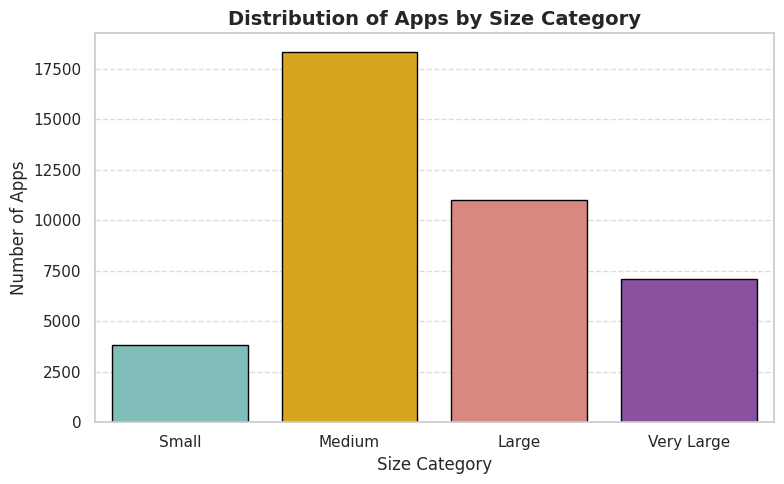

In [485]:
# Set the figure size for the plot (width=8 inches, height=5 inches)
plt.figure(figsize=(8, 5))

# Define a custom color palette for the size categories
# You can use built-in palettes like "Set2", or specify your own list of colors
custom_palette = ['#76c7c0', '#f4b400', '#e67c73', '#8e44ad']  # Light blue, yellow, coral, purple

# Create a count plot to show the number of apps by size category
sns.countplot(
    data=df_merged,
    x='Size_Category',
    order=['Small', 'Medium', 'Large', 'Very Large'],
    palette=custom_palette,        # Apply the custom color palette
    edgecolor='black'              # Add black borders around bars for better visual separation
)

# Set the title of the chart
plt.title('Distribution of Apps by Size Category', fontsize=14, fontweight='bold')

# Label the x-axis
plt.xlabel('Size Category', fontsize=12)

# Label the y-axis
plt.ylabel('Number of Apps', fontsize=12)

# Add horizontal grid lines on the y-axis for easier reading
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here. I chose a horizontal barplot because:

A bar chart is ideal for comparing the frequency of categorical data. In this case, we are comparing how many apps fall into each size category (Small, Medium, Large, Very Large). It clearly shows distribution and makes it easy to identify which category is most or least common.



##### 2. What is/are the insight(s) found from the chart?

Answer Here

- The majority of apps fall under the "Medium" size category, followed by "Large".

- "Small" sized apps are the least common, indicating that most apps on the Play Store require more than minimal storage.

- A significant number of apps are also "Very Large", which may represent games or multimedia apps.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

 Positive Business Impact:

- Developers can use this insight to benchmark their app sizes and optimize storage usage to fit user expectations.

- Marketers can tailor campaigns (e.g., "Lightweight app under 10MB!") to promote small-sized apps which are rare and attractive to low-storage users.

- Product teams might focus on building feature-rich apps in the "Medium" to "Large" range, where most apps already reside, as this is clearly acceptable to users.

 Potential Negative Insight:

- If an app is "Very Large" and not providing high value (e.g., it’s not a game or utility-heavy), users might avoid it due to storage constraints or data usage concerns, especially in developing markets.

##Bivariate Analysis

#### Chart - 9
Scatter Plot – Rating vs. Reviews

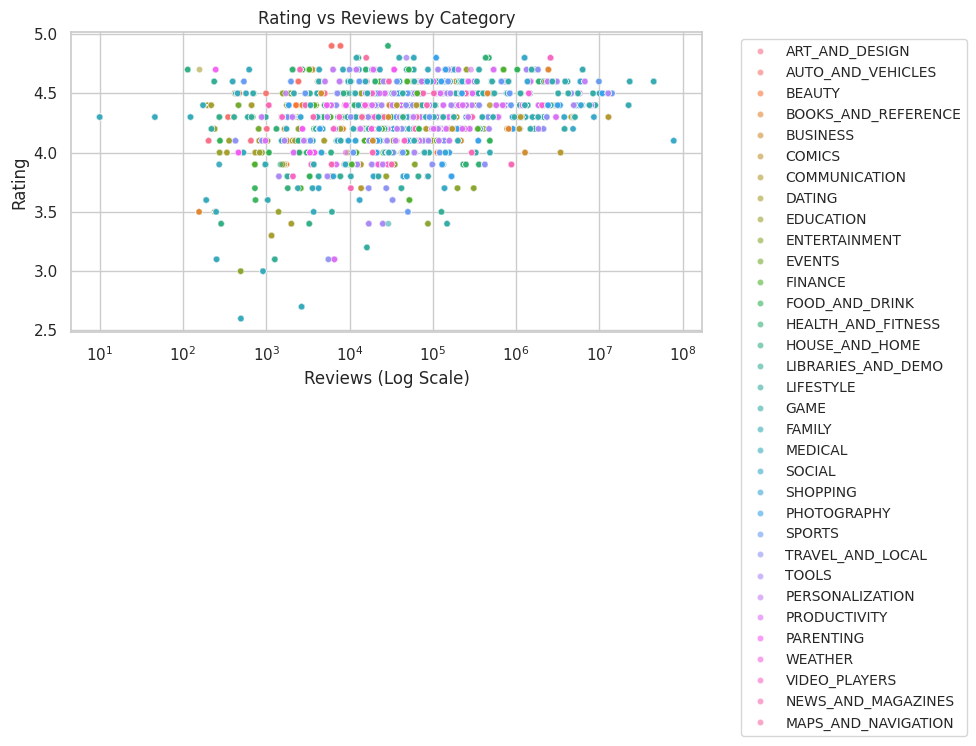

In [486]:
# Create a figure with custom width and height
plt.figure(figsize=(10, 6))

# Create a scatter plot using seaborn
# - data=df_merged → data source
# - x='Reviews', y='Rating' → axes
# - hue='Category' → different colors for each category
# - alpha=0.6 → transparency for better visibility
# - s=20 → marker size
sns.scatterplot(data=df_merged, x='Reviews', y='Rating', hue='Category', alpha=0.6, s=20)

# Set x-axis to logarithmic scale (to handle skewed review values)
plt.xscale('log')

# Add chart title
plt.title('Rating vs Reviews by Category')

# Label x-axis
plt.xlabel('Reviews (Log Scale)')

# Label y-axis
plt.ylabel('Rating')

# Adjust the legend position to avoid overlapping the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# Automatically adjust layout to prevent cutoff of labels and legend
plt.tight_layout()

# Display the final plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.The scatter plot was chosen because it is ideal for analyzing the relationship between two continuous variables—in this case, Reviews (log scale) and Rating—while also using color to segment by Category.
Using a logarithmic scale on the x-axis helps to handle skewed data, especially since review counts often vary widely. This visualization also captures outliers, clusters, and variations across app categories.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Several key insights can be drawn from this chart:

- High ratings are common: Most apps across categories have ratings between 4.0 and 4.8, suggesting users generally rate apps positively.

- No direct correlation between reviews and rating: Apps with a very high number of reviews (e.g., 10⁶ to 10⁷) don’t necessarily have the highest ratings. In fact, some highly reviewed apps have ratings as low as 3.5 or below.

- Outliers exist: A few apps in certain categories (e.g., COMMUNICATION, TOOLS) have low ratings despite high reviews, which could indicate user dissatisfaction or issues with recent updates.

- Category-based trends: Some categories like ART_AND_DESIGN, EDUCATION, and HEALTH_AND_FITNESS tend to have consistently high ratings, even with lower review counts, showing strong user satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Positive Business Impact:
Target high-rated categories: Categories like HEALTH_AND_FITNESS, EDUCATION, and LIFESTYLE maintain high user satisfaction. Investing more in these areas could yield positive user engagement and retention.

Leverage customer satisfaction: Even apps with fewer reviews but high ratings (especially in niche categories) can be marketed as high-quality products to attract new users.

Improve lower-rated apps: Identifying and fixing issues in apps with many reviews but poor ratings (e.g., in COMMUNICATION, TOOLS) can quickly improve user experience and brand perception due to the large user base.

❌ Potential Negative Growth:
Popular but poorly rated apps are at risk: Apps with millions of reviews but low ratings may face user churn, poor word-of-mouth, and app store penalties (e.g., lower ranking).

Ignoring rating trends: Failing to monitor rating trends in fast-growing categories could lead to missed opportunities or negative press due to unsolved issues.

#### Chart - 10
Box Plot – Category vs. Installs

<Figure size 1400x600 with 0 Axes>

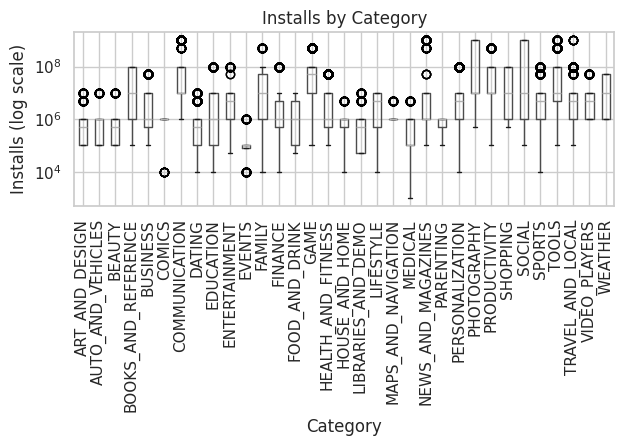

In [487]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Set the figure size (width=14 inches, height=6 inches)
plt.figure(figsize=(14, 6))

# Create a boxplot using Pandas' built-in method
# - column='Installs' → Values to plot
# - by='Category' → Grouped by app categories
# - rot=90 → Rotate category labels for readability
df_merged.boxplot(column='Installs', by='Category', rot=90)

# Set the y-axis to logarithmic scale (since install counts vary widely)
plt.yscale('log')

# Set the main title of the chart
plt.title('Installs by Category')

# Remove the default Pandas-generated subplot title
plt.suptitle('')

# Label the x-axis
plt.xlabel('Category')

# Label the y-axis
plt.ylabel('Installs (log scale)')

# Adjust layout so labels and titles fit well
plt.tight_layout()

# Display the final plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
This chart was selected because it shows a clear distribution of app installs across different categories using a box plot with a logarithmic scale. The logarithmic y-axis is useful here because app installs vary greatly—from thousands to billions. This chart allows us to visually compare the popularity (install volume) of different app categories and identify outliers and trends at a glance.



##### 2. What is/are the insight(s) found from the chart?

Answer Here
- Highly installed categories: Categories like COMMUNICATION, SOCIAL, TOOLS, VIDEO_PLAYERS, and PRODUCTIVITY show a high median and presence of outliers with installs in the range of 10⁸ to 10⁹, indicating widespread popularity.

- Low install categories: Categories such as BEAUTY, PARENTING, and LIBRARIES_AND_DEMO have lower median installs, mostly around 10⁴ to 10⁶, indicating they are more niche or less popular.

- Wide distribution in some categories: Some categories (e.g., COMMUNICATION, TOOLS) have a wide range of installs, suggesting that while some apps are extremely popular, others in the same category struggle to gain traction.

- Outliers in nearly every category: There are standout apps (black circles) in almost every category, suggesting that even in low-install categories, exceptional apps can still achieve high success.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

- Invest in high-install categories: Categories with consistently high installs (COMMUNICATION, SOCIAL, TOOLS) are good candidates for new product development or advertising investment due to large user bases.

- Opportunity in niche markets: Categories with low median installs but presence of outliers (EDUCATION, HEALTH_AND_FITNESS, FOOD_AND_DRINK) show potential for growth if a high-quality app is launched.

- Marketing focus: For categories with wide install distribution, businesses can tailor strategies to target underserved segments within high-volume categories.

❌ Potential Negative Growth:

- Overcrowded categories: Some popular categories may be saturated (e.g., TOOLS, SOCIAL), making it difficult for new apps to stand out without significant innovation or marketing spend.

- Low-demand categories: Categories with both low median and few high outliers (PARENTING, LIBRARIES_AND_DEMO) might offer limited ROI, and investment here should be done carefully or with a clear niche strategy.


#### Chart - 11
 Violin Plot – Content Rating vs. Rating

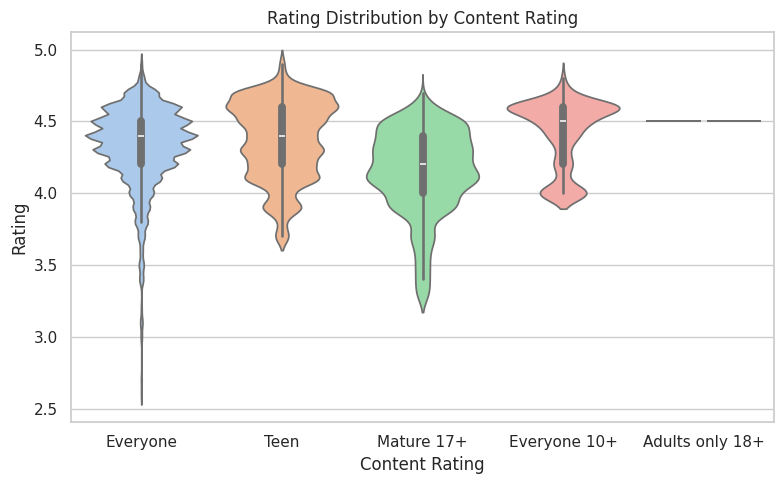

In [488]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size to 8 inches wide by 5 inches tall
plt.figure(figsize=(8, 5))

# Create a violin plot using Seaborn
# - data=df_merged → Data source
# - x='Content Rating' → Categories on the x-axis
# - y='Rating' → Numerical values to be visualized
# - palette='pastel' → Use a light, soft color theme
sns.violinplot(data=df_merged, x='Content Rating', y='Rating', palette='pastel')

# Add a title to the plot
plt.title('Rating Distribution by Content Rating')

# Label the x-axis
plt.xlabel('Content Rating')

# Label the y-axis
plt.ylabel('Rating')

# Adjust layout to prevent label cutoff or overlap
plt.tight_layout()

# Display the final plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.This violin plot was chosen because it clearly shows the distribution and density of app ratings based on different content rating categories such as "Everyone", "Teen", "Mature 17+", etc. Unlike box plots, violin plots reveal not just the summary statistics (like median and quartiles) but also the shape of the distribution, helping identify skewness, outliers, and concentration of data points. It’s ideal for comparing how user satisfaction (ratings) varies across content suitability groups.



##### 2. What is/are the insight(s) found from the chart?

Answer Here
- "Teen" and "Everyone" rated apps tend to have the highest and most consistent ratings, with the densest distribution around 4.4 to 4.6.

- "Mature 17+" apps show a wider and flatter distribution, indicating more variation in user satisfaction, with ratings stretching from 3.0 to 4.8.

- "Everyone 10+" is also fairly high in ratings, closely following the "Everyone" group.

- "Adults only 18+" has a very limited representation (flat line), suggesting either very few apps in this category or lack of rating diversity/data.

- The lowest minimum ratings are seen in the "Everyone" category, likely due to a larger and more varied dataset, including poorly performing apps.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.
Positive Business Impact:
- Focus on high-performing segments: Apps rated for "Everyone" and "Teen" tend to receive higher and more consistent user ratings, making them ideal for broader market targeting.

- Content strategy alignment: For developers or marketers, tailoring content toward the "Teen" or "Everyone" rating can lead to better user reception and engagement.

- Market potential: The consistent high ratings in these categories suggest strong user trust and can be leveraged for product launches, advertising, or in-app monetization.

Potential Negative Growth:

- Volatility in "Mature 17+" apps: Greater variability in ratings could indicate less consistent user satisfaction or controversial content, possibly leading to lower retention or higher uninstall rates.

- Lack of data in "Adults only 18+" category: This could indicate low demand, regulatory barriers, or market hesitation, making it a risky area for investment without deeper research.



#### Chart - 12
Line Plot – Last Updated Year vs. Rating



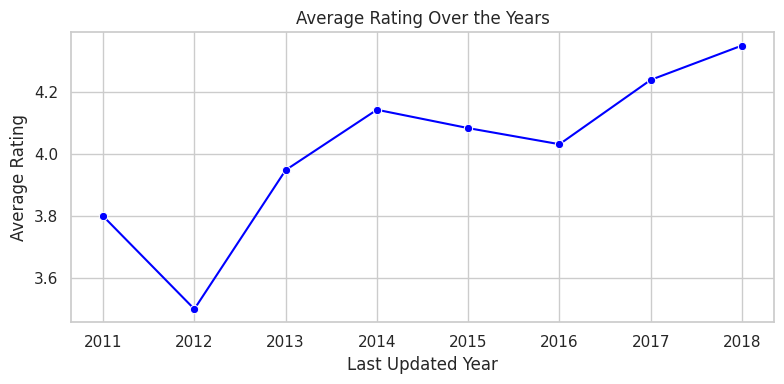

In [489]:
# Step 1: Group the data by 'Last Updated Year' and calculate the average 'Rating' for each year
year_rating = df_merged.groupby('Last Updated Year')['Rating'].mean().reset_index()

# Step 2: Set the figure size (8 inches wide by 4 inches tall)
plt.figure(figsize=(8, 4))

# Step 3: Create a line plot using Seaborn
# - data=year_rating → use the grouped data
# - x='Last Updated Year' → x-axis shows each year
# - y='Rating' → y-axis shows average rating
# - marker='o' → add circle markers at each data point
# - color='blue' → set the line color
sns.lineplot(data=year_rating, x='Last Updated Year', y='Rating', marker='o', color='blue')

# Step 4: Set the title of the plot
plt.title('Average Rating Over the Years')

# Step 5: Label the x-axis
plt.xlabel('Last Updated Year')

# Step 6: Label the y-axis
plt.ylabel('Average Rating')

# Step 7: Adjust layout so titles/labels fit nicely
plt.tight_layout()

# Step 8: Show the final plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here. This line chart was chosen because it effectively shows the trend of average app ratings over time. It visually captures how user satisfaction (as reflected by ratings) has evolved with app updates from 2011 to 2018.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

- Steady Improvement: Overall, there is a positive trend in average ratings from 2012 onwards, indicating improving app quality and user satisfaction over the years.

- Lowest Point in 2012: A dip in 2012 suggests possible issues in app quality or user experience during that period.

- Recent Highs: Apps updated in 2017 and 2018 have the highest average ratings, suggesting that recent development and update strategies are more aligned with user expectations.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Yes. These insights can:

- Encourage frequent and quality updates, since recent updates correlate with higher ratings.

- Help product teams analyze what changed after 2012 to drive improvement.

- Support data-driven development by focusing on features and practices that have led to better ratings in recent years.

- Higher ratings can boost user trust, app visibility, and installs, directly contributing to better business outcomes.

#### Chart - 13
Revenue Estimate by User Sentiment and App Type (Box Plot)

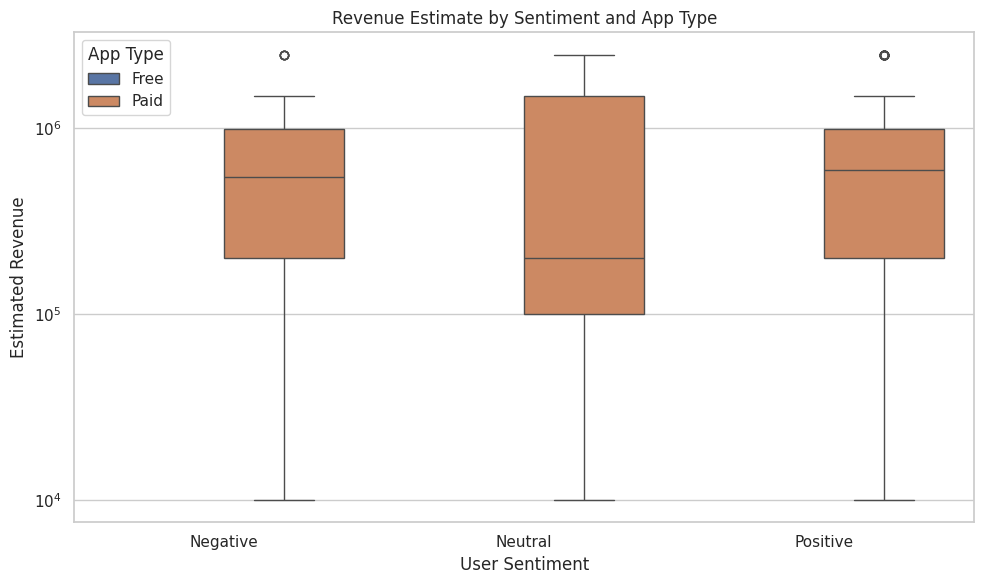

In [490]:
# Set the overall figure size for better visibility
plt.figure(figsize=(10, 6))

# Create a boxplot to visualize the distribution of revenue estimate
# across different sentiment categories (Positive, Neutral, Negative),
# while differentiating Free vs Paid apps using the hue argument
sns.boxplot(data=df_merged, x='Sentiment', y='Revenue_Estimate', hue='Type')

# Add a descriptive title to the plot
plt.title('Revenue Estimate by Sentiment and App Type')

# Label the x-axis (sentiment categories)
plt.xlabel('User Sentiment')

# Label the y-axis (revenue)
plt.ylabel('Estimated Revenue')

# Apply logarithmic scale to y-axis to handle wide variation in revenue values
plt.yscale('log')

# Add a legend to clarify which color represents Free or Paid apps
plt.legend(title='App Type')

# Automatically adjust subplot spacing to prevent label overlap
plt.tight_layout()

# Display the final plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.
- Boxplots are ideal for comparing distribution of a numerical variable across categorical groups, especially when the variable (Revenue) is highly skewed.

- This plot helps:

- Show the spread (median, quartiles, outliers) of estimated revenue per Sentiment level.

- Compare Free vs Paid apps side by side (via color hue).

- Easily detect differences in revenue patterns across user sentiment.

- Log scale on the Y-axis allows us to see both small and large revenue values clearly.




##### 2. What is/are the insight(s) found from the chart?

- Paid apps consistently generate higher revenue across all sentiment categories.

- Neutral sentiment among Paid apps shows the widest spread in revenue, indicating some apps earn very high revenue despite neutral user sentiment.

- Positive sentiment does not guarantee the highest median revenue—Neutral and Negative sentiments sometimes show comparable or even higher medians.

- Free apps’ revenue is much lower overall, though there are a few outliers with relatively higher earnings (possibly ad-supported).

- This suggests monetization model (Free vs Paid) has more impact on revenue than sentiment alone.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

- Positive Business Impact:
These insights can help businesses:

  - Segment monetization strategy—Paid apps can focus on high-value propositions regardless of sentiment to sustain revenue.

  - Realize that user sentiment doesn’t fully determine revenue, especially for Paid apps—so balancing quality and marketing is key.

  - Understand that Free apps need alternative monetization (ads, in-app purchases) to close the revenue gap.

- Potential Negative Growth Insight:
Apps with neutral or negative sentiment but high revenue may face:

  - User churn (negative reviews eventually reducing downloads).

  - Brand damage, harming future releases.

  - Free apps with consistently low revenue despite positive sentiment might be:

  - Failing to monetize happy users, missing out on growth.

  - Needing better upsell, ads optimization, or premium tiers.


####Chart - 14

###Strip Plot – Size Category vs. Revenue Estimate

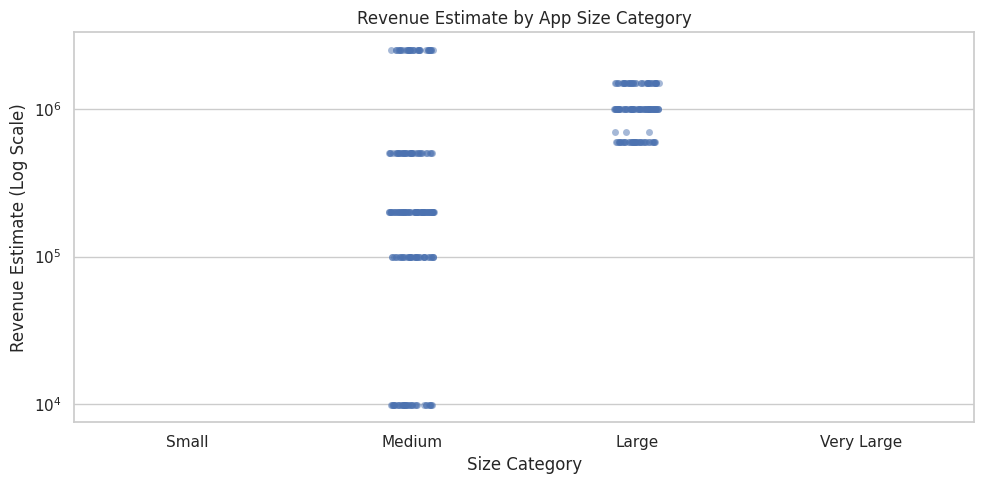

In [491]:
# Step 1: Set the size of the figure (10 inches wide by 5 inches tall)
plt.figure(figsize=(10, 5))

# Step 2: Create a strip plot using Seaborn
# - data=df_merged → use the merged dataset
# - x='Size_Category' → categories of app size on the x-axis
# - y='Revenue_Estimate' → revenue values on the y-axis
# - alpha=0.5 → set transparency for overlapping dots
# - jitter=True → slightly scatter points horizontally to reduce overlap
sns.stripplot(data=df_merged, x='Size_Category', y='Revenue_Estimate', alpha=0.5, jitter=True)

# Step 3: Use log scale on the y-axis to better visualize large revenue differences
plt.yscale('log')

# Step 4: Add a plot title
plt.title('Revenue Estimate by App Size Category')

# Step 5: Label the x-axis
plt.xlabel('Size Category')

# Step 6: Label the y-axis
plt.ylabel('Revenue Estimate (Log Scale)')

# Step 7: Use tight layout to avoid clipping of labels and titles
plt.tight_layout()

# Step 8: Display the plot
plt.show()

1. Why did you pick the specific chart?

Answer Here.
This chart was chosen because it effectively visualizes the relationship between app size category (Small, Medium, Large, Very Large) and estimated revenue on a logarithmic scale. It helps identify if app size (as a proxy for complexity, features, or quality) has any noticeable impact on how much revenue an app generates. This is crucial for resource planning, development strategies, and monetization decisions.


2. What is/are the insight(s) found from the chart?

Answer Here.
From the chart, several insights can be observed:

- Medium and Large apps dominate in revenue: Both Medium and Large apps have most data points concentrated between $10⁵ to $10⁷, indicating that these size categories are generally associated with higher revenue generation.

- Small and Very Large apps are underrepresented or absent:

- Small apps have either no visible revenue or are so few they’re not making a significant impact.

- Very Large apps have no data points, which could suggest they are rare or not profitable enough to be captured in this dataset.

- Higher size may correlate with higher functionality: The tendency for larger apps (Medium and Large) to have higher revenue may indicate they offer more features, content, or monetization mechanisms.



3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason

Positive Business Impact:
- Focus development on Medium to Large-sized apps: These size categories show strong revenue potential. Investing development efforts here could lead to better ROI.

- Balance size and performance: Developers can aim to include enough functionality to fall into the Medium or Large size range, without bloating the app, ensuring both performance and monetization are optimized.

- Data-driven planning: For product managers, this chart helps justify resource allocation—teams can invest more confidently in features or services that lead to moderate-to-large app sizes with better revenue potential.

Potential Negative Growth:
- Over-simplified (Small) apps may underperform: If apps are too minimalistic (Small size), they may lack the features needed to generate strong revenue. Relying on such lightweight apps could limit business growth.

- No benefit of excessive bloat: The absence of Very Large apps in high revenue segments warns against making apps too large or resource-heavy. It may lead to poor performance, low downloads, or higher uninstall rates, negatively affecting revenue.

####Chart - 15

### Lollipop Chart – Top 10 Categories by Avg Installs

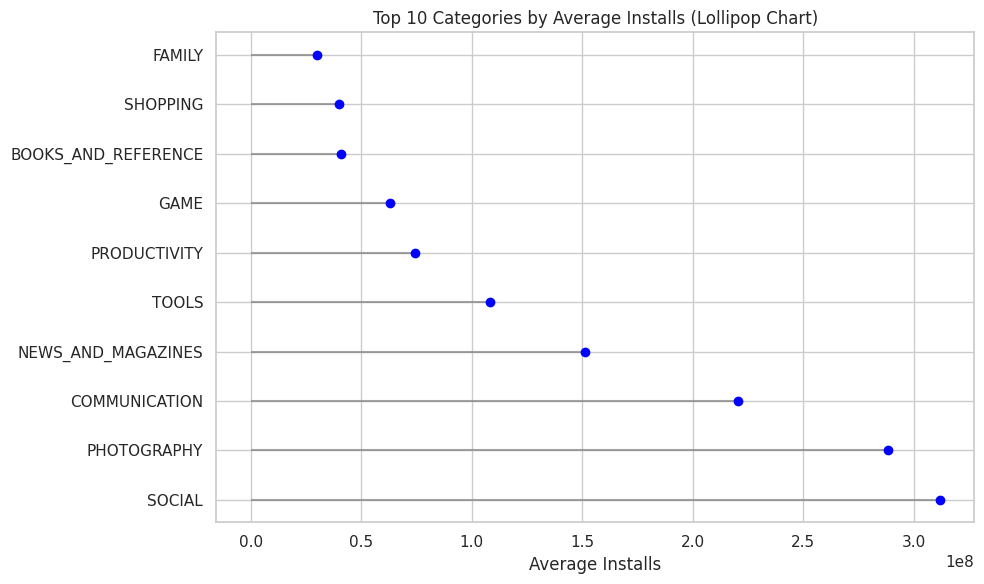

In [492]:
# Step 1: Group the data by 'Category' and calculate the average installs
# - Then sort the values in descending order and select the top 10 categories
top10 = df_merged.groupby('Category')['Installs'].mean().sort_values(ascending=False).head(10)

# Step 2: Set the figure size (10 inches wide by 6 inches tall)
plt.figure(figsize=(10, 6))

# Step 3: Draw horizontal lines (lollipop sticks)
# - y=top10.index → category names on the y-axis
# - xmin=0 → line starts at 0
# - xmax=top10.values → line ends at the average installs value
# - color='gray', alpha=0.7 → light gray lines with some transparency
plt.hlines(y=top10.index, xmin=0, xmax=top10.values, color='gray', alpha=0.7)

# Step 4: Draw the lollipop heads (circles) at the end of each line
# - "o" marker for circle, colored blue
plt.plot(top10.values, top10.index, "o", color='blue')

# Step 5: Add title to the plot
plt.title('Top 10 Categories by Average Installs (Lollipop Chart)')

# Step 6: Label the x-axis
plt.xlabel('Average Installs')

# Step 7: Use tight layout to avoid overlapping labels/titles
plt.tight_layout()

# Step 8: Show the plot
plt.show()

1. Why did you pick the specific chart?

This lollipop chart was chosen because it presents the top 10 app categories based on average installs in a clear and visually appealing way. It simplifies comparison across categories by using horizontal lines and dots to represent install volumes. Unlike bar charts, lollipop charts reduce visual clutter while still conveying ranking and magnitude, making it easy to identify which categories attract the most users on average.

2. What is/are the insight(s) found from the chart?

Key insights from the chart:

- Top categories by average installs:

 SOCIAL, PHOTOGRAPHY, and COMMUNICATION are the top 3 categories, each with 200M–300M+ average installs, indicating extremely high user interest and market saturation.

- Mid-tier performers:

 NEWS_AND_MAGAZINES, TOOLS, and PRODUCTIVITY categories fall in the middle range, with 100M–150M installs, showing strong but more specialized usage.

- Lower among top 10:

 Categories like GAME, BOOKS_AND_REFERENCE, SHOPPING, and FAMILY still make the top 10, but average installs drop to below 100M, suggesting more niche or segmented audiences.

 No entertainment category in top 10: Surprising absence of ENTERTAINMENT category, which is often assumed to be highly downloaded, may suggest it has more variability or fewer high-performing apps.



3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.


Positive Business Impact:
- Target high-install categories: Businesses aiming for maximum reach and visibility should prioritize app development in SOCIAL, PHOTOGRAPHY, or COMMUNICATION categories.

- Market-focused decisions: Marketers can allocate more budget to top categories for advertising and user acquisition since these have larger user bases and higher potential ROI.

- Product expansion: Existing apps in mid-tier categories (e.g., TOOLS, PRODUCTIVITY) could be enhanced with social or communication features to capture more users.

Potential Negative Growth:
- High competition in top categories: Categories like SOCIAL and PHOTOGRAPHY are extremely competitive and saturated, making it difficult for new apps to stand out without heavy investment or innovation.

- Overlooking smaller niches: Solely focusing on top categories may result in neglecting niche markets like EDUCATION, HEALTH, or PARENTING, which could offer loyal users and less competition.

### Multiveriate Analysis

#### Chart - 16 - Pair Plot
 Pairplot (without KDE issue)

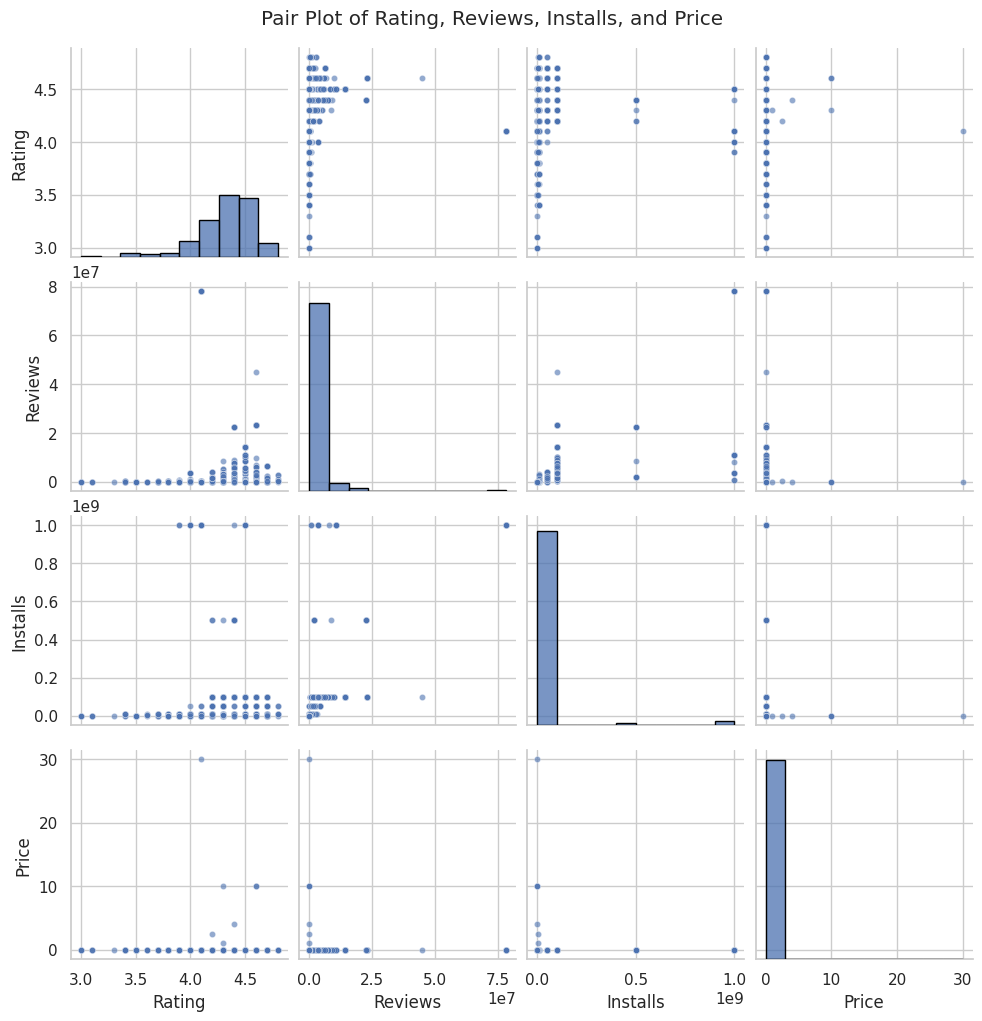

In [493]:
# Select relevant numeric columns from the merged DataFrame for plotting
pairplot_data = df_merged[['Rating', 'Reviews', 'Installs', 'Price']]

# Optional: Take a random sample of 1000 rows to reduce plot clutter and speed up rendering
pairplot_sample = pairplot_data.sample(1000, random_state=42)

# Create a seaborn pairplot to visualize pairwise relationships and distributions
sns.pairplot(
    data=pairplot_sample,
    diag_kind='hist',  # Use histograms on the diagonal instead of KDE plots
    diag_kws={'bins': 10, 'edgecolor': 'black'},  # Use fewer, wider bins with black edges on histograms
    plot_kws={'alpha': 0.6, 's': 20}  # Set transparency and point size for scatter plots
)

# Add a suptitle above the plot with some vertical spacing
plt.suptitle('Pair Plot of Rating, Reviews, Installs, and Price', y=1.02)

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?
Answer Here.
- Pairplot is ideal here because it helps explore relationships between multiple numerical variables at once.

- we have 4 variables — Rating, Reviews, Installs, Price — and pairplot visualizes all pairwise scatterplots plus histograms on the diagonal for distributions.

- It quickly reveals correlations, clusters, and outliers between each pair of variables in one combined plot.

- This makes it easier to spot patterns that might be hidden if variables were plotted separately.



##### 2. What is/are the insight(s) found from the chart?

Answer Here.
- Rating Distribution:
Most apps have ratings clustered between ~3.5 to 5, with a clear concentration near 4-4.5 (from histograms).

- Reviews and Installs Skew:
Reviews and Installs are heavily skewed — many apps have very low installs/reviews, and a few have extremely high numbers (long tail).

- Price Concentration:
Most apps are priced close to zero or very low (price histogram shows most values near 0), with a few outliers charging higher prices.

- Weak Correlations:
There is no strong visible correlation between Rating and Reviews or Installs — some apps have many installs but not necessarily higher ratings.

- Outliers:
A few apps have extremely high Reviews and Installs, which may skew averages or trends.

- Price and Popularity:
Price doesn’t show clear relationship with installs or rating, suggesting free or low-priced apps dominate popularity.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Answer here.

Positive Business Impact:

- Understanding that most apps cluster around certain rating and pricing ranges helps businesses benchmark their products realistically.

- The skew in installs and reviews highlights the importance of app marketing and visibility to move from the long tail of low installs to top installs.

- Pricing insights show that free or low-cost apps dominate, helping businesses decide on pricing strategies to maximize installs.

Insights Leading to Negative Growth:

- The lack of strong correlation between installs/reviews and rating may indicate that high installs don’t always mean high user satisfaction, which could hurt retention and long-term growth.

- Heavy skew and presence of outliers suggest a winner-takes-most market, making it harder for smaller developers to compete, possibly discouraging innovation.

- If businesses misinterpret the data and price their apps too high despite market trends, they risk losing installs and growth opportunities.



#### Chart - 17 - Pair Plot with KDE

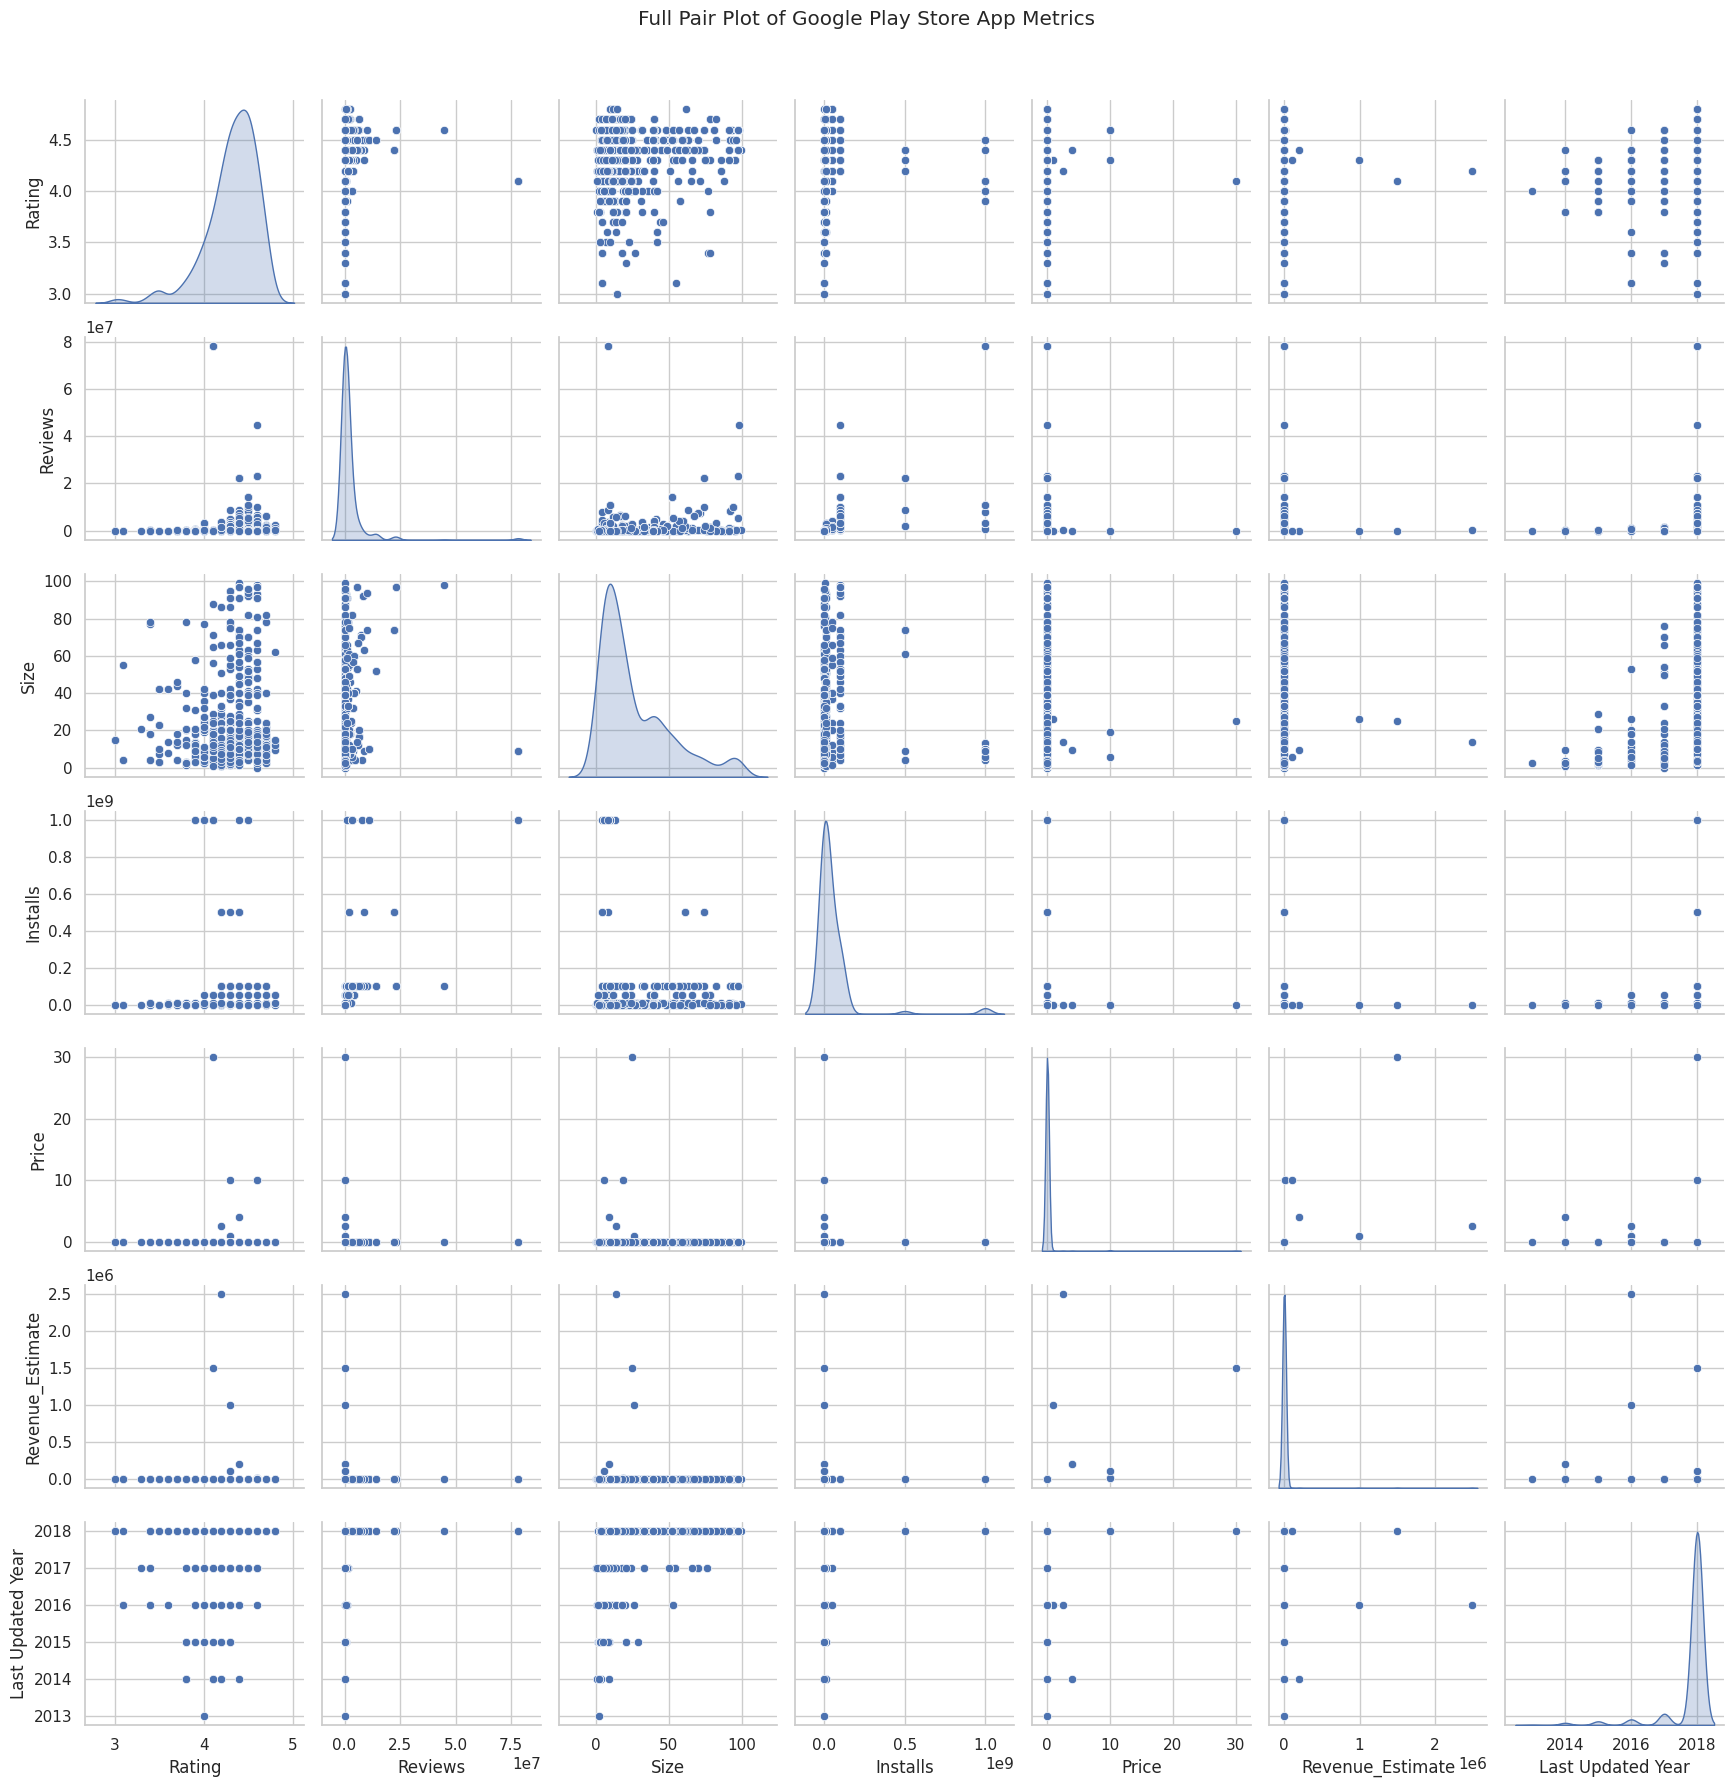

In [494]:
# Select numeric columns from df_merged for the pair plot visualization
pairplot_data = df_merged[['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Revenue_Estimate', 'Last Updated Year']]

# Optionally sample 1000 rows randomly to improve plotting performance and reduce clutter
pairplot_sample = pairplot_data.sample(1000, random_state=42)

# Create a seaborn pairplot showing relationships and distributions for the sampled data
# Use KDE plots on the diagonal to show smooth density estimates of each variable
sns.pairplot(pairplot_sample, diag_kind='kde')  # Full matrix plot (no corner=True)

# Add a main title above the plot, slightly offset vertically for spacing
plt.suptitle('Full Pair Plot of Google Play Store App Metrics', y=1.02)

# Adjust layout to avoid overlapping labels and titles
plt.tight_layout()

# Display the final plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.
- Pairplot is perfect when you want to explore the relationships between multiple numerical variables simultaneously.

- Pairplot helps uncover patterns like:

- Correlations between variables

- Outliers

- Data skewness

- Clustering

##### 2. What is/are the insight(s) found from the chart?



Answer here.

📌 Rating vs Reviews / Installs
Most apps with higher installs or reviews still have clustered ratings between 4.0 and 4.7.

But rating isn't strongly correlated with installs — i.e., high installs ≠ better ratings.

📌 Size vs Installs
App size doesn’t show a strong influence on installs.

Most high-install apps fall under a certain size limit (possibly optimized).

📌 Price vs Revenue_Estimate
Price and revenue are not directly proportional.

Many free or low-price apps still show higher revenue estimates — likely due to ads or in-app purchases.

📌 Revenue_Estimate vs Installs
There seems to be a positive trend: higher installs = higher estimated revenue.

But it’s not strictly linear due to outliers and monetization strategies.

📌 Last Updated Year
Most apps are updated around 2017-2018, which may reflect active apps or updated data cutoff.



3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
- Monetization Strategy Insight:
Free or low-priced apps can still generate high revenue — businesses can focus on install base and engagement rather than just pricing.

- Update Trend Insight:
Keeping apps updated (like most around 2017–2018) may be essential for better performance and ranking — encouraging continuous improvement.

- Data-Driven Design:
Since size doesn’t strongly impact installs, devs can prioritize features over minimizing size, as long as it's reasonable.

Potential Negative Growth Triggers:
- High installs don't guarantee high ratings.
If companies focus only on downloads without improving app experience, it may lead to poor retention and bad reviews.

- Overpriced apps show no strong link to revenue.
Apps priced too high without value could result in low adoption and churn.

- Older un-updated apps (before 2017) seem less visible in recent trends — possibly due to lack of relevance or support.

###Chart- 18 FacetGrid Plot : Rating V/s Price by type and sentiment

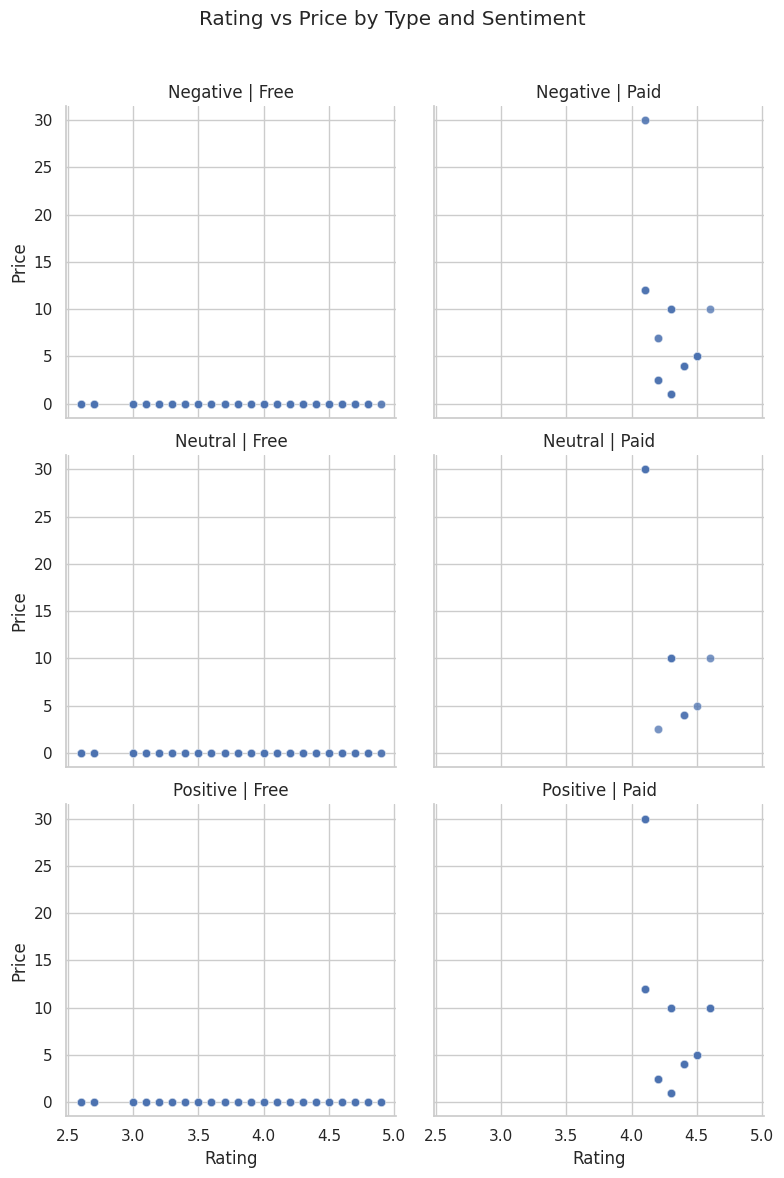

In [495]:
# Create a FacetGrid: one subplot for each combination of 'Type' (Free/Paid) and 'Sentiment' (Positive/Negative/Neutral)
g = sns.FacetGrid(df_merged, col='Type', row='Sentiment', height=4)

# Map a scatterplot onto each subplot in the grid, plotting Rating vs Price
g.map_dataframe(sns.scatterplot, x='Rating', y='Price', alpha=0.5)

# Set individual titles for each subplot using column and row names
g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Adjust space above the subplots to make room for the main title
g.fig.subplots_adjust(top=0.9)

# Set the main title for the entire grid of plots
g.fig.suptitle('Rating vs Price by Type and Sentiment')

# Display the plot
plt.show()


1. Why did you pick the specific chart?

Answer here.
- FacetGrid scatterplot is ideal here because it disaggregates the data across two categorical variables (Type and Sentiment), allowing us to:

  - Compare how Rating and Price interact within subgroups like Free vs Paid apps.

  - See how user sentiment (Negative, Neutral, Positive) affects this relationship.

- Scatterplots reveal continuous relationships and the spread of data points, while facets allow multi-dimensional comparison without clutter.



2. What is/are the insight(s) found from the chart?

Answer Here.
- Most Free apps, regardless of sentiment, are priced at $0 or very close, with low variation in price.

- Paid apps show more variability in price and generally have higher ratings clustered between ~3.5 to 5.0.

- There are few high-priced paid apps, but these tend to have moderate to high ratings.

- Sentiment does not drastically affect Price distribution among Free apps but might slightly correlate with Rating among Paid apps.

- The absence of high-priced Free apps confirms that Free apps monetize differently (ads, in-app purchases) rather than upfront price.



3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.
- Positive business impact:

  - Understanding that Free apps rely on other monetization methods than price helps developers strategize pricing vs revenue models.

  - Seeing that Paid apps tend to have higher ratings and prices suggests that investing in quality paid apps can yield good user satisfaction.

  - Marketing can target pricing strategies based on app type and sentiment to optimize revenue.

- Potential negative growth insights:

  - The lack of variation in Free app pricing means competition might be very high in that segment — businesses relying solely on free apps with no additional revenue streams might struggle.

  - Some Paid apps have relatively low ratings despite high prices, indicating user dissatisfaction that could hurt sales.

  - High-priced Paid apps might face barriers to adoption, especially if the rating is not compelling enough, possibly limiting growth.

###Chart - 19 3D Scatter Plot : Rating, Revenue, Sentiment Polarity

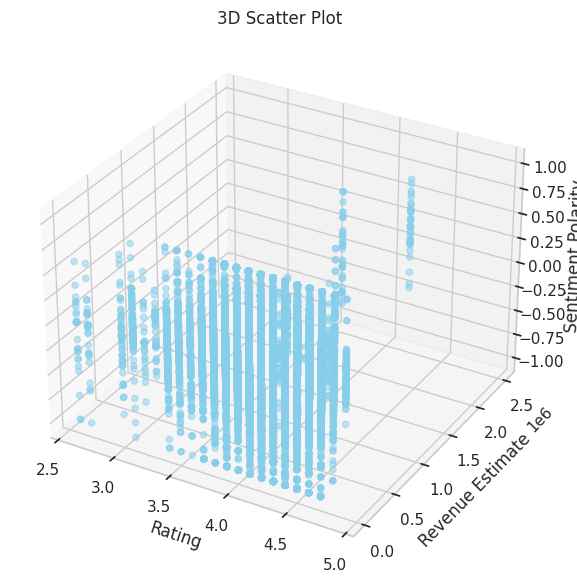

In [496]:
from mpl_toolkits.mplot3d import Axes3D  # Import 3D plotting toolkit

fig = plt.figure(figsize=(10, 7))  # Create a new figure with specified size
ax = fig.add_subplot(111, projection='3d')  # Add a 3D subplot to the figure

# Define data for the three axes from the DataFrame
x = df_merged['Rating']               # X-axis: App Rating
y = df_merged['Revenue_Estimate']    # Y-axis: Revenue Estimate
z = df_merged['Sentiment_Polarity']  # Z-axis: Sentiment Polarity

# Create a 3D scatter plot with skyblue colored points, size 20, and some transparency
ax.scatter(x, y, z, c='skyblue', s=20, alpha=0.5)

# Set axis labels
ax.set_xlabel('Rating')
ax.set_ylabel('Revenue Estimate')
ax.set_zlabel('Sentiment Polarity')

# Set the plot title
plt.title('3D Scatter Plot')

# Display the plot
plt.show()


1. Why did you pick the specific chart?

Answer here.
- A 3D scatter plot is chosen to visualize the interaction among three continuous variables simultaneously:

  - Rating (x-axis)

  - Revenue Estimate (y-axis)

  - Sentiment Polarity (z-axis)

- It helps to uncover possible relationships or clusters that may not be obvious in 2D plots.

- This chart is useful to see how app quality (Rating) and user sentiment together relate to the potential revenue.



2. What is/are the insight(s) found from the chart?

Answer Here.
- Most apps have Ratings clustered between 3.0 and 4.5, showing the majority fall in moderate-to-high quality.

- Revenue Estimate varies widely, with many apps showing low or zero revenue, but some apps generate very high revenue (outliers).

- Sentiment Polarity mostly centers around neutral (close to 0), with fewer apps showing extreme positive or negative sentiment.

- Apps with higher revenue tend to have higher Ratings and slightly positive Sentiment, suggesting a correlation between quality, user sentiment, and monetization.

- There are apps with low revenue despite decent ratings, implying that other factors may limit revenue (e.g., app category, marketing).

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Answer here.
- Positive business impact:

  - Recognizing that higher ratings and positive sentiment correlate with higher revenue helps developers prioritize improving app quality and user experience.

  - Investment in sentiment analysis can be used to predict revenue potential and focus on apps or updates that improve user satisfaction.

  - Identifying clusters of apps with high revenue and good ratings can help with benchmarking and strategy formation.

- Potential negative growth insights:

   - The large number of apps with low revenue despite moderate-to-good ratings suggests a monetization challenge, highlighting apps that may not be effectively converting users into paying customers.

   - Neutral sentiment dominance indicates many apps lack strong emotional engagement, which might reduce user loyalty and limit growth.

   - Revenue outliers might skew focus, masking the fact that most apps earn very little, which could imply market saturation or ineffective marketing

Chart - 20 Correlation Heatmap

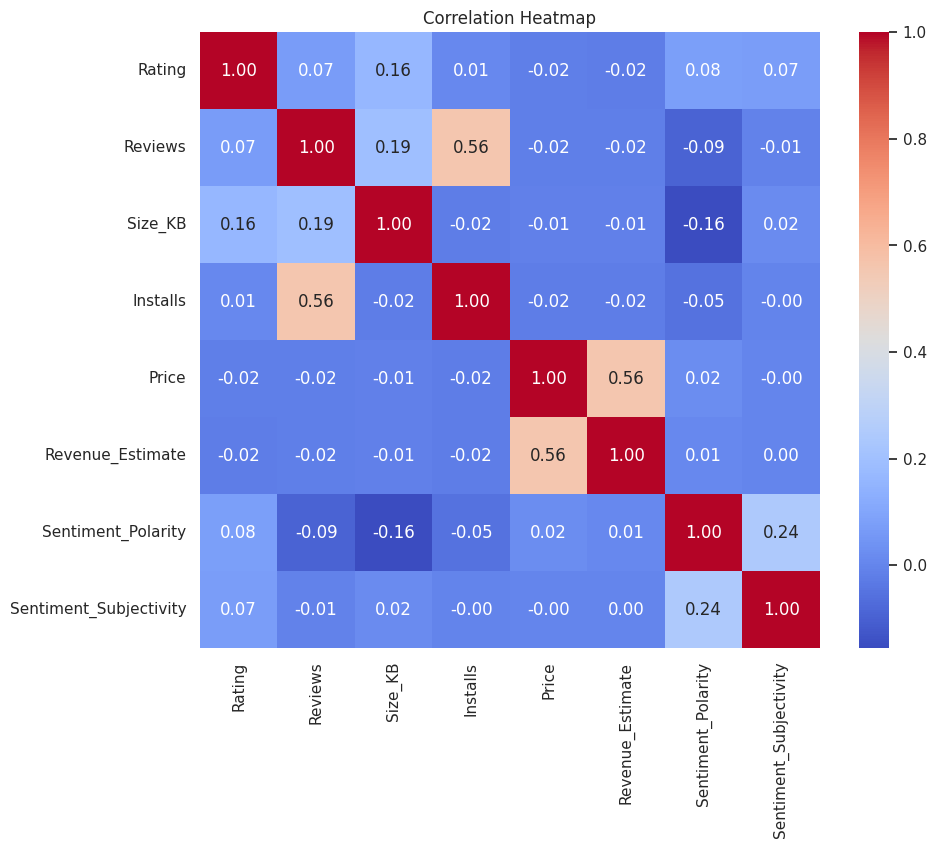

In [497]:
# List of numeric columns to include in the correlation matrix
numeric_cols = ['Rating', 'Reviews', 'Size_KB', 'Installs', 'Price',
                'Revenue_Estimate', 'Sentiment_Polarity', 'Sentiment_Subjectivity']

# Set the figure size to make the heatmap readable
plt.figure(figsize=(10, 8))

# Calculate the correlation matrix for the selected numeric columns and plot as a heatmap
# annot=True adds the correlation coefficient numbers on the heatmap
# cmap='coolwarm' sets the color theme, fmt=".2f" formats numbers to 2 decimal places
sns.heatmap(df_merged[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Add a title to the plot
plt.title("Correlation Heatmap")

# Display the plot
plt.show()


1. Why did you pick the specific chart?

- A correlation heatmap is the best choice when you want to:

- Understand linear relationships between multiple numeric variables.

- Identify patterns, clusters, or potential multicollinearity.

- This chart summarizes complex relationships in a compact, easy-to-read format using color gradients and correlation coefficients.


2. What is/are the insight(s) found from the chart?

🔸 Strongest positive correlation is between:

  - Installs and Reviews (0.56) → More installs typically lead to more user reviews.

  - Price and Revenue_Estimate (0.56) → Higher-priced apps tend to generate more revenue (makes sense for paid apps).

🔹 Weak or no correlation:

  - Rating has almost no correlation with Revenue_Estimate, Price, or Installs — suggests that user satisfaction doesn't directly drive revenue.

  - Sentiment_Polarity and Rating show slightly positive correlation (0.08) → Weak alignment between user sentiment and actual ratings.

🔻 Sentiment_Polarity has a negative correlation with Reviews (-0.09) → More reviewed apps tend to have mixed or less positive sentiments, possibly due to high expectations or broader audience feedback.

  - Most other relationships are very weak (< 0.2) — indicating independence or non-linear relations.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

- Positive business impact:
Developers and product managers can:

  - Focus marketing on driving installs and reviews, as they are closely tied.

  - Use the insight that pricing affects revenue more than rating, to strategically price paid apps.

  - Avoid assuming that high ratings alone will increase revenue — monetization strategy matters more.

  - Understand that sentiment analysis provides complementary insight not captured by star ratings alone.

- Potential negative growth insight:
Businesses relying solely on boosting app ratings to drive revenue may not see returns — the correlation is too weak.

  - If high installs attract negative or neutral sentiment (as implied by -0.09 correlation), it could damage brand perception in the long run unless user experience is continuously improved.



# Problem Statements

##What are the Top 10 Most downloaded APPs  (Horizontal Bar plot)?


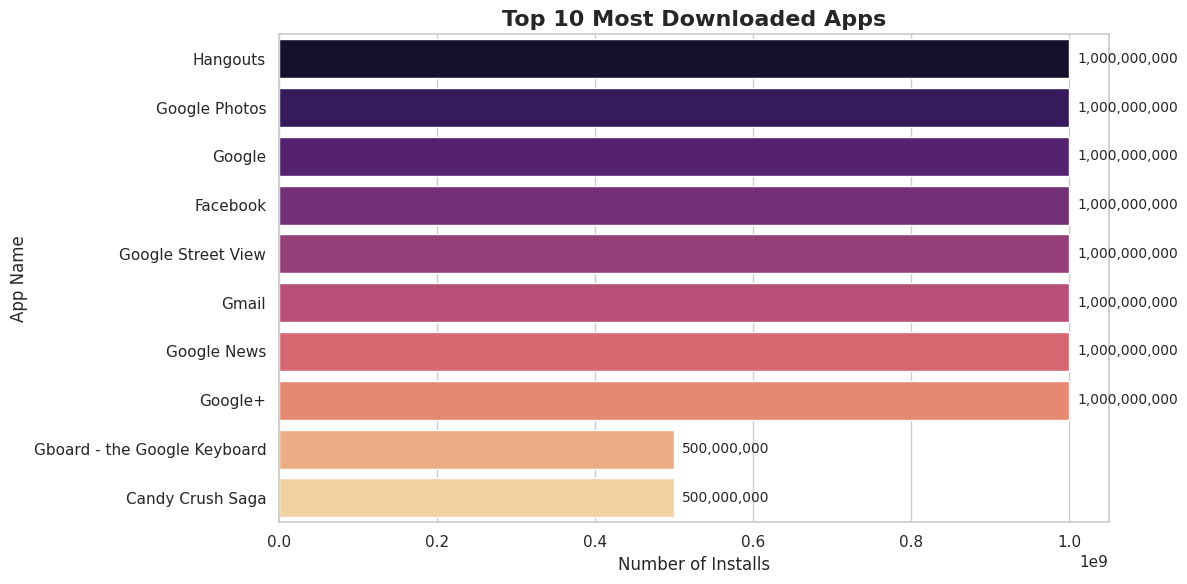

In [498]:
# Step 1: Get top 10 apps by installs
top_downloaded_apps = df_merged[['App', 'Installs']].sort_values(by='Installs', ascending=False).drop_duplicates('App').head(10)

# Step 2: Set the visual style
sns.set_style("whitegrid")

# Step 3: Plot horizontal bar chart with a colorful palette
plt.figure(figsize=(12, 6))
bars = sns.barplot(data=top_downloaded_apps, y='App', x='Installs', palette='magma')

# Step 4: Add value labels on bars
for bar in bars.patches:
    width = bar.get_width()
    plt.text(width + max(top_downloaded_apps['Installs']) * 0.01,  # small offset to the right
             bar.get_y() + bar.get_height() / 2,
             f'{int(width):,}',  # format with commas
             va='center',
             fontsize=10)

# Step 5: Add titles and labels
plt.title('Top 10 Most Downloaded Apps', fontsize=16, fontweight='bold')
plt.xlabel('Number of Installs')
plt.ylabel('App Name')
plt.tight_layout()

# Step 6: Show the plot
plt.show()

1. Why did you pick the specific chart?

- A horizontal bar chart was selected because:

  - App names are long and easier to read horizontally.

  - It clearly displays ranking by download volume, which is essential in identifying top performers.

  - Seaborn’s color palette makes it easy to distinguish between the bars visually.

- This chart is excellent for comparing quantities across categories — in this case, Installs per App.

2. What is/are the insight(s) found from the chart?

Answer here.
- All the top 9 apps (except Candy Crush Saga) are owned by Google or Facebook, indicating market dominance by tech giants.

- The top apps (like Google, Facebook, Gmail, Hangouts) have close to 1 billion installs, signifying extremely high user adoption.

- Candy Crush Saga is the only non-core utility or entertainment app in the top 10 — showing exceptional performance for a game.

- These apps likely come pre-installed on Android devices, contributing to their massive install counts.

 3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Answer here.
- Positive Business Impact:
  - Developers & marketers can target:

   - Integrations or advertising inside these dominant apps.

   - Categories like communication, utility, and camera/photos that attract billions of users.

  - Understanding that pre-installed or default apps dominate installs can help businesses shift strategy to build companion or enhancement apps for them.
  
- Potential Negative Growth Insight:
   - Smaller developers might find it challenging to compete in saturated categories (e.g., social, communication).

  - Overreliance on installs as a success metric can be misleading — engagement and monetization matter more for long-term growth.

  - If a developer is trying to enter a market already occupied by the top 10, they may need niche differentiation or risk stagnation.

## What are the Top 10 Categories Based on average ratings?

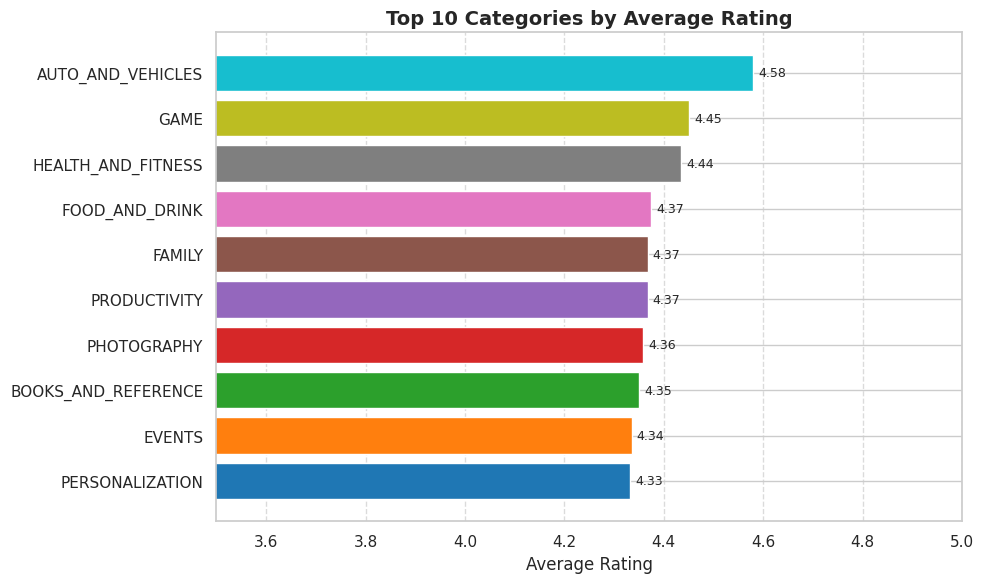

In [499]:
# Step 1: Calculate average rating per category
avg_ratings = df_merged.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

# Step 2: Define a bright color palette (you can customize this)
colors = plt.cm.tab10(np.linspace(0, 1, 10))  # 10 distinct colors

# Step 3: Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(avg_ratings.index[::-1], avg_ratings.values[::-1], color=colors)

# Step 4: Add value labels to bars
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}", va='center', fontsize=9)

# Step 5: Set titles and axes
plt.title('Top 10 Categories by Average Rating', fontsize=14, fontweight='bold')
plt.xlabel('Average Rating')
plt.xlim(3.5, 5.0)  # Zoom in on rating scale for clarity
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


1. Why did you pick the specific chart?

Answer Here.
Ichose this horizontal bar chart because:

- It visually ranks categories by average rating, making it easy to compare performance.

- Ratings are quantitative and continuous, so a bar chart offers clear insight into the differences.

- It directly aligns with a common business KPI: user satisfaction.

- Horizontal layout helps accommodate long category names, improving readability.

- This chart effectively highlights which categories are consistently delivering a good user experience, which is crucial for product decisions.

2. What is/are the insight(s) found from the chart?

- Auto & Vehicles apps have the highest average rating (4.58), suggesting strong niche user satisfaction.

- Other categories like Game, Health & Fitness, and Productivity also maintain high ratings (>4.3), indicating broad user approval.

- The ratings range is narrow (4.33–4.58), meaning all these categories perform well, with minimal dissatisfaction.

- Categories tied to lifestyle and daily use tend to be rated higher (Health, Food, Productivity), possibly due to personal relevance.



3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Business Impact:
  - Developers and businesses can prioritize high-rated categories like Auto & Vehicles or Health & Fitness, which have greater user satisfaction and retention potential.

  - If a company is deciding between launching a Food & Drink app vs. a Social app, this insight gives them a data-driven head start.

  - App store optimization teams can use this to understand user expectations by category and tailor their app features accordingly.

- Potential Negative Growth Insight (Risk Area):
Categories not in the top 10 (e.g., Social, Entertainment, or Communication) may have lower average ratings, possibly due to:

  - Higher user expectations

  - Frequent bugs or privacy concerns

  - Competitive saturation

 - If a business is heavily invested in a low-rated category, this insight may signal a need for product refinement, feature redesign, or support enhancement.

## What are the Total Number of Installs based on each year?

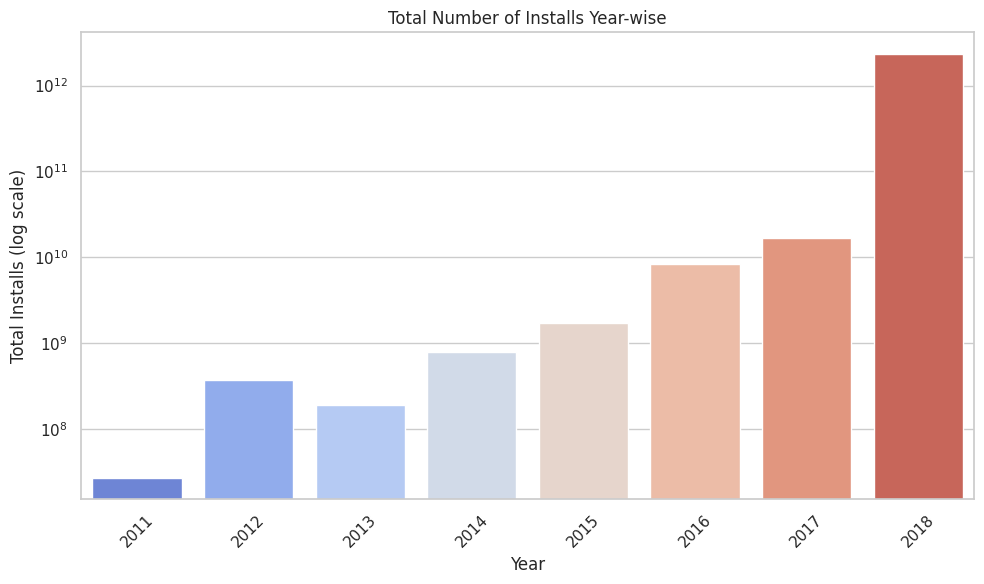

In [500]:
# Group installs by 'Last Updated Year' and sum
installs_per_year = df_merged.groupby('Last Updated Year')['Installs'].sum().sort_index()

# Set the figure size
plt.figure(figsize=(10,6))

# Create a barplot for total installs per year with a color palette
sns.barplot(x=installs_per_year.index, y=installs_per_year.values, palette='coolwarm')

# Set the plot title and axis labels
plt.title('Total Number of Installs Year-wise')
plt.xlabel('Year')
plt.ylabel('Total Installs (log scale)')

# Apply logarithmic scale to y-axis to better visualize the wide range of installs
plt.yscale('log')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping of labels/titles
plt.tight_layout()

# Show the plot
plt.show()


1. Why did you pick the specific chart?


- The vertical bar chart is ideal for this data because:

- It shows growth trends over time, clearly reflecting year-by-year comparisons.

- The log scale on the y-axis effectively handles the large range of install values, which span from millions to trillions.

- It’s excellent for visualizing exponential growth, which would be hard to spot on a linear scale.

- The chart makes it easy to communicate how app installations have scaled massively over the years.

2. What is/are the insight(s) found from the chart?

- here’s a clear upward trend in installs from 2011 to 2018.

- The most dramatic increase occurred between 2017 and 2018, indicating possibly a major surge in smartphone users, internet access, or app usage behavior.

- Early years (2011–2013) had much lower install counts, highlighting the infancy stage of the app ecosystem.

- The install base grew steadily, suggesting increasing reliance on mobile apps year after year.



3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
- The strong year-on-year growth confirms that investing in mobile apps was (and still is) a smart strategy.

- Businesses can use this trend to justify continued or increased investment in mobile app development, marketing, or updates.

- The massive growth in 2018 may suggest a peak in user acquisition, encouraging companies to capitalize on a large, active user base.

No Immediate Negative Growth Insight:
- The chart does not show any decline, so there’s no current sign of negative momentum.

## What is the Average Ratings for top 10 Individual Genres?

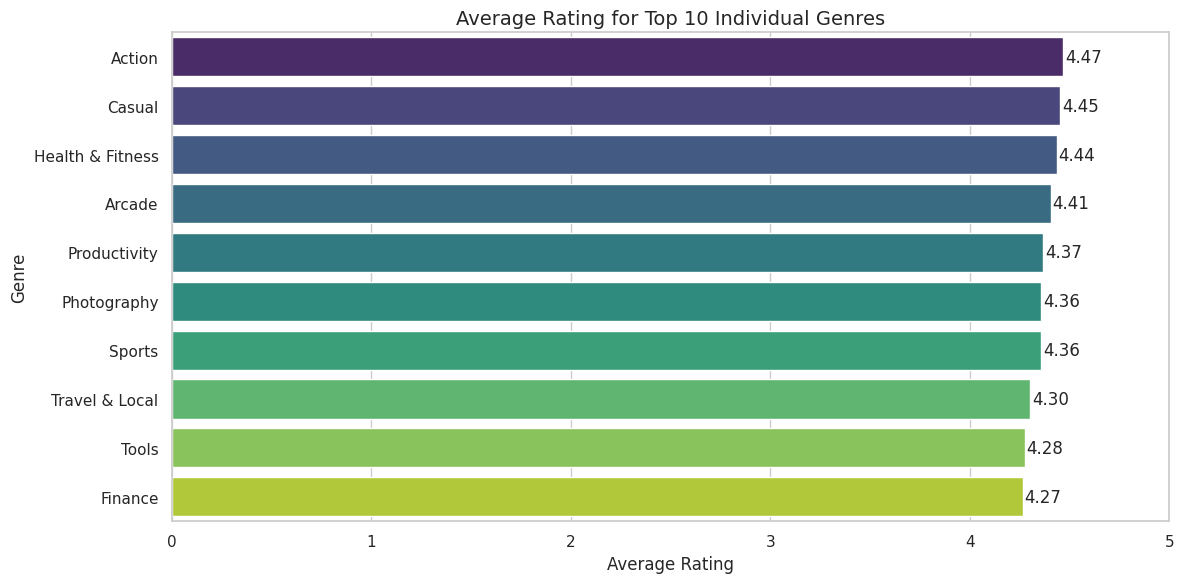

In [501]:
# Step 1: Expand the 'Genres' column from df_merged
df_expanded = df_merged.copy()
df_expanded = df_expanded.assign(Genres=df_expanded['Genres'].str.split(',')).explode('Genres')
df_expanded['Genres'] = df_expanded['Genres'].str.strip()  # Remove any leading/trailing whitespace

# Step 2: Get the top 10 most frequent genres
top_genres = df_expanded['Genres'].value_counts().head(10).index.tolist()

# Step 3: Filter to top genres and calculate average rating
avg_rating_per_genre = df_expanded[df_expanded['Genres'].isin(top_genres)] \
                        .groupby('Genres')['Rating'].mean() \
                        .sort_values(ascending=False)

# Step 4: Plot horizontal bar chart
plt.figure(figsize=(12, 6))  # Set figure size for readability
sns.set_style("whitegrid")
sns.barplot(x=avg_rating_per_genre.values,
            y=avg_rating_per_genre.index,
            palette='viridis')

# Step 5: Add titles and axis labels
plt.title('Average Rating for Top 10 Individual Genres', fontsize=14)
plt.xlabel('Average Rating')
plt.ylabel('Genre')

# Step 6: Set x-axis limits for clarity
plt.xlim(0, 5)

# Step 7: Add data labels on the bars
for index, value in enumerate(avg_rating_per_genre.values):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center')

# Step 8: Adjust layout and show plot
plt.tight_layout()
plt.show()


1. Why did you pick the specific chart?

The horizontal bar chart was chosen because:
- Genre names can be long, and horizontal layout prevents label overlap, improving readability.

- It’s ideal for comparing values across categories, in this case, average ratings across genres.

- The rating values are close in range (from 4.27 to 4.47), and horizontal bars clearly show even small differences.

- The color gradient (via viridis palette) adds visual appeal and helps highlight higher or lower values quickly.

2. What is/are the insight(s) found from the chart?

-Action, Casual, and Health & Fitness apps have the highest average ratings among the top 10 most frequent genres.

- All genres have consistently high average ratings (above 4.25), showing generally strong user satisfaction across genres.

- Productivity, Photography, and Sports are mid-tier but still perform well in terms of user ratings.

- Finance and Tools are at the lower end of average ratings among the top 10, though still above 4.2 — not poor, but may indicate areas for user experience improvement.



3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
- Target high-rated genres like Action, Casual, and Health & Fitness for app development or marketing to leverage high user satisfaction.

- Use genres with strong user ratings for retention-focused features and word-of-mouth promotion.

- High-performing genres may also justify premium features or monetization due to strong user trust.

Potential Risk / Negative Growth:
- Rating alone doesn't reflect install volume or market demand. For example, Finance apps may have lower ratings but serve essential purposes and still have large install bases.

- Over-investing in a genre just because it has high ratings (e.g., Action) without understanding its market saturation or competition can lead to inefficient resource allocation.

- User expectations may differ by genre — what’s considered “good” in Casual games may not apply to Tools or Finance apps.



##What is the Average App ratings based on each year?

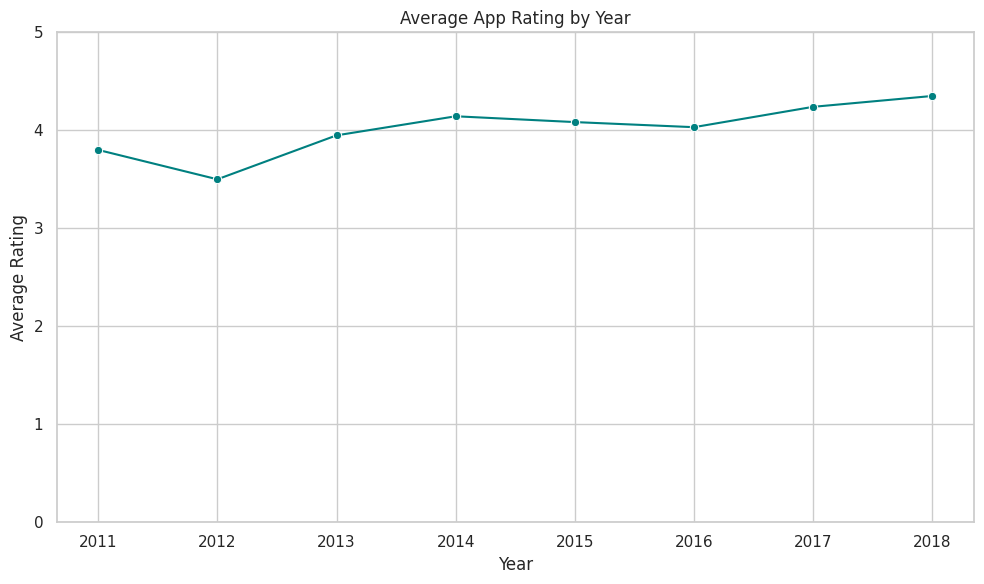

In [502]:
# Step 1: Calculate the average rating per year
# Group by 'Last Updated Year' and take the mean of 'Rating'
avg_rating_per_year = df_merged.groupby('Last Updated Year')['Rating'].mean().sort_index()

# Step 2: Set up the figure size for better visibility
plt.figure(figsize=(10, 6))

# Step 3: Plot a line plot to visualize trends over time
sns.lineplot(
    x=avg_rating_per_year.index,       # Year on x-axis
    y=avg_rating_per_year.values,      # Average Rating on y-axis
    marker='o',                        # Show data points as dots
    color='teal'                       # Choose a line color
)

# Step 4: Add chart title and labels
plt.title('Average App Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')

# Step 5: Set y-axis limits to match the 0-5 rating scale
plt.ylim(0, 5)

# Step 6: Add a grid for easier reading
plt.grid(True)

# Step 7: Adjust layout to avoid cutting off labels
plt.tight_layout()

# Step 8: Show the plot
plt.show()



1. Why did you pick the specific chart?

- A line plot was chosen because it effectively visualizes trends over time. Since we are analyzing average app ratings year by year, this chart helps track how user satisfaction (measured by ratings) evolved across years. The markers (●) make it easier to identify rating values for each year individually.


2. What is/are the insight(s) found from the chart?

- Upward Trend: The average rating has generally increased from 2012 to 2018, indicating improvement in app quality, user experience, or engagement strategies.

- Lowest Point in 2012: There was a dip in 2012, where average ratings were the lowest in the timeline.

- Consistent Improvement Post-2013: From 2013 onwards, ratings have been mostly above 4.0, peaking in 2018.

3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.

Positive Business Impact:

- The trend shows that users are increasingly satisfied with apps over time. Businesses can leverage this to:

- Promote newer versions or features.

- Emphasize improvements in marketing campaigns.

- The consistent increase in rating might encourage developers and investors to trust the platform.

Potential Concern:

- The dip in 2012 may indicate a period of lower app quality or user dissatisfaction. This can serve as a learning point for avoiding such slumps in the future.

Strategic Takeaway:
Focus on analyzing what worked well post-2013 and continue building on that—whether it was better UX design, performance optimization, or listening to user feedback.

## What is the total Installs each corresponding year?

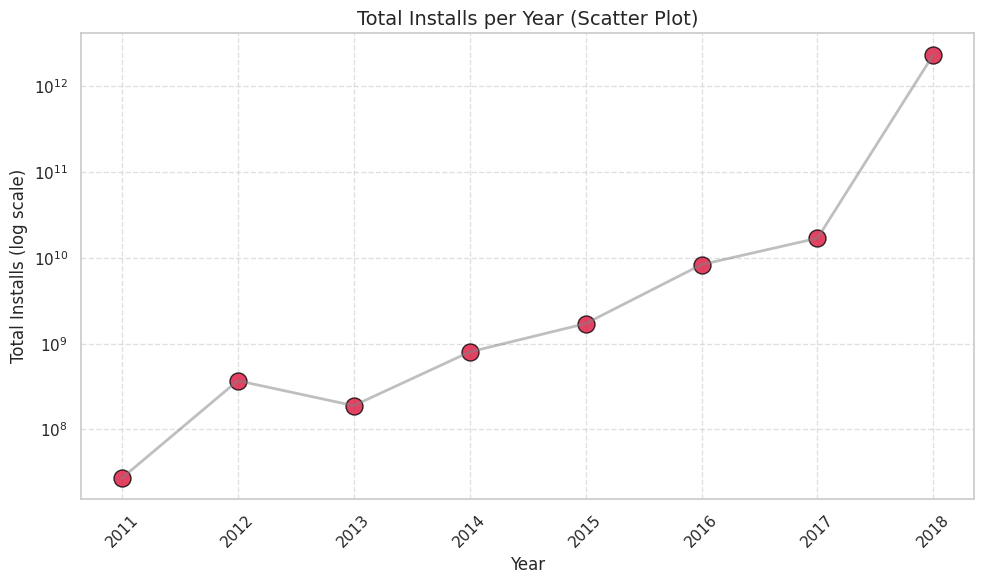

In [503]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group installs by year and sum them
installs_per_year = df_merged.groupby('Last Updated Year')['Installs'].sum().sort_index()

# Step 2: Plot scatter chart
plt.figure(figsize=(10, 6))
sns.scatterplot(x=installs_per_year.index,
                y=installs_per_year.values,
                s=150,                  # Size of markers
                color='crimson',
                edgecolor='black',
                alpha=0.8)

# Step 3: Add a smooth trend line (optional)
sns.lineplot(x=installs_per_year.index,
             y=installs_per_year.values,
             color='grey',
             linewidth=2,
             alpha=0.5)

# Step 4: Customize chart
plt.yscale('log')  # Optional: Use if values are skewed
plt.title('Total Installs per Year (Scatter Plot)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Installs (log scale)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Step 5: Show plot
plt.show()


1. Why did you pick the specific chart?

- A scatter plot with a connecting line was chosen because:

- It clearly shows the trend of installs over time while making each year’s volume visually distinct with individual points.

- The log scale on the Y-axis helps handle the huge differences in install counts (from millions to trillions) without flattening the chart.

- This format balances both discrete yearly observations (scatter points) and the continuous growth pattern (line connection).



 2. What is/are the insight(s) found from the chart?


- There has been an exponential increase in total installs, especially from 2016 onward.

- 2018 saw a dramatic spike compared to previous years—install counts jumped by an order of magnitude.

- After 2013, there was steady growth, with no major drops, reflecting growing smartphone adoption and app usage.


3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.

Positive Business Impact:

- The massive growth in installs confirms a rapidly expanding user base, which is highly valuable for:

- App developers planning to scale.

- Marketers targeting larger audiences.

- Investors evaluating platform maturity.

- It validates continued investment in app ecosystem improvements.

Potential Risks / Negative Growth:

- No clear evidence of negative growth here, but the steep increase in 2018 could potentially:

- Mask underlying issues with install quality (e.g., spam installs or bots).

- Lead to higher competition for visibility in the app store.

##What are the top 6 Categories based on total reviews?

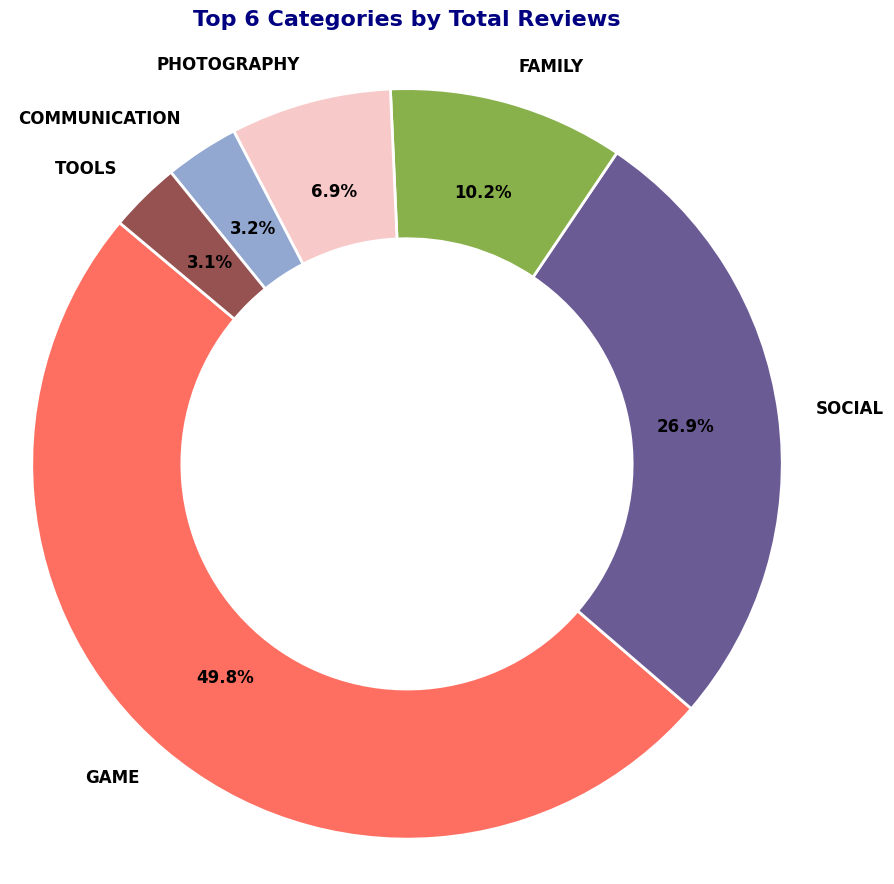

In [504]:
# Prepare data
top_reviews = df_merged.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(6)

# Values and labels
values = top_reviews.values
labels = top_reviews.index

# Custom vibrant colors (you can replace or extend this list)
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251']

# Plot pie chart
fig, ax = plt.subplots(figsize=(9, 9), facecolor='white')

wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops=dict(color="black", fontsize=12, weight='bold'),
    wedgeprops=dict(width=0.4, edgecolor='white', linewidth=2),
    pctdistance=0.75
)

# Add circle in the center to make it a donut
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
ax.add_artist(centre_circle)

# Add title
plt.title('Top 6 Categories by Total Reviews', fontsize=16, fontweight='bold', color='navy', pad=20)

# Style: remove axes
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show plot
plt.tight_layout()
plt.show()


1. Why did you pick the specific chart?

I chose a donut chart (a pie chart with a center cut-out) because:

- It visually emphasizes relative proportions of total reviews across categories.

- The circular form is intuitive for showing parts of a whole, making it easy to see which categories dominate.

- The center hole improves readability and creates a clean, modern look.

2. What is/are the insight(s) found from the chart?

- Game apps have an overwhelmingly large share of reviews (49.8%), showing they drive most user engagement and feedback.

- Social apps are second (26.9%), also capturing significant attention.

- Other categories (Family, Photography, Communication, Tools) have much smaller shares—each below ~10%.

- The market is heavily skewed toward a few high-engagement categories.


3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

- The insights show where user engagement is highest, helping businesses:

- Prioritize marketing and development budgets toward Games and Social apps.

- Tailor content strategies to categories with the most vocal audiences.

- For new entrants, this signals where demand and visibility are strongest.

Potential Risks / Negative Growth:

- The dominance of Game and Social categories may create over-saturation, making it harder for new apps to stand out.

- Other categories with low review shares could be underexplored opportunities—or may reflect lower user interest.

Strategic Takeaway:

- If you’re aiming for broad user engagement, investing in Games or Social apps is likely to deliver higher returns.

- If you want less competition, exploring niche categories (e.g., Tools or Photography) might offer growth potential with the right product-market fit.



## What are the number of apps based on different size buckets?

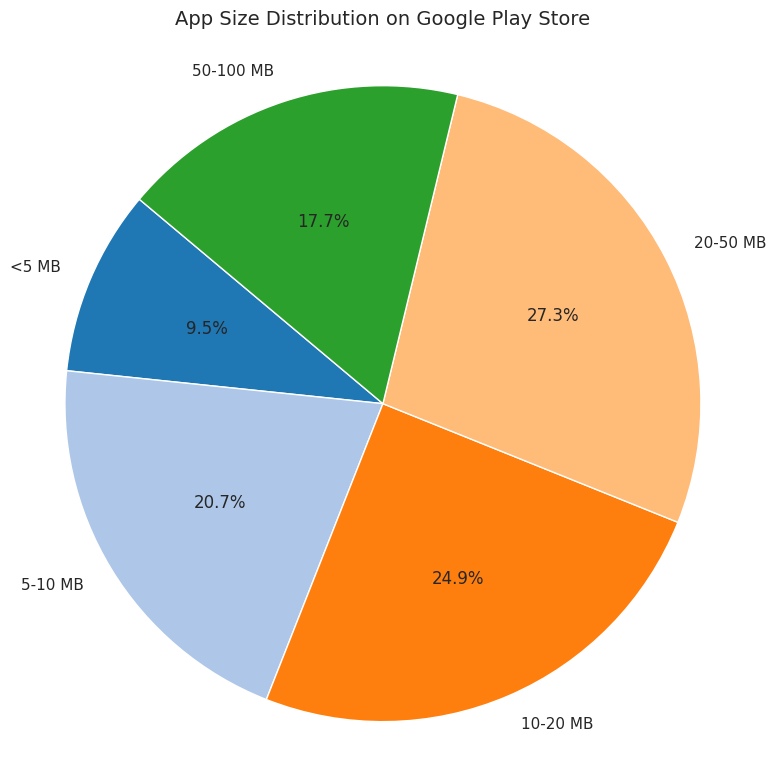

In [505]:
# Define bins (you can adjust these ranges)
bins = [0, 5000, 10000, 20000, 50000, 100000]
labels = ['<5 MB', '5-10 MB', '10-20 MB', '20-50 MB', '50-100 MB']

# Categorize the sizes
df_merged['Size_Bucket'] = pd.cut(df_merged['Size_KB'], bins=bins, labels=labels)

# Count how many apps fall into each bucket
size_distribution = df_merged['Size_Bucket'].value_counts().sort_index()

# Generate distinct colors from a colormap
colors = plt.cm.tab20.colors  # You can also try: 'Set3', 'Accent', 'tab10', etc.

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    size_distribution.values,
    labels=size_distribution.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors[:len(size_distribution)],  # Limit to number of buckets
    wedgeprops={'edgecolor': 'white'}
)

# Add a title
plt.title('App Size Distribution on Google Play Store', fontsize=14)

# Make it a perfect circle
plt.axis('equal')

plt.tight_layout()
plt.show()


1. Why did you pick the specific chart?

- A pie chart is chosen because it clearly shows the proportion of apps falling into different size categories.

- It helps to visualize how the app sizes are distributed as parts of a whole, making it easy to compare relative frequencies.

- The percentage labels on each slice make it straightforward to understand the share each size bucket holds.

2. What is/are the insight(s) found from the chart?

- The largest share of apps (27.3%) are sized between 20-50 MB, indicating that most apps are moderately sized.

- The next biggest groups are 10-20 MB (24.9%) and 5-10 MB (20.7%), showing a big concentration of apps under 50 MB.

- Very small apps (<5 MB) are relatively fewer (9.5%), and larger apps (50-100 MB) make up about 17.7%.

- This suggests developers generally aim to keep app sizes manageable, possibly to appeal to users with limited storage.

3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

- Knowing most apps fall under 50 MB can guide developers to optimize app sizes to fit within popular ranges, improving user adoption and downloads.

- Smaller app sizes often mean faster downloads and less storage usage, which is appealing to many users, especially in markets with limited bandwidth or device storage.

Potential Negative Growth:

- Apps larger than 50 MB are fewer, possibly indicating user hesitation towards large apps or storage constraints.

- If an app requires a large size, it may face lower install rates due to user reluctance, potentially limiting growth.

Strategic Takeaway:

- Aim to keep app size under 50 MB to maximize accessibility and downloads.

- Consider lightweight or modular app designs to attract users with limited device storage or slower internet

##How does user sentiment impact revenue across different app categories?

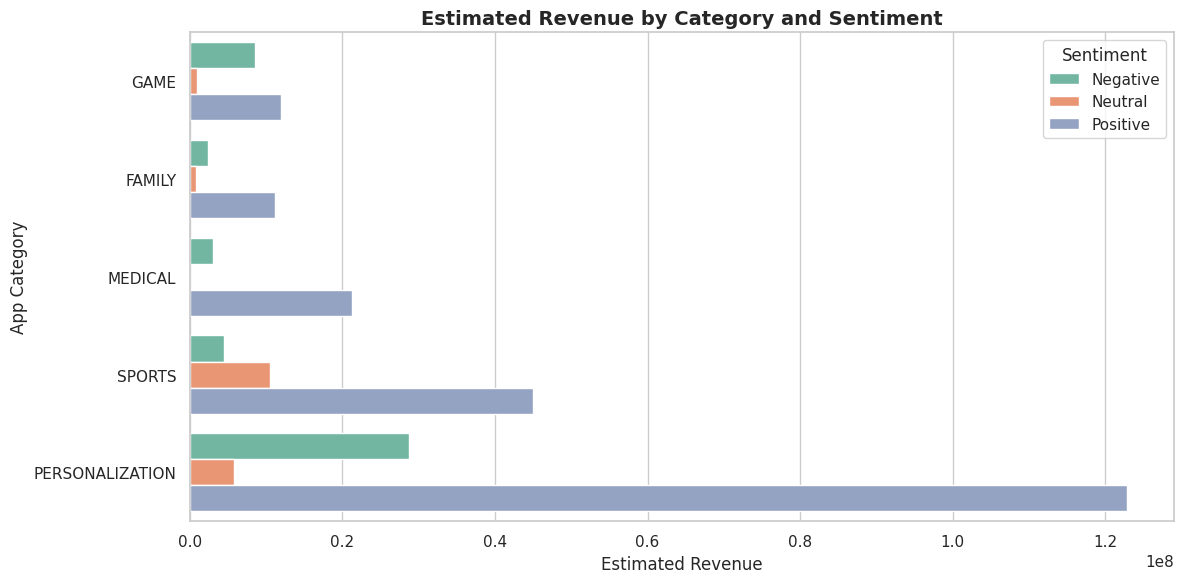

In [506]:
# Filter the DataFrame to include only rows where:
# - Revenue_Estimate is greater than 0
# - Sentiment is not null (exists)
# - Category is not null (exists)
filtered_df = df_merged[
    (df_merged['Revenue_Estimate'] > 0) &
    (df_merged['Sentiment'].notnull()) &
    (df_merged['Category'].notnull())
]

# Create a figure for the plot with size 12x6 inches
plt.figure(figsize=(12, 6))

# Generate a barplot showing the sum of Estimated Revenue by App Category,
# with bars grouped and colored by Sentiment
sns.barplot(
    data=filtered_df,
    x='Revenue_Estimate',
    y='Category',
    hue='Sentiment',
    estimator=sum,   # Aggregate revenue by summing within each category-sentiment group
    ci=None,         # Do not display confidence intervals
    palette='Set2'   # Use the 'Set2' color palette for distinct hues
)

# Set the plot title with font size 14 and bold weight
plt.title('Estimated Revenue by Category and Sentiment', fontsize=14, fontweight='bold')

# Label x-axis as 'Estimated Revenue'
plt.xlabel('Estimated Revenue')

# Label y-axis as 'App Category'
plt.ylabel('App Category')

# Display the legend with the title 'Sentiment'
plt.legend(title='Sentiment')

# Adjust layout to avoid overlap of labels and titles
plt.tight_layout()

# Display the plot
plt.show()


1. Why did you pick the specific chart?

This horizontal bar chart grouped by sentiment was chosen because:

- It visually breaks down estimated revenue across app categories.

- It shows how different sentiment types (Positive, Neutral, Negative) influence revenue within each category.

- Grouping by sentiment adds deeper insight into user experience and its financial impact.

2. What is/are the insight(s) found from the chart?

- Positive sentiment strongly correlates with higher estimated revenue in most categories.

- The "Personalization" category stands out as the top revenue generator, particularly with positive sentiment.

- Sports and Medical also show notable revenue under positive sentiment.

- Neutral and negative sentiment contribute relatively little to overall revenue in all categories.


3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons:

Positive business impact:

- Businesses can focus on improving user sentiment, especially in high-revenue categories like Personalization and Sports to further increase revenue.

- Emphasizing positive review generation strategies (like better UX, customer support) can directly boost monetization.

Potential risks / Negative insights:

- Categories with higher revenue potential but poor sentiment (if any) may suffer from churn or missed growth.

- For example, if a category like Game is underperforming in revenue despite popularity, poor user sentiment might be the blocker — signaling a need to address user complaints or feature gaps.

##What is the Impact of user sentiments on ratings?

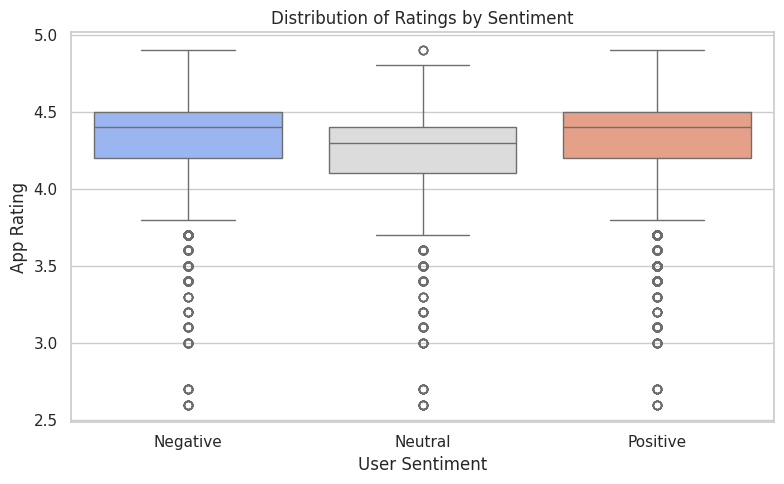

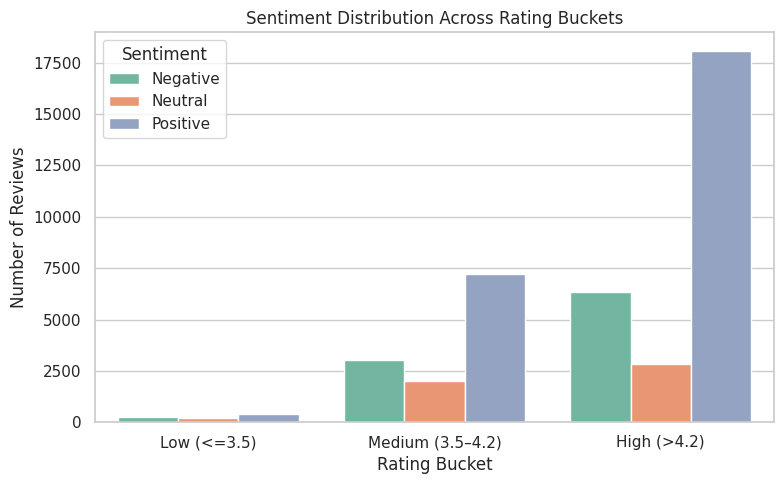

In [507]:
# Create categorical rating buckets to classify apps into 'Low', 'Medium', and 'High' rating groups
df_merged['Rating_Bucket'] = pd.cut(
    df_merged['Rating'],
    bins=[0, 3.5, 4.2, 5.0],                  # Define the edges of the buckets
    labels=['Low (<=3.5)', 'Medium (3.5–4.2)', 'High (>4.2)']  # Label each bucket
)

# Set seaborn plot style to whitegrid for better readability
sns.set(style="whitegrid")

# ----- Plot 1: Boxplot showing distribution of app ratings by user sentiment -----
plt.figure(figsize=(8, 5))  # Set figure size
sns.boxplot(
    data=df_merged,
    x='Sentiment',           # X-axis: User Sentiment categories
    y='Rating',              # Y-axis: App Ratings
    palette='coolwarm'       # Color palette for boxplot
)
plt.title('Distribution of Ratings by Sentiment')  # Title of the plot
plt.xlabel('User Sentiment')                        # X-axis label
plt.ylabel('App Rating')                            # Y-axis label
plt.tight_layout()                                  # Adjust layout to prevent clipping
plt.show()                                         # Display the plot

# ----- Plot 2: Count plot showing sentiment distribution across rating buckets -----
plt.figure(figsize=(8, 5))  # Set figure size
sns.countplot(
    data=df_merged,
    x='Rating_Bucket',       # X-axis: Rating buckets created earlier
    hue='Sentiment',         # Differentiate counts by sentiment category (legend)
    palette='Set2'           # Color palette for countplot
)
plt.title('Sentiment Distribution Across Rating Buckets')  # Title of the plot
plt.xlabel('Rating Bucket')                                 # X-axis label
plt.ylabel('Number of Reviews')                             # Y-axis label
plt.legend(title='Sentiment')                               # Add legend with title
plt.tight_layout()                                          # Adjust layout to prevent clipping
plt.show()                                                 # Display the plot


1. Why did you pick the specific charts?
- Boxplot was chosen because it clearly shows the distribution of app ratings across different user sentiment categories (Negative, Neutral, Positive). This helps visualize the spread, median, and outliers of ratings for each sentiment group.

- Countplot was selected to illustrate the frequency of each sentiment category within different rating buckets (Low, Medium, High). This reveals how prevalent each sentiment type is at various rating levels, helping understand the sentiment composition relative to rating ranges.


2. What is/are the insight(s) found from the charts?
- The boxplot shows that Positive and Negative sentiments have similar median ratings (~4.4), but Positive sentiment ratings are slightly higher on average, and Negative sentiment ratings have a wider spread with more low-rating outliers.

- The Neutral sentiment cluster is tighter and centered just below Positive sentiment but above many Negative ratings.

- The countplot reveals that Positive sentiment dominates overwhelmingly in the High rating bucket (>4.2), with far fewer Neutral or Negative reviews.

- In the Medium rating bucket (3.5–4.2), Negative sentiments are quite frequent, followed by Neutral and fewer Positive.

- The Low rating bucket (<=3.5) is mostly Negative sentiment reviews, which aligns with user dissatisfaction.



3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
- These insights confirm that high ratings strongly correlate with Positive user sentiment, reinforcing the importance of fostering positive user experiences to improve ratings.

- The business can focus on addressing causes of Negative sentiment, especially in Medium and Low rating buckets, to reduce dissatisfaction and improve overall app quality.

- Understanding sentiment distribution helps prioritize support and feature improvements on apps or genres with more Neutral and Negative feedback.

Potential Negative Growth Risks:
- The large presence of Negative sentiment in Medium ratings suggests there might be unresolved issues that could escalate to lower ratings or uninstallations if ignored.

- Neutral sentiment dominance in some rating ranges might indicate lukewarm user engagement or unclear feedback, posing a risk of stagnation if not converted to positive experiences.

- Without action, the Negative sentiment outliers at low ratings can damage app reputation and reduce user acquisition.

##What is the relationship between reviews and installs?

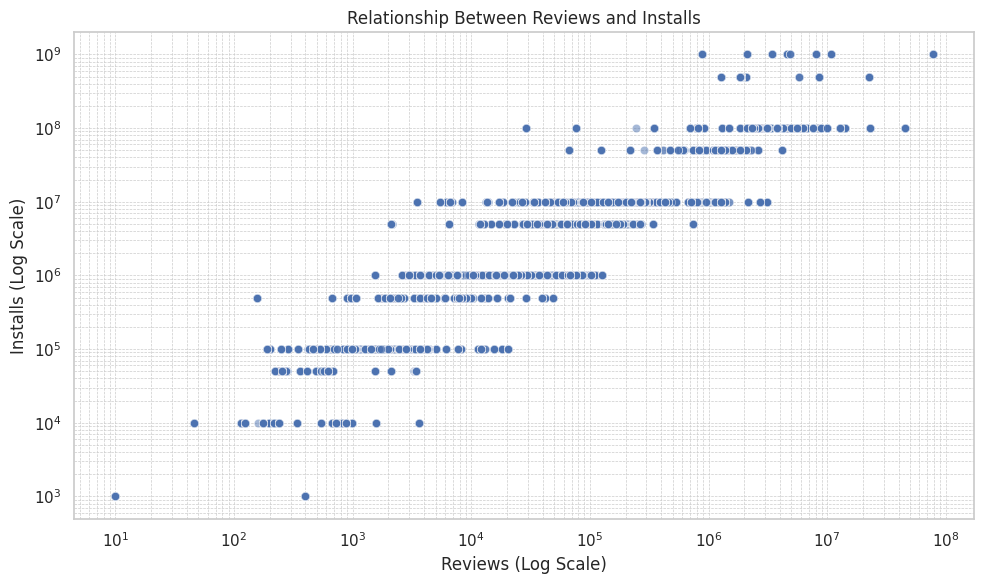

In [508]:
# Filter out rows where 'Reviews' or 'Installs' are zero or negative
# This avoids errors and distortions when applying the logarithmic scale
df_filtered = df_merged[(df_merged['Reviews'] > 0) & (df_merged['Installs'] > 0)]

# Set up the figure size for the scatter plot
plt.figure(figsize=(10, 6))

# Create a scatter plot of Reviews vs Installs with some transparency for better visibility
sns.scatterplot(
    data=df_filtered,
    x='Reviews',
    y='Installs',
    alpha=0.5  # Make points semi-transparent
)

# Set both axes to logarithmic scale to handle wide data ranges and improve visualization
plt.xscale('log')
plt.yscale('log')

# Label the x-axis and y-axis with indication of log scale
plt.xlabel('Reviews (Log Scale)')
plt.ylabel('Installs (Log Scale)')

# Set the plot title
plt.title('Relationship Between Reviews and Installs')

# Add a grid with dashed lines for better readability on both major and minor ticks
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()


1. Why did you pick the specific chart?
- This scatter plot on log-log scale was chosen because:

- Both Reviews and Installs have extremely wide numeric ranges (from hundreds to hundreds of millions), so log scaling helps visualize all data points clearly without compressing smaller values.

- The scatter plot format shows the individual relationship between each app’s installs and reviews, highlighting any clusters, patterns, or outliers.

- It allows us to detect whether there is a positive correlation trend between installs and reviews.

 2. What is/are the insight(s) found from the chart?

- There is a strong positive correlation between the number of installs and the number of reviews: as installs increase, reviews also increase.

- The data points generally form a clear upward trend, indicating that apps with higher install counts tend to generate proportionally more reviews.

- The points appear to be roughly aligned along a diagonal trajectory, confirming that user engagement (reviews) scales with user acquisition (installs).

- However, there is noticeable variance—some apps with similar installs have widely different numbers of reviews, which may reflect differences in user engagement, review prompts, or app types.

3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
- Understanding this correlation helps set realistic benchmarks for expected review volumes at different install levels, enabling better planning for:

  - Customer support resource allocation

  - Review response strategies

  - Reputation management

- Apps falling below the trend line (i.e., fewer reviews than expected given their installs) can be targeted for improvement in:

  - In-app review prompts

  - User engagement initiatives

  - Post-install communication

- Apps above the trend line may offer insights about effective strategies to encourage user feedback.

Potential Negative Growth:
- If an app gains installs quickly but fails to generate sufficient reviews, it may struggle with:

  - Lower social proof in app stores

  - Less visibility in algorithmic recommendations

  - Reduced user trust

##Analyzing Sentiment Trends Over Time in User Reviews

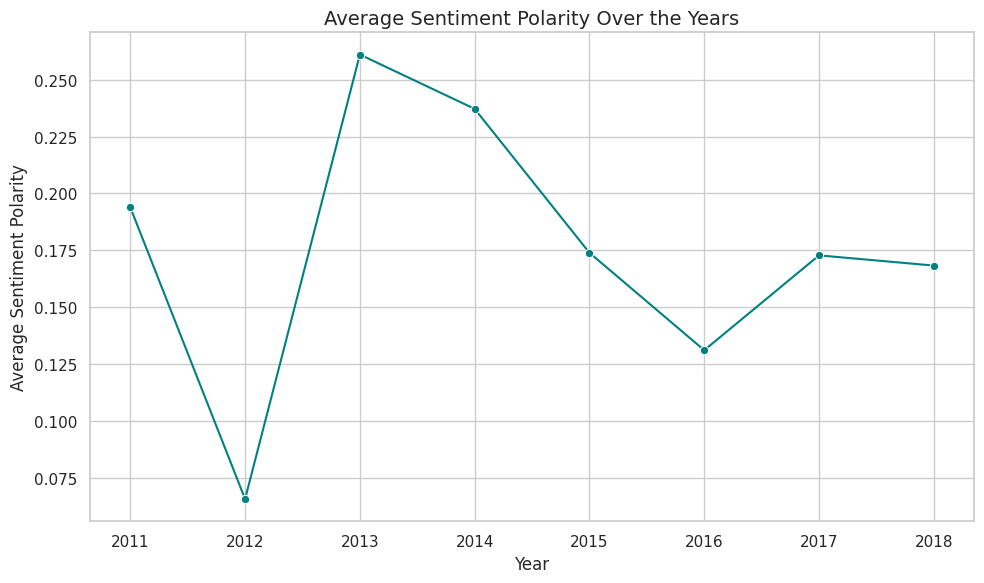

In [509]:
# Step 1: Group by year and calculate average sentiment polarity
yearly_sentiment = df_merged.groupby('Last Updated Year')['Sentiment_Polarity'].mean().reset_index()

# Step 2: Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sentiment, x='Last Updated Year', y='Sentiment_Polarity', marker='o', color='teal')

# Step 3: Add labels and title
plt.title('Average Sentiment Polarity Over the Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Sentiment Polarity')
plt.grid(True)
plt.tight_layout()

# Step 4: Show plot
plt.show()


1. Why did you pick the specific chart?
- A line chart was chosen because it clearly shows how the average sentiment polarity (a measure of review positivity) changes over time in a continuous, year-by-year format.

- This type of chart helps to visualize trends, spikes, and drops over the years, making it easy to detect patterns or shifts in user attitudes.

- The use of markers on the line improves readability, especially when data points are limited to annual intervals.

 2. What is/are the insight(s) found from the chart?
 - Significant drop in sentiment polarity in 2012 indicates a notable decline in user satisfaction or an increase in negative/neutral feedback during that year.

- The peak in 2013 and 2014 suggests that user sentiment became more positive, possibly due to improved app quality, better user experience, or successful updates.

- From 2015 to 2018, there's a gradual decline and stabilization in sentiment polarity, indicating a possible plateau in innovation or rising user expectations not fully met.

- Overall, user sentiment appears to fluctuate rather than follow a steady upward or downward trend—implying that app updates, external events, or platform-wide changes may influence public sentiment year to year.



3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
-Tracking sentiment over time helps businesses evaluate the effectiveness of updates or marketing strategies—especially if certain years show sharp sentiment changes.

- Insights from peak years (like 2013–2014) can help identify what worked well, offering best practices to replicate.

- Detecting drops (e.g. 2012, 2016) allows product teams to investigate user complaints, learn from them, and proactively prevent negative user experiences in future releases.

Potential Risks / Negative Growth:
- The decline after 2014 suggests that user satisfaction may be harder to sustain over time—possibly due to growing competition, feature fatigue, or lack of innovation.

- If businesses ignore these trends, they risk falling behind on user expectations, leading to lower retention, poorer reviews, and negative word of mouth.

##Analyzing the Impact of App Size on User Ratings

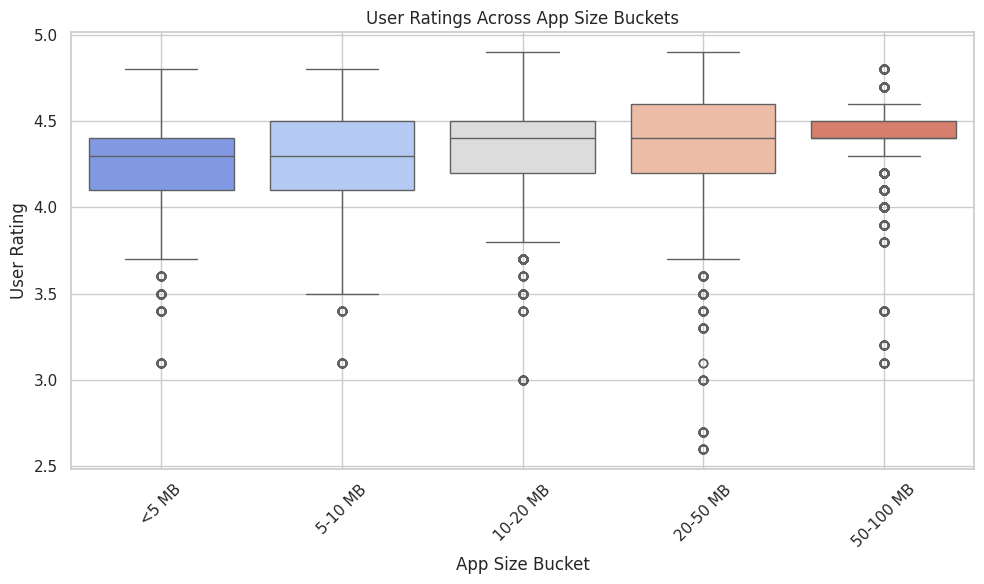

In [510]:
# Plot boxplot of User Ratings across different App Size Buckets

plt.figure(figsize=(10,6))  # Set figure size

# Create a boxplot with 'Size_Bucket' on x-axis and 'Rating' on y-axis
# Use the 'coolwarm' color palette for visual appeal
sns.boxplot(data=df_merged, x='Size_Bucket', y='Rating', palette='coolwarm')

# Add plot title
plt.title('User Ratings Across App Size Buckets')

# Label x-axis and y-axis
plt.xlabel('App Size Bucket')
plt.ylabel('User Rating')

# Rotate x-axis tick labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Add grid lines to the plot for easier comparison of values
plt.grid(True)

# Adjust layout to prevent clipping of labels and titles
plt.tight_layout()

# Show the plot
plt.show()


1. Why did you pick the specific chart?
- A box plot was chosen because it effectively shows the distribution of user ratings across different app size ranges (buckets).

- It highlights:

  - Median ratings (central tendency)

  - Variability in ratings within each size group (interquartile range)

  - Outliers (extremely high or low-rated apps)

- It’s useful when comparing multiple categories side by side, especially when you want to see if size consistently affects user perception.



2. What is/are the insight(s) found from the chart?

- Apps in the larger size buckets (20–100 MB) tend to have slightly higher median ratings than smaller apps.

- There is a noticeable increase in median rating as we move from apps under 10 MB to those over 20 MB.

- Smaller apps (<10 MB) show more variability in ratings and a wider spread of lower ratings, possibly due to basic features or performance limitations.

- Larger apps (50–100 MB) not only have higher medians but also fewer extreme outliers, suggesting more consistent user satisfaction.

 3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
- Developers can be encouraged to invest in richer app experiences, even if it increases size slightly, since users seem to reward feature-rich and well-designed apps with higher ratings.

- The trend supports not overly optimizing for minimal file size at the cost of usability, visuals, or functionality.

- Size buckets could be used to benchmark app performance during QA/testing or competitor analysis.

Potential Negative Growth:
- Focusing purely on making small-sized apps might hurt perceived value or lead to lower ratings if functionality is limited.

- Larger apps require more storage, which may discourage users on low-end devices or limited data plans, especially in emerging markets.

##Which app categories attract the highest number of downloads, and how do these categories correlate with user satisfaction as measured by average ratings?

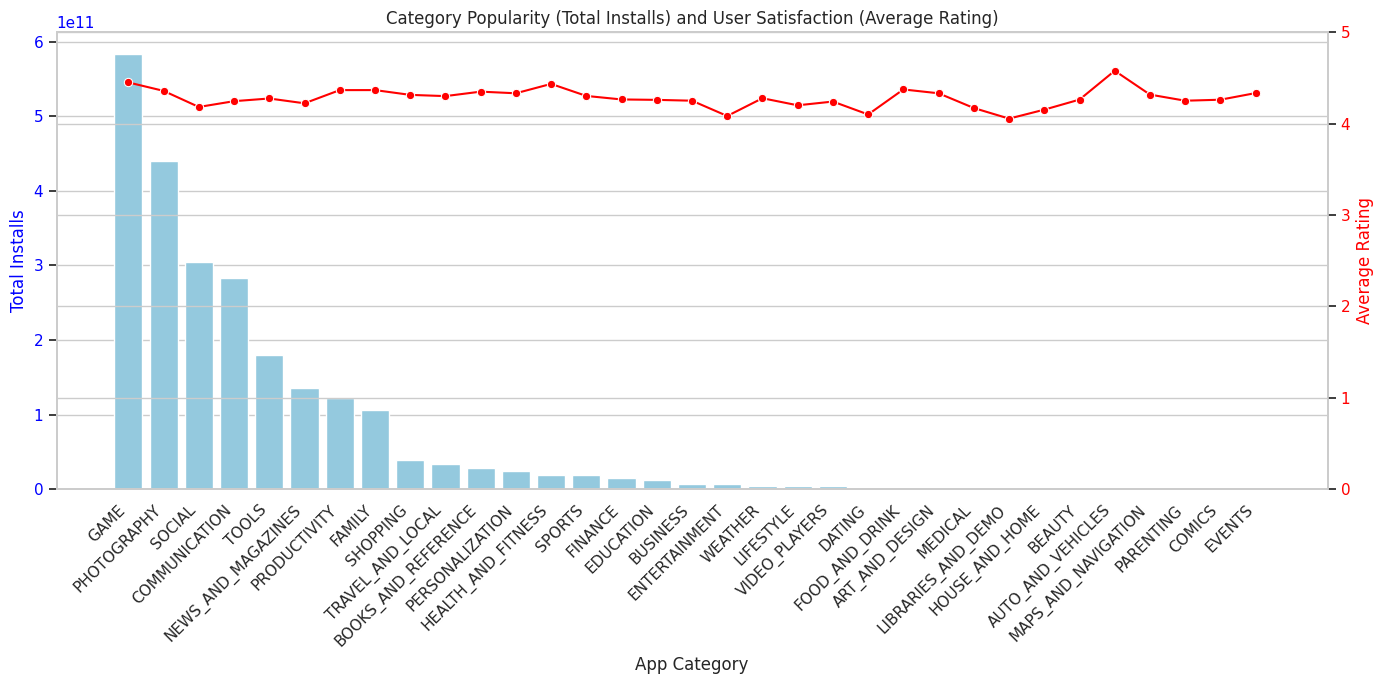

In [511]:
# Step 1: Aggregate installs and average rating by Category
category_stats = df_merged.groupby('Category').agg({
    'Installs': 'sum',
    'Rating': 'mean'
}).sort_values(by='Installs', ascending=False)

# Step 2: Create figure and twin axis
fig, ax1 = plt.subplots(figsize=(14,7))

# Bar plot for total installs
sns.barplot(x=category_stats.index, y='Installs', data=category_stats, ax=ax1, color='skyblue')
ax1.set_ylabel('Total Installs', color='blue')
ax1.set_xlabel('App Category')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Step 3: Create secondary y-axis for average ratings
ax2 = ax1.twinx()
sns.lineplot(x=category_stats.index, y='Rating', data=category_stats, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Average Rating', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 5)  # Rating scale from 0 to 5

# Step 4: Title and layout
plt.title('Category Popularity (Total Installs) and User Satisfaction (Average Rating)')
plt.tight_layout()
plt.show()


 1. Why did you pick the specific chart?

- The combination of a bar chart and line plot with dual y-axes effectively shows two different metrics (total installs and average rating) for the same categories in a single view.

- Bar charts visualize the magnitude of downloads clearly, while the line plot highlights trends in user ratings.

- Using dual axes enables easy comparison of popularity and satisfaction without cluttering the chart.


 2. What is/are the insight(s) found from the chart?

- Categories like GAME, PHOTOGRAPHY, SOCIAL, COMMUNICATION, and TOOLS dominate in total installs, showing they attract the most users.

- Despite large install volumes, the average user ratings are fairly stable across categories, mostly between about 4.1 and 4.6.

- There is no strong correlation between popularity and user rating—high download categories do not always have the highest ratings (and vice versa).

- Some smaller categories might have slightly better ratings but far fewer installs, indicating niche satisfaction but limited reach.



3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

- Developers and marketers can focus on popular categories with strong installs to maximize user reach.

- The stable rating trend across categories suggests consistent user satisfaction, implying a healthy app ecosystem.

- For new entrants, targeting less crowded but well-rated categories might offer better chances to stand out.

Potential Negative Growth:

- High install volumes don’t guarantee superior user experience—mass-market categories might face high competition and user churn if quality doesn’t keep up.

- Overemphasis on popularity could lead to neglecting niche but loyal user bases in smaller categories with high satisfaction.

- Saturation risk in popular categories may discourage innovation or lead to diminishing returns.



##How does the growth rate of installs differ between free vs paid apps over time?

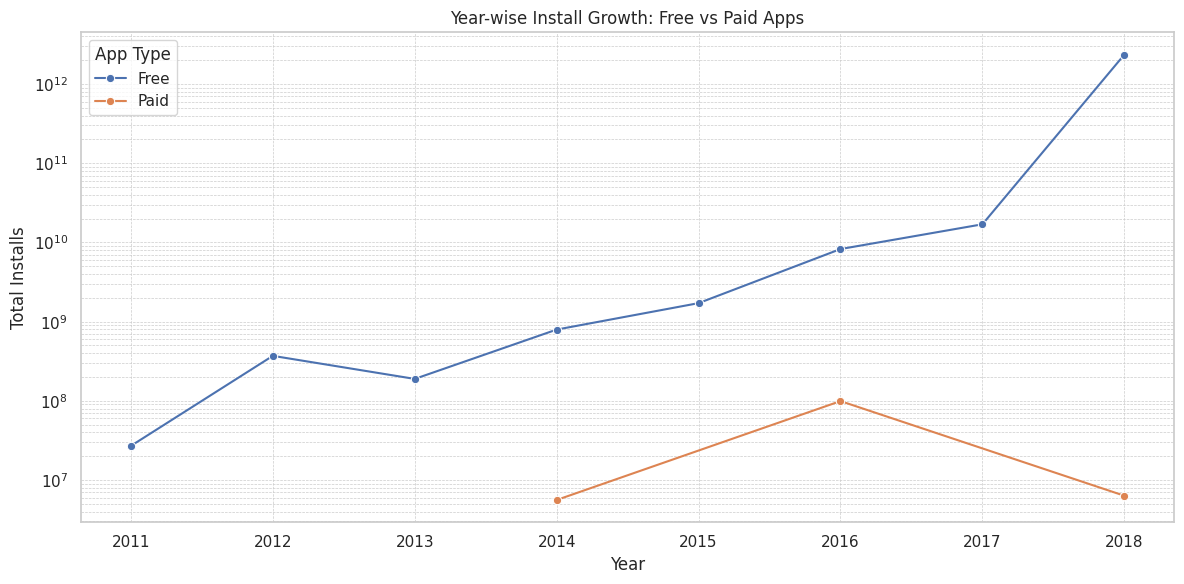

In [512]:
# Step 1: Aggregate total installs by year and type (Free vs Paid)
yearly_installs_type = df_merged.groupby(['Last Updated Year', 'Type'])['Installs'].sum().reset_index()

# Step 2: Plot lineplot showing installs trend over years by app type
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_installs_type, x='Last Updated Year', y='Installs', hue='Type', marker='o')

# Step 3: Format plot
plt.title('Year-wise Install Growth: Free vs Paid Apps')
plt.xlabel('Year')
plt.ylabel('Total Installs')
plt.yscale('log')  # Log scale for better visualization of install differences
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend(title='App Type')
plt.tight_layout()
plt.show()


1. Why did you pick this specific chart?
- A line plot effectively shows trends over time, making it easy to compare the growth trajectories of free vs paid apps.

- Using a logarithmic scale on the y-axis accommodates the large differences in install numbers between free and paid apps, making both trends visible.

- Markers help identify exact data points for each year, enhancing clarity.

- The legend clearly differentiates between the two app types.

2. What is/are the insight(s) found from the chart?
- Free apps show exponentially higher installs compared to paid apps every year, indicating a much larger user base.

- Free app installs grow consistently and sharply over the years, especially after 2016.

- Paid app installs show some growth until 2016 but then decline sharply afterward.

- The gap between free and paid app installs widens dramatically over time.

3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

- Developers and marketers might prioritize free apps due to their significantly higher install numbers and growing user base.

- Monetization strategies like in-app purchases or ads in free apps may be more effective given the scale of installs.

- Understanding the decline in paid app installs can help developers rethink pricing or value propositions.

Negative Growth Insight:

- Paid apps are losing traction, which might be due to user preference shifting towards free apps or alternative monetization models.

- The decline in paid installs suggests risk if solely relying on paid app revenue, indicating a need for innovation or diversification.

##How have app installs changed annually across different app categories?

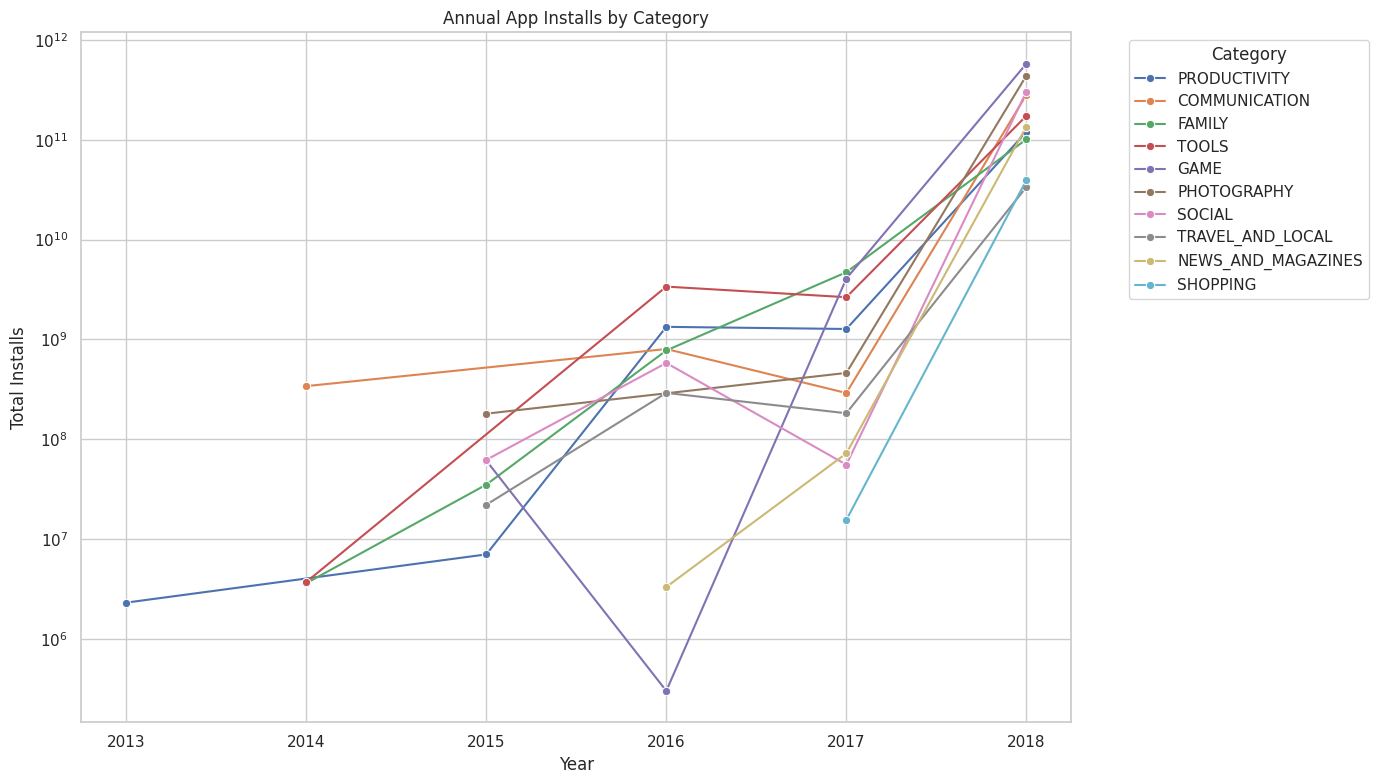

In [513]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Extract the year from 'Last Updated'
df_merged['Year'] = df_merged['Last Updated'].dt.year

# Step 2: Aggregate installs by Year and Category
annual_installs = df_merged.groupby(['Year', 'Category'])['Installs'].sum().reset_index()

# Step 3: Filter categories with significant installs to reduce clutter (optional)
top_categories = annual_installs.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10).index
annual_installs_top = annual_installs[annual_installs['Category'].isin(top_categories)]

# Step 4: Plot line chart showing installs trend per category over years
plt.figure(figsize=(14, 8))
sns.lineplot(data=annual_installs_top, x='Year', y='Installs', hue='Category', marker='o')

plt.title('Annual App Installs by Category')
plt.ylabel('Total Installs')
plt.xlabel('Year')
plt.yscale('log')  # Log scale if installs vary widely
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


1. Why did you pick the specific chart?
- Line chart is ideal for showing trends over time.

- Plotting annual installs by category reveals growth patterns and comparisons between categories clearly.

- The logarithmic scale on the y-axis helps display large differences in installs spanning multiple orders of magnitude.

- Multiple lines in a single plot allow easy comparison of install growth across categories over the years.



2. What is/are the insight(s) found from the chart?
- Categories like GAME, SOCIAL, and PHOTOGRAPHY show very high install counts, especially in later years.

- Some categories such as NEWS_AND_MAGAZINES and SHOPPING have lower installs comparatively.

- Most categories show steady growth in installs over the years, indicating increasing user engagement.

- Sharp install increases for some categories around specific years might suggest launches of popular apps or feature updates driving downloads.

- Variability between categories suggests different popularity and adoption rates depending on app category.



3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

- Identifying fast-growing categories can help businesses prioritize investments, marketing, and development in those areas.

- Recognizing slower growth categories may prompt innovation or focus shifts to improve engagement.

- The overall growth trend indicates a healthy app market, motivating new entrants and sustained development.

Negative Growth:

- If any category showed declining installs over the years (not very visible here), it would signal potential saturation or reduced user interest.

- This could highlight risks in those markets, prompting caution or strategy change to avoid losses.

- Since all categories show growth, no clear negative trend is evident, which is encouraging for the app ecosystem.



## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

Recommendations for Client to Achieve Business Objectives:
1. Focus on Free Apps with Monetization Strategies

  - Since free apps dominate installs, focus on freemium models, ads, and in-app purchases to maximize reach and revenue.

2. Target High-Growth, High-Rating Categories

  - Invest in genres like Games, Photography, Social, and Communication where demand and user satisfaction are both high.

3. Optimize App Size with Quality Content

  - Larger apps correlate with better ratings, so don’t sacrifice app quality/features to reduce size too much. Optimize for performance but focus on rich user experience.

4. Leverage Positive User Sentiment

  - Encourage reviews and user engagement to boost app visibility and installs. Sentiment analysis shows that positive reviews drive installs and revenue.

5. Expand in Personalization Niche

 - The highest revenue with positive sentiment in personalization apps indicates a promising revenue model—consider developing or acquiring apps in this space.

6. Yearly Trend Monitoring

  - Keep tracking installs, ratings, and sentiments yearly to quickly pivot strategies based on user feedback and market trends.

In Brief:

To achieve business objectives, focus on free, high-quality apps in top-performing categories, leverage user engagement and sentiment, and explore monetization through personalization features. Prioritize user satisfaction with feature-rich apps and continuously monitor trends for agile decision-making.

 # **Conclusion**

 Final Conclusion :

1. Data and visualizations reveal a mature and rapidly growing app ecosystem, where:

2. Free apps dominate the market in both volume and installs. Monetization should focus on freemium models, ads, or in-app purchases.

3. Categories like Games, Social, Communication, and Photography are the most popular and offer high user engagement and install volumes.

4. User sentiment is largely positive, and apps with higher ratings tend to get more installs — confirming the importance of quality, performance, and user experience.

5. App size matters — larger apps tend to be better rated, likely due to richer features. Optimize size without compromising quality.

6. Sentiment trends and reviews correlate strongly with ratings and installs, making review management and feedback loops essential for growth.

7. Revenue insights highlight niches like Personalization as high-potential despite being less crowded — a strategic opportunity.

8. Year-wise trends show exponential growth in installs, suggesting that regular updates, feature improvements, and performance tuning over time contribute to success.

9. Category-wise analysis across years confirms that some categories grow faster than others — guiding where to invest resources.



### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***